---  
pagetitle: "DA-4-proj | VG"
title: The Insights on European Football 
subtitle: Data Analysis Project  
author: Vilmantas Gėgžna  
date: 2023-03-23
date-modified: today
date-format: iso
language:
  title-block-modified: "Updated"
format:
  html:
    toc: true
    toc_float: true
    toc-location: left
    toc-depth: 4
    fig-align: center
    code-tools: true
    code-fold: show # possible options: false, true, show
    number-sections: true
    code-line-numbers: true
    embed-resources: true
    html-math-method: mathjax
    link-external-icon: true
    link-external-newwindow: true
    link-external-filter: ".*ds-project.*"
    page-layout: full
    include-after-body: # To bold "Fig" and "Table" in captions.
      text: |
        <script>
        document.addEventListener("DOMContentLoaded", () => {
          document.querySelectorAll("figcaption").forEach(e => {
          e.innerHTML = e.innerHTML.replace(/^((Fig.*?)&nbsp;\d+([.]\d+[.]))/, "<strong>$1</strong>")})
        });
        document.addEventListener("DOMContentLoaded", () => {
          document.querySelectorAll("caption").forEach(e => {
          e.innerHTML = e.innerHTML.replace(/^(Table.*?&nbsp;\d+([.]\d+[.]))/, "<strong>$1</strong>")})
        });
        </script>
jupyter: python3
filters:
   - add-code-files
crossref:
  chapters: true
  fig-title: 'Fig.'    # (default is "Figure")
  tbl-title: Table     # (default is "Table")
  title-delim: .       # (default is ":")
editor:
  render-on-save: false
---

::: {.content-hidden when-format="html"}

<br><br><br><br><br>

<center>

> **IMPORTANT**
>   
> This Jupyter notebook contains the `source code` of the analysis.  
> The analysis is intended to be studied from its rendered HTML document.   
> Please, **open the HTML** file, which is available at:  
>  
> ►►► <https://gegznav.github.io/ds-projects/european-football> ◄◄◄
> &nbsp;  &nbsp;   
>
> ```
> •▲•  
> ```

</center>
<br><br><br><br><br><br><br>
:::


<style>
#title-block-header.quarto-title-block.default .quarto-title-meta {
  display: grid;
  grid-template-columns: repeat(3, 1fr);
}

div.sourceCode {
  margin: 0;
}

/* R code indicator */
pre.sourceCode .r {
  border-left: 5px solid #7b97ea;
  border-radius: 0
}
.r .fu {font-weight: bold;}

/* Python code indicator */
pre.sourceCode .python {
  border-left: 5px solid #CFB53B;
  border-radius: 0
}
.python .kw {font-style: italic;}

/* Details sections */

details[open].with-border {
  padding: 1px 5px 1px 5px;
  border-style: solid;
  border-color: grey;
  border-width: 3px;
  border-radius: 5px;
}

/* Tables */
caption, .table-caption {
  text-align: left;
  color: #5a6570;
};

table .dataframe .table-striped thead th {
  text-align: left !important;
}


</style>

::: {.content-hidden when-format="html"}

This cell contains `CSS` code.   

:::

<center>

![The Insights on European Football project logo. Generated with [Leonardo.Ai](https://leonardo.ai/).](./img/logo-football-proj--LeonardoAi.jpg){max-width=100%, width=400px}

</center>

***Data analysis tools:*** Python, SQL, Looker Studio     
***Helper tools:*** VS Code, Quarto, Git  
***Skills:***

- data pre-processing
- **exploratory data analysis** (**EDA**):
    - descriptive statistics 
    - data visualization
- **inferential statistics**: 
    - hypothesis testing
    - confidence intervals
- **predictive modeling**:
    - classification task
    - regression task
- object-oriented programming (**OOP**)
- statistical programming
- literate programming
- dashboarding


# Abbreviations {.unnumbered}


- Acc – accuracy.
- BAcc – balanced accuracy.
- BAcc_01 – balanced accuracy where 0 is the worst and 1 is the best result.
- CI – 95% confidence interval.
- CLD – compact letter display.
- CV – cross-validation.
- EDA – exploratory data analysis.
- FIFA – International Federation of Association Football.
- k – number of variables/features.
- ML – machine learning.
- n – either sample or group size.
- NA, NAs – missing value(s).
- p – p-value.
- p_adj – p-value (adjusted).
- PC, PCs – principal component(s).
- PCA – principal component analysis.
- r – Pearson's correlation coefficient.
- R² – coefficient of determination, r squared.
- RMSE – root mean squared error.
- RNG – (pseudo)random number generator.
- SD – standard deviation.
- SE – standard error.
- SFS – sequential feature selection.
- UK – United Kingdom.


# Introduction

**European Football** (also known as **Soccer**) is one of the most popular games in Europe.
Football is a big market with revenues of **€27.6 billion** in 2020/21 ([source](https://www2.deloitte.com/hr/en/pages/press/articles/annual-review-football-finance-2022.html)).
The money is earned by, e.g., selling tickets to matches and rights to broadcast games,  participating in betting, and advertising.

In this project, **European Football data** from seasons 2008/2009 to 2015/2016 was analyzed to **get a better data-based understanding of this game**.
In each subsection of the "[Analysis]" section of this project, nine main questions are analyzed and insights are provided. At the beginning of each main subsection, the most important findings are presented and further parts of that subsection provide the details (plots, tables, etc.) on those findings.

::: {.callout-tip}
Pay attention that some codes, analyses, results, or other details are hidden in **collapsible sections** (that are collapsed by default).
These are:

- either parts that have a lot of results that can clutter the report,
- or less important or supplementary parts, e.g., to prove some claims in the text.

:::

## Setup

In [2]:
# | code-summary: "Code: **The main Python setup**"
# | code-fold: true

# Automatically reload certain modules
%reload_ext autoreload
%autoreload 1

# Plotting
%matplotlib inline

# Packages and modules -------------------------------
import os
import re
import warnings

# Working with SQL database
import sqlite3

# EDA
import ydata_profiling as eda
from skimpy import skim
import missingno as msno

# Data wrangling, maths
import numpy as np
import pandas as pd
import janitor  # imports additional Pandas methods

# Statistical analysis
import scipy.stats as sps

# Machine learning
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Maps
import geopandas as gpd
from shapely.geometry import Polygon

# Enable ability to run R in Python
os.environ["R_HOME"] = "C:/PROGRA~1/R/R-4.2.3"

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    import rpy2

    %load_ext rpy2.ipython

# Custom functions
import functions.fun_utils as my
import functions.pandas_methods
import functions.fun_analysis as an
import functions.fun_ml as ml

%aimport functions.fun_utils
%aimport functions.pandas_methods
%aimport functions.fun_analysis
%aimport functions.fun_ml

# Settings --------------------------------------------
# Default plot options
plt.rc("figure", titleweight="bold")
plt.rc("axes", labelweight="bold", titleweight="bold")
plt.rc("font", weight="normal", size=10)
plt.rc("figure", figsize=(7, 3))

# Pandas options
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_colwidth", 50)  # Possible option: None
pd.set_option("display.float_format", lambda x: f"{x:.2f}")
pd.set_option("styler.format.thousands", ",")

# colors
green, blue, orange, red = "tab:green", "tab:blue", "tab:orange", "tab:red"

# Analysis parameters
do_eda = True

::: {.content-hidden when-format="html"}

Several cells **below** show the contents of indicated files only **in the rendered HTML** report.

:::

In [2]:
# | add-from: functions/fun_utils.py
# | source-lang: python
# | code-filename: 'Contents of file "functions/fun_utils.py"
# |                (various functions imported via the main setup as `my`)'
# | code-fold: true

# comment

In [3]:
# | add-from: functions/fun_analysis.py
# | source-lang: python
# | code-filename: 'Contents of file "fun_analysis.py"
# |                (classes imported via the main setup as `an`)'
# | code-fold: true

# comment

In [4]:
# | add-from: functions/fun_ml.py
# | source-lang: python
# | code-filename: 'Contents of file "fun_ml.py"
# |                (functions for machine  learning imported via the
# |                main setup as `ml`)'
# | code-fold: true

# comment

In [5]:
# | add-from: functions/pandas_methods.py
# | source-lang: python
# | code-filename: 'Contents of file "pandas_methods.py"
# |                (methods for Pandas objects imported via the main setup)'
# | code-fold: true

# comment

In [6]:
# | add-from: functions/functions.R
# | source-lang: r
# | code-filename: 'Contents of file "functions.R"
# |                 (R functions used via "functions.py")'
# | code-fold: true

# comment

# Methods

This section shortly introduces the main aspects of **inferential statistics** and **predictive modeling** used in this project.

## Statistical Inference


For difference in proportions, **χ² (chi-squared) test** was performed with **pair-wise χ²** as *post-hoc*. **Goodman's** method was used to calculate confidence intervals of multinomial proportions. 

For differences between groups of numeric variables, **Kruskal-Wallis test** was performed followed by **Conover-Iman test** as *post-hoc*. Confidence intervals of means were calculating using ***t*-distribution based method**.

In this project, confidence level is **95%**, significance level is **0.05**.


## Predictive Modelling

For predictive modeling, **training** (data from all seasons except the last one) and **test** (data from the last season only) **sets** were used. The training set was used for model selection and the test set for performance evaluation of the selected models.

For the regression task, **linear regression** and **random forests** (RF) were used.
For the classification task, **logistic regression** and **RF** were used. 
Forward **sequential feature selection** (SFS) with **5-fold cross-validation** (CV) was used to find an optimal combination of variables. The optimized metric in the regression was **RMSE**** (root mean squared error), in classification **BAcc** (balanced accuracy), which takes into account class imbalance.

As some calculations take a lot of time, in some analyses either the total available number of features or the number of features allowed to be included in the analysis, or both were limited to fit into a reasonable amount of available time: the decision was made either based on the RF feature importance analysis or the results of previous calculations (number of possibly valuable features and time that was needed to perform a certain amount of calculations).

Models with greater performance were desirable but less complex models with almost the same level of performance as the best one were preferred.

# Initial Exploration

In this section, the database is presented.
Data summaries as well as database tables are explored to better understand the data itself and what steps of pre-precessing are needed.

## Database

The "[Ultimate 25k+ Matches Football Database – European](https://www.kaggle.com/datasets/prajitdatta/ultimate-25k-matches-football-database-european)" (v2) was downloaded from Kaggle.
The database consists of 7 tables. 
The entity relationship diagram (ERD) is shown below ([Fig. @fig-erd]):
pay attention that some columns from table `Match` are not shown in the ERD.

In [7]:
# | code-summary: "Code: Create connection to SQL database"
db = sqlite3.connect("data/database.sqlite")

In [8]:
query = """--sql
SELECT name 
FROM sqlite_master 
WHERE type = 'table' AND name != 'sqlite_sequence';
"""
cursor = db.cursor()
cursor.execute(query)

print("Data tables in the database: ")
for i, tbl in enumerate(cursor.fetchall(), start=1):
    print("  ", i, ". ", *tbl, sep="")

Data tables in the database: 
  1. Player_Attributes
  2. Player
  3. Match
  4. League
  5. Country
  6. Team
  7. Team_Attributes


![ERD of European Football Matches Database created with [dbSchema](https://dbschema.com/). Some columns in `Match` table are hidden. Notation: `#` – numeric variable, `t` – text variable, `↗` – reference to other table, foreign key, `↙` – reference from other table.](./img/ERD-football-db.png){#fig-erd}


## Tables `Country` and `League` {#sec-country-and-league}

In tables `country` and `league` has 11 distinct records each. As Scotland and England are regions of the United Kingdom, UK, there are 10 countries only.

In [9]:
# | label: tbl-country-sql-inspect
# | tbl-cap: "Inspection: number of unique items in `country` and
# |          `league` tables."

# Working with SQL database
import sqlite3

query = """--sql
SELECT
    (SELECT COUNT(DISTINCT name) FROM Country) n_regions,
    (SELECT COUNT(DISTINCT name) FROM League) n_leagues;
"""
pd.read_sql_query(query, db).style.hide(axis="index")

In [10]:
# | label: tbl-country-inspect
# | tbl-cap: "Inspection: table `country`."

pd.read_sql_query("SELECT * FROM Country", db).index_start_at(1).style

In [11]:
# | label: tbl-league-inspect
# | tbl-cap: "Inspection: table `league`."

pd.read_sql_query("SELECT * FROM League", db).index_start_at(1).style

League and county/region id codes coincide so these variables contain redundant information.

<details class="with-border">
<summary>Details: Country/Region and league IDs are the same.</summary>

In [12]:
query = """--sql
SELECT 
    id league_id, 
    country_id region_id, 
    IIF(id==country_id, 'yes', 'no') id_are_equal
FROM League;
"""
pd.read_sql_query(query, db).index_start_at(1).style

</details>

## Table `Match`

Table `match` includes information on 25,979 matches from 2008-07-18 to 2016-05-25 (seasons from 2008/2009 to 2015/2016), approximately 3,200-3,400 matches per season (except the season 2013/2014, where some data is likely to be missing). More details on `match` dataset in Tables [-@tbl-match-sql-inspect-1]--[-@tbl-match-sql-inspect-seasons].

In [13]:
# | label: tbl-match-sql-inspect-1
# | tbl-cap: "Inspection: number of unique items in `match` table."

query = """--sql
SELECT 
    (SELECT COUNT(1) FROM Match) n_records,
    (SELECT COUNT(DISTINCT country_id) FROM Match) n_regions,
    (SELECT COUNT(DISTINCT league_id)  FROM Match) n_leagues,
    (SELECT COUNT(DISTINCT season)     FROM Match) n_seasons,
    (SELECT COUNT(DISTINCT team) FROM (
        SELECT home_team_api_id team FROM Match UNION
        SELECT away_team_api_id team FROM Match
    )) n_teams,
    (SELECT COUNT(DISTINCT player) FROM (
        SELECT home_player_1  player FROM Match UNION
        SELECT home_player_2  player FROM Match UNION
        SELECT home_player_3  player FROM Match UNION
        SELECT home_player_4  player FROM Match UNION
        SELECT home_player_5  player FROM Match UNION
        SELECT home_player_6  player FROM Match UNION
        SELECT home_player_7  player FROM Match UNION
        SELECT home_player_8  player FROM Match UNION
        SELECT home_player_9  player FROM Match UNION
        SELECT home_player_10 player FROM Match UNION
        SELECT home_player_11 player FROM Match UNION
        SELECT away_player_1  player FROM Match UNION
        SELECT away_player_2  player FROM Match UNION
        SELECT away_player_3  player FROM Match UNION
        SELECT away_player_4  player FROM Match UNION
        SELECT away_player_5  player FROM Match UNION
        SELECT away_player_6  player FROM Match UNION
        SELECT away_player_7  player FROM Match UNION
        SELECT away_player_8  player FROM Match UNION
        SELECT away_player_9  player FROM Match UNION
        SELECT away_player_10 player FROM Match UNION
        SELECT away_player_11 player FROM Match
    )) n_players,
    (SELECT COUNT(DISTINCT match_api_id) FROM Match) n_matches;
"""
n_matches = pd.read_sql_query(query, db)
n_matches.style.hide(axis="index")

In [14]:
# | label: tbl-match-sql-inspect-seasons
# | tbl-cap: "Number of matches per season in `match` table."

query = """--sql
SELECT season, COUNT(season) n_matches FROM Match GROUP BY season;
"""
pd.read_sql_query(query, db).index_start_at(1).style

In [15]:
# | code-summary: "Code: Import `match`"
# | label: tbl-table-match
# | tbl-cap: "Inspection: a few rows of table `match`."

match = pd.read_sql_query("SELECT * FROM Match", db)
# Fix datetime data type
match = match.to_datetime("date")
# Print
match.head(2)

id  country_id  league_id     season  stage       date  match_api_id  \
0   1           1          1  2008/2009      1 2008-08-17        492473   
1   2           1          1  2008/2009      1 2008-08-16        492474   

   home_team_api_id  away_team_api_id  home_team_goal  away_team_goal  \
0              9987              9993               1               1   
1             10000              9994               0               0   

   home_player_X1  home_player_X2  home_player_X3  home_player_X4  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   home_player_X5  home_player_X6  home_player_X7  home_player_X8  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   home_player_X9  home_player_X10  home_player_X11  away_player_X1  \
0             NaN              NaN              NaN             NaN   
1             NaN              NaN              NaN             NaN   

   away_player_X2  away_player_X3  away_player_X4  away_player_X5  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   away_player_X6  away_player_X7  away_player_X8  away_player_X9  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   away_player_X10  away_player_X11  home_player_Y1  home_player_Y2  \
0              NaN              NaN             NaN             NaN   
1              NaN              NaN             NaN             NaN   

   home_player_Y3  home_player_Y4  home_player_Y5  home_player_Y6  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   home_player_Y7  home_player_Y8  home_player_Y9  home_player_Y10  \
0             NaN             NaN             NaN              NaN   
1             NaN             NaN             NaN              NaN   

   home_player_Y11  away_player_Y1  away_player_Y2  away_player_Y3  \
0              NaN             NaN             NaN             NaN   
1              NaN             NaN             NaN             NaN   

   away_player_Y4  away_player_Y5  away_player_Y6  away_player_Y7  \
0             NaN             NaN             NaN             NaN   
1             NaN             NaN             NaN             NaN   

   away_player_Y8  away_player_Y9  away_player_Y10  away_player_Y11  \
0             NaN             NaN              NaN              NaN   
1             NaN             NaN              NaN              NaN   

   home_player_1  home_player_2  home_player_3  home_player_4  home_player_5  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   

   home_player_6  home_player_7  home_player_8  home_player_9  home_player_10  \
0            NaN            NaN            NaN            NaN             NaN   
1            NaN            NaN            NaN            NaN             NaN   

   home_player_11  away_player_1  away_player_2  away_player_3  away_player_4  \
0             NaN            NaN            NaN            NaN            NaN   
1             NaN            NaN            NaN            NaN            NaN   

   away_player_5  away_player_6  away_player_7  away_player_8  away_player_9  \
0            NaN            NaN            NaN            NaN            NaN   
1            NaN            NaN            NaN            NaN            NaN   

   away_player_10  away_player_11  goal shoton shotoff foulcommit  card cross  \
0             NaN             NaN  None   None    None       None  None  None   
1             NaN             NaN  None   None    None       None  None  None   

  corner possession  B365H  B36

<br>

The following variables have non-cleaned HTML/XML-like text values and many missing values (45% cases with NAs), so they will not be included in the further analysis:

- `goal`
- `shoton`
- `shotoff`
- `foulcommit`
- `card`
- `cross`
- `corner`
- `possession`

Variables with player coordinates (such as `home_player_X1` through `away_player_Y11`) will be excluded too.

Dataset contains columns with betting odds information from various betting websites. In betting odds-related variable names (e.g.: `B365H`), the first few symbols indicates betting websites and the meaning of the last letter is following:

- `A` – Away wins,
- `D` – Draw,
- `H` – Home wins.

These variables can renamed to make easier-to-understand variable names. Next, betting odds from some websites abbreviated as PS (57% NAs), SJ (34%), GB (45%), BS (45%) have many missing values.

Other highlights from the profiling report:

- as expected, distribution of matches show yearly patterns (section on variable `date` in data profiling report).
- correlation between various betting odds is high (section on correlation in the report). This could be investigated in more detail.

<details class="with-border">
<summary>Details: Text columns to exclude </summary>

This is just a short illustration of the issue (see column `top` with the most frequent values of lines `goal` and below).
See the column of missing values in the overview of `match` table. 
More details can be explored in the data profiling report for `match` table.

In [16]:
match.describe(include="O").T

count unique             top  freq
season      25979      8       2008/2009  3326
goal        14217  13225        <goal />   993
shoton      14217   8464      <shoton />  5754
shotoff     14217   8464     <shotoff />  5754
foulcommit  14217   8466  <foulcommit />  5752
card        14217  13777        <card />   441
cross       14217   8466       <cross />  5752
corner      14217   8465      <corner />  5753
possession  14217   8420  <possession />  5798

</details>

<details class="with-border">
<summary>EDA: Overview of `match` table </summary>

In [17]:
skim(match)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 25979  │ │ float64     │ 96    │                                                          │
│ │ Number of columns │ 115    │ │ int32       │ 9     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 9     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name        ┃ NA     ┃ NA %  ┃ mean     ┃ sd      ┃ p0      ┃ p25     ┃ p75      ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id                 │      0 │     0 │    13000 │    7500 │       1 │    6500 │    19000 │   26000 │ ██████ │  │
│ │ country_id         │      0 │     0 │    12000 │    7600 │       1 │    4800 │    18000 │   25000 │ ▇█▄▆▆▇ │  │
│ │ league_id          │      0 │     0 │    12000 │    7600 │       1 │    4800 │    18000 │   25000 │ ▇█▄▆▆▇ │  │
│ │ stage              │      0 │     0 │       18 │      10 │       1 │       9 │       27 │      38 │ █▇▇▇▇▅ │  │
│ │ match_api_id       │      0 │     0 │  1200000 │  490000 │  480000 │  770000 │  1700000 │ 2200000 │ █▇▅▄▄▄ │  │
│ │ home_team_api_id   │      0 │     0 │    10000 │   14000 │    1600 │    8500 │     9900 │  270000 │   █    │  │
│ │ away_team_api_id   │      0 │     0 │    10000 │   14000 │    1600 │    8500 │     9900 │  270000 │   █    │  │
│ │ home_team_goal     │      0 │     0 │      1.5 │     1.3 │       0 │       1 │        2 │      10 │  █▅▁   │  │
│ │ away_team_goal     │      0 │     0 │      1.2 │     1.1 │       0 │       0 │        2 │       9 │  █▂▁   │  │
│ │ home_player_X1     │   1800 │     7 │        1 │   0.022 │       0 │       1 │        1 │       2 │     █  │  │
│ │ home_player_X2     │   1800 │     7 │      2.1 │    0.39 │       0 │       2 │        2 │       8 │   █▁   │  │
│ │ home_player_X3     │   1800 │   7.1 │      4.1 │    0.39 │       1 │       4 │        4 │       8 │    █   │  │
│ │ home_player_X4     │   1800 │   7.1 │        6 │    0.45 │       2 │       6 │        6 │       8 │     █▁ │  │
│ │ home_player_X5     │   1800 │   7.1 │      7.5 │     1.6 │       1 │       8 │        8 │       9 │ ▁    █ │  │
│ │ home_player_X6     │   1800 │   7.1 │      3.2 │     1.2 │       1 │       2 │        4 │       9 │  █▆▇▂  │  │
│ │ home_player_X7     │   1800 │   7.1 │      4.8 │     1.1 │       1 │       4 │        6 │       9 │   ▁▅█  │  │
│ │ home_player_X8     │   1800 │   7.1 │      5.3 │     1.7 │       1 │       3 │        7 │       9 │  ▅▁█▅▁ │  │
│ │ home_player_X9     │   1800 │   7.1 │      5.8 │       2 │       1 │       5 │        8 │       9 │  ▄▁█▁█ │  │
│ │ home_player_X10    │   1800 │   7.1 │      5.4 │     1.5 │       1 │       4 │        7 │       9 │   █▅▅▁ │  │
│ │ home_player_X11    │   1800 │   7.1 │      5.8 │    0.76 │       1 │       5 │        6 │       7 │     ▅█ │  │
│ │ away_player_X1     │   1800 │   7.1 │        1 │   0

</details>

<details class="with-border">
<summary>EDA: Data Profiling Report of `match` </summary>

In [18]:
if do_eda:
    eda.ProfileReport(
        match,
        title="Data Profiling Report: match",
        config_file="_config/ydata_profile_config--mini.yaml",
    )

</details>

## Table `Player`

Database includes information on 11,060 European football players. No missing values or other obvious discrepancies in this dataset were found.

In [19]:
# | label: tbl-player-sql-inspect-1
# | tbl-cap: "Inspection: number of unique items in `player` table."
query = """--sql
SELECT COUNT(*) n_records, COUNT(player_api_id) n_players FROM Player;
"""
n_players = pd.read_sql_query(query, db)

# Print
n_players.style.hide(axis="index")

In [20]:
# | code-summary: "Code: Import `player`"
# | label: tbl-table-player
# | tbl-cap: "Inspection: a few rows of table `player`."

player = pd.read_sql_query("SELECT * FROM Player;", db)
# Fix datetime data type
player = player.to_datetime("birthday")
# Print
player.head(2)

id  player_api_id         player_name  player_fifa_api_id   birthday  \
0   1         505942  Aaron Appindangoye              218353 1992-02-29   
1   2         155782     Aaron Cresswell              189615 1989-12-15   

   height  weight  
0  182.88     187  
1  170.18     146

<details class="with-border">
<summary>EDA: Overview of `player` table </summary>

In [21]:
skim(player)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 11060  │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 7      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean     ┃ sd       ┃ p0    ┃ p25     ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                     │   0 │     0 │     5500 │     3200 │     1 │    2800 │    8300 │   11000 │ ██████  │  │
│ │ player_api_id          │   0 │     0 │   160000 │   160000 │  2600 │   36000 │  210000 │  750000 │  █▃▁▁▁  │  │
│ │ player_fifa_api_id     │   0 │     0 │   170000 │    59000 │     2 │  150000 │  200000 │  230000 │ ▂▁▁▂█▇  │  │
│ │ height                 │   0 │     0 │      180 │      6.4 │   160 │     180 │     190 │     210 │   ▂▆█▁  │  │
│ │ weight                 │   0 │     0 │      170 │       15 │   120 │     160 │     180 │     240 │   ▃█▃   │  │
│ └────────────────────────┴─────┴───────┴──────────┴──────────┴───────┴─────────┴─────────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ birthday               │      0 │         0 │     1967-01-23      │     1999-04-24      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ player_name               │       0 │          0 │                            2 │                    22000 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


</details>

<details class="with-border">
<summary> EDA: Data Profiling Report of `player` </summary>


In [22]:
if do_eda:
    eda.ProfileReport(
        player,
        title="Data Profiling Report: player",
        config_file="_config/ydata_profile_config--mini.yaml",
    )

</details>

## Table `Player_Attributes`

Table `Player_Attributes` contains 183,978 records on 11,060 players about various properties of theirs. Variables in this dataset have from 0.45% to 1.46% of missing values.

Some numeric variables are bimodal and they might indicate different importance for different player roles: 

- `ball_control`
- `interceptions`
- `marking`
- `standing_tackle`
- `sliding_tackle`

Goalkeeper-related variables also have distinct distribution: a few players high scores (most probably they are goalkeepers) and many with low scores (most probably the remaining roles):

- `gk_diving`
- `gk_handling`
- `gk_kicking`
- `gk_positioning`
- `gk_reflexes`

There are 3 categorical variables including 2 related to working rates.
FIFA defines working rates categories as either "low", "medium" or "high" [[1]]. 
In the dataset there are more values in these columns, and the additional values can be treated as errors in most cases especially when values make no sense. 
What is more, comparing attacking and defensive work rate columns, some errors in one column indicate what kind of errors will be in the other column. Some of those errors are characteristic only to data dated before 2012, which indicates that this might be data scraping errors or missing information on the scrapped webpages.

[1]: https://fifauteam.com/work-rates-fifa-22/

In [23]:
# | label: tbl-player_attributes-sql-inspect-1
# | tbl-cap: "Inspection: number of unique items in `player_attributes` table."

query = """--sql
SELECT COUNT(1) n_records, COUNT(DISTINCT player_api_id) n_players
FROM Player_Attributes;
"""

n_player_attributes = pd.read_sql_query(query, db)
n_player_attributes.style.hide(axis="index")

In [24]:
# | code-summary: "Code: Import `player_attributes`"
# | label: tbl-table-player-attributes
# | tbl-cap: "Inspection: a few rows of table `player_attributes`."

# Import
player_attributes = pd.read_sql_query("SELECT * FROM Player_Attributes", db)

# Fix datetime data type
player_attributes = player_attributes.to_datetime("date")

# Print
player_attributes.head(2)

id  player_fifa_api_id  player_api_id       date  overall_rating  \
0   1              218353         505942 2016-02-18           67.00   
1   2              218353         505942 2015-11-19           67.00   

   potential preferred_foot attacking_work_rate defensive_work_rate  crossing  \
0      71.00          right              medium              medium     49.00   
1      71.00          right              medium              medium     49.00   

   finishing  heading_accuracy  short_passing  volleys  dribbling  curve  \
0      44.00             71.00          61.00    44.00      51.00  45.00   
1      44.00             71.00          61.00    44.00      51.00  45.00   

   free_kick_accuracy  long_passing  ball_control  acceleration  sprint_speed  \
0               39.00         64.00         49.00         60.00         64.00   
1               39.00         64.00         49.00         60.00         64.00   

   agility  reactions  balance  shot_power  jumping  stamina  strength  \
0    59.00      47.00    65.00       55.00    58.00    54.00     76.00   
1    59.00      47.00    65.00       55.00    58.00    54.00     76.00   

   long_shots  aggression  interceptions  positioning  vision  penalties  \
0       35.00       71.00          70.00        45.00   54.00      48.00   
1       35.00       71.00          70.00        45.00   54.00      48.00   

   marking  standing_tackle  sliding_tackle  gk_diving  gk_handling  \
0    65.00            69.00           69.00       6.00        11.00   
1    65.00            69.00           69.00       6.00        11.00   

   gk_kicking  gk_positioning  gk_reflexes  
0       10.00            8.00         8.00  
1       10.00            8.00         8.00

<br>

<details class="with-border">
<summary>EDA: Overview of `player_attributes` table </summary>


In [25]:
skim(player_attributes)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 183978 │ │ float64     │ 35    │                                                          │
│ │ Number of columns │ 42     │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ string      │ 3     │                                                          │
│                                │ datetime64  │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA    ┃ NA %  ┃ mean     ┃ sd      ┃ p0    ┃ p25     ┃ p75     ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ id                     │     0 │     0 │    92000 │   53000 │     1 │   46000 │  140000 │  180000 │ ██████ │  │
│ │ player_fifa_api_id     │     0 │     0 │   170000 │   54000 │     2 │  160000 │  200000 │  230000 │ ▁▁▁▂█▅ │  │
│ │ player_api_id          │     0 │     0 │   140000 │  140000 │  2600 │   35000 │  190000 │  750000 │  █▃▁▁  │  │
│ │ overall_rating         │   840 │  0.45 │       69 │       7 │    33 │      64 │      73 │      94 │   ▃█▃  │  │
│ │ potential              │   840 │  0.45 │       73 │     6.6 │    39 │      69 │      78 │      97 │   ▃█▄  │  │
│ │ crossing               │   840 │  0.45 │       55 │      17 │     1 │      45 │      68 │      95 │ ▁▂▄██▁ │  │
│ │ finishing              │   840 │  0.45 │       50 │      19 │     1 │      34 │      65 │      97 │ ▁▅▆█▇▁ │  │
│ │ heading_accuracy       │   840 │  0.45 │       57 │      16 │     1 │      49 │      68 │      98 │ ▁▁▃█▆▁ │  │
│ │ short_passing          │   840 │  0.45 │       62 │      14 │     3 │      57 │      72 │      97 │  ▁▁▇█▁ │  │
│ │ volleys                │  2700 │   1.5 │       49 │      18 │     1 │      35 │      64 │      93 │ ▁▄▅█▆▁ │  │
│ │ dribbling              │   840 │  0.45 │       59 │      18 │     1 │      52 │      72 │      97 │ ▁▁▂▆█▁ │  │
│ │ curve                  │  2700 │   1.5 │       53 │      18 │     2 │      41 │      67 │      94 │ ▁▃▅█▇▁ │  │
│ │ free_kick_accuracy     │   840 │  0.45 │       49 │      18 │     1 │      36 │      63 │      97 │ ▁▄▇█▆▁ │  │
│ │ long_passing           │   840 │  0.45 │       57 │      14 │     3 │      49 │      67 │      97 │  ▂▃█▅  │  │
│ │ ball_control           │   840 │  0.45 │       63 │      15 │     5 │      58 │      73 │      97 │  ▁▁▆█▁ │  │
│ │ acceleration           │   840 │  0.45 │       68 │      13 │    10 │      61 │      77 │      97 │  ▁▂▅█▂ │  │
│ │ sprint_speed           │   840 │  0.45 │       68 │      13 │    12 │      62 │      77 │      97 │  ▁▂▆█▂ │  │
│ │ agility                │  2700 │   1.5 │       66 │      13 │    11 │      58 │      75 │      96 │  ▁▂▇█▂ │  │
│ │ reactions              │   840 │  0.45 │       66 │     9.2 │    17 │      61 │      72 │      96 │   ▂█▆  │  │
│ │ balance                │  2700 │   1.5 │       65 │      13 │    12 │      58 │      74 │      96 │  ▁▃▇█▂ │  │
│ │ shot_power             │   840 │  0.45 │       62 │ 


</details>


<details class="with-border">
<summary> EDA for categorical variables in `player_attributes` (1: existing values) </summary>

In [26]:
player_attributes.preferred_foot.value_counts().to_df()

preferred_foot   count
0          right  138409
1           left   44733

In [27]:
player_attributes.attacking_work_rate.value_counts().to_df()

attacking_work_rate   count
0              medium  125070
1                high   42823
2                 low    8569
3                None    3639
4                norm     348
5                   y     106
6                  le     104
7                stoc      89

In [28]:
player_attributes.defensive_work_rate.value_counts().to_df()

defensive_work_rate   count
0               medium  130846
1                 high   27041
2                  low   18432
3                   _0    2394
4                    o    1550
5                    1     441
6                ormal     348
7                    2     342
8                    3     258
9                    5     234
10                   7     217
11                   0     197
12                   6     197
13                   9     152
14                   4     116
15                  es     106
16                 ean     104
17               tocky      89
18                   8      78

</details>

<details class="with-border">
<summary> EDA for categorical variables in `player_attributes` (2: patterns) </summary>

Cells with zero values are in pastel red.

In [29]:
# wr - work rate
wr_cats = ["low", "medium", "high"]

(
    pd.crosstab(
        player_attributes.defensive_work_rate.to_category(wr_cats),
        player_attributes.attacking_work_rate.to_category(wr_cats),
    )
    .style.background_gradient()
    .highlight_between(left=0, right=0, color="#FFBBBB")
)

In [30]:
pd.crosstab(
    player_attributes.attacking_work_rate.to_category(wr_cats),
    player_attributes.date.dt.year.rename("year"),
).style.highlight_between(left=0, right=0, color="#FFBBBB")

In [31]:
pd.crosstab(
    player_attributes.defensive_work_rate.to_category(wr_cats),
    player_attributes.date.dt.year.rename("year"),
).style.highlight_between(left=0, right=0, color="#FFBBBB")

</details>

<details class="with-border">
<summary> EDA: Data Profiling Report of `player_attributes` </summary>


In [32]:
if do_eda:
    eda.ProfileReport(
        player_attributes,
        title="Data Profiling Report: player_attributes",
        config_file="_config/ydata_profile_config--default.yaml",
    )

</details>

## Table `Team`

Table `team` contains records on 299 football teams.

In [33]:
# | label: tbl-team-sql-inspect-1
# | tbl-cap: "Inspection: number of unique items in `team` table."

query = """--sql
SELECT COUNT(1) n_records, COUNT(DISTINCT team_api_id) n_teams FROM Team;
"""
n_teams = pd.read_sql_query(query, db)
n_teams.style.hide(axis="index")

In [34]:
# | code-summary: "Code: Import `team`"
# | label: tbl-table-team
# | tbl-cap: "Inspection: a few rows of table `team`."

team = pd.read_sql_query("SELECT * FROM Team ", db)
# Print
team.head(2).style.hide(axis="index").format(precision=1)

<details class="with-border">
<summary>EDA: Overview of `team` table </summary>

In [35]:
skim(team)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 299    │ │ int32       │ 2     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 2     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %   ┃ mean    ┃ sd      ┃ p0     ┃ p25    ┃ p75     ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                     │    0 │      0 │   24000 │   15000 │      1 │   9600 │   36000 │   52000 │ ██▅▇▆▆  │  │
│ │ team_api_id            │    0 │      0 │   12000 │   26000 │   1600 │   8300 │    9900 │  270000 │    █    │  │
│ │ team_fifa_api_id       │   11 │    3.7 │   22000 │   42000 │      1 │    180 │    1900 │  110000 │ █    ▂  │  │
│ └────────────────────────┴──────┴────────┴─────────┴─────────┴────────┴────────┴─────────┴─────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                     ┃ NA     ┃ NA %       ┃ words per row              ┃ total words           ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ team_long_name                  │      0 │          0 │                        2.1 │                   610 │  │
│ │ team_short_name                 │      0 │          0 │                        2.1 │                   610 │  │
│ └─────────────────────────────────┴────────┴────────────┴────────────────────────────┴───────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯


</details>


<details class="with-border">
<summary> EDA: Data Profiling Report of `team` </summary>


In [36]:
if do_eda:
    eda.ProfileReport(
        team,
        title="Data Profiling Report: team",
        config_file="_config/ydata_profile_config--mini.yaml",
    )

</details>

## Table `Team_Attributes`

Table `teams_attributes` dataset contains 1,458 records on 288 teams. It is 11 teams less than in `teams` dataset. What is more, data is available only from year 2010.

Some variables like `buildUpPlayDribbling` and `buildUpPlayDribblingClass` have both numeric (without word `Class` in the name) and categorical (with word `Class`) versions.
Graphical inspection show that numeric values in categorical classes do not overlap.

Categorical variables `buildUpPlayPositioningClass`, `chanceCreationPositioningClass`, and
`defenceDefenderLineClass` do not have numeric equivalents.

In [37]:
# | label: tbl-team-attributes-sql-inspect-1
# | tbl-cap: "Inspection: number of unique items in `team_attributes` table."

query = """--sql
SELECT COUNT(1) n_records, COUNT(DISTINCT team_api_id) n_teams
FROM Team_Attributes;
"""
pd.read_sql_query(query, db).style.hide(axis="index")

In [38]:
# | code-summary: "Code: Import `team_attributes`"
# | label: tbl-table-team-attributes
# | tbl-cap: "Inspection: a few rows of table `team_attributes`."

# Import
team_attributes = pd.read_sql_query("SELECT * FROM Team_Attributes;", db)
# Pre-process
team_attributes = team_attributes.to_datetime("date")
# Print
team_attributes.head(2)

id  team_fifa_api_id  team_api_id       date  buildUpPlaySpeed  \
0   1               434         9930 2010-02-22                60   
1   2               434         9930 2014-09-19                52   

  buildUpPlaySpeedClass  buildUpPlayDribbling buildUpPlayDribblingClass  \
0              Balanced                   NaN                    Little   
1              Balanced                 48.00                    Normal   

   buildUpPlayPassing buildUpPlayPassingClass buildUpPlayPositioningClass  \
0                  50                   Mixed                   Organised   
1                  56                   Mixed                   Organised   

   chanceCreationPassing chanceCreationPassingClass  chanceCreationCrossing  \
0                     60                     Normal                      65   
1                     54                     Normal                      63   

  chanceCreationCrossingClass  chanceCreationShooting  \
0                      Normal                      55   
1                      Normal                      64   

  chanceCreationShootingClass chanceCreationPositioningClass  defencePressure  \
0                      Normal                      Organised               50   
1                      Normal                      Organised               47   

  defencePressureClass  defenceAggression defenceAggressionClass  \
0               Medium                 55                  Press   
1               Medium                 44                  Press   

   defenceTeamWidth defenceTeamWidthClass defenceDefenderLineClass  
0                45                Normal                    Cover  
1                54                Normal                    Cover

<br>

<details class="with-border">
<summary>EDA: Overview of `team_attributes` table </summary>

In [39]:
skim(team_attributes)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1458   │ │ string      │ 12    │                                                          │
│ │ Number of columns │ 25     │ │ int32       │ 11    │                                                          │
│ └───────────────────┴────────┘ │ datetime64  │ 1     │                                                          │
│                                │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA    ┃ NA %   ┃ mean    ┃ sd      ┃ p0    ┃ p25   ┃ p75   ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │ id                        │     0 │      0 │     730 │     420 │     1 │   370 │  1100 │    1500 │ ██████  │  │
│ │ team_fifa_api_id          │     0 │      0 │   18000 │   39000 │     1 │   110 │  1900 │  110000 │ █    ▁  │  │
│ │ team_api_id               │     0 │      0 │   10000 │   13000 │  1600 │  8500 │  9900 │  270000 │    █    │  │
│ │ buildUpPlaySpeed          │     0 │      0 │      52 │      12 │    20 │    45 │    62 │      80 │  ▄▆█▆▂  │  │
│ │ buildUpPlayDribbling      │   970 │     66 │      49 │     9.7 │    24 │    42 │    55 │      77 │ ▁▄██▂▁  │  │
│ │ buildUpPlayPassing        │     0 │      0 │      48 │      11 │    20 │    40 │    55 │      80 │  ▅▆█▃▁  │  │
│ │ chanceCreationPassin      │     0 │      0 │      52 │      10 │    21 │    46 │    59 │      80 │  ▁▃▇█▅  │  │
│ │ chanceCreationCrossi      │     0 │      0 │      54 │      11 │    20 │    47 │    62 │      80 │  ▂▄█▅▂  │  │
│ │ chanceCreationShooti      │     0 │      0 │      54 │      10 │    22 │    48 │    61 │      80 │  ▂▅█▅▁  │  │
│ │ defencePressure           │     0 │      0 │      46 │      10 │    23 │    39 │    51 │      72 │ ▂▅█▅▃▂  │  │
│ │ defenceAggression         │     0 │      0 │      49 │     9.7 │    24 │    44 │    55 │      72 │ ▁▂█▇▃▂  │  │
│ │ defenceTeamWidth          │     0 │      0 │      52 │     9.6 │    29 │    47 │    58 │      73 │ ▂▂▇█▄▂  │  │
│ └───────────────────────────┴───────┴────────┴─────────┴─────────┴───────┴───────┴───────┴─────────┴─────────┘  │
│                                                    datetime                                                     │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA     ┃ NA %      ┃ first               ┃ last                ┃ frequency        ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━┩  │
│ │ date                   │      0 │         0 │     2010-02-22      │     2015-09-10      │ None             │  │
│ └────────────────────────┴────────┴───────────┴─────────────────────┴─────────────────────┴──────────────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┳━━━━━

</details>

<details class="with-border">
<summary> EDA: Data Profiling Report of `team_attributes` </summary>

In [40]:
if do_eda:
    eda.ProfileReport(
        team_attributes,
        title="Data Profiling Report: team_attributes",
        config_file="_config/ydata_profile_config--default.yaml",
    )

</details>

<details class="with-border">
<summary>EDA: boxplots of variable pairs (numeric and categorical counterparts) </summary>

Boxplots indicate non-overlapping values in each appropriate class.

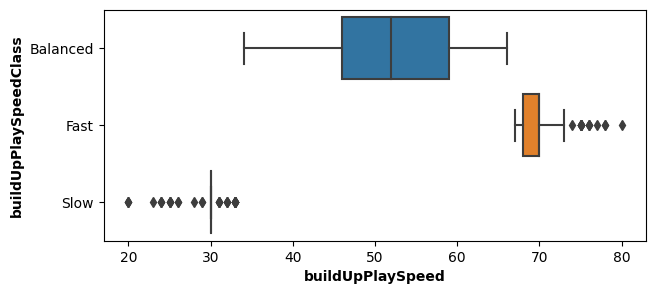

In [41]:
sns.boxplot(team_attributes, x="buildUpPlaySpeed", y="buildUpPlaySpeedClass");

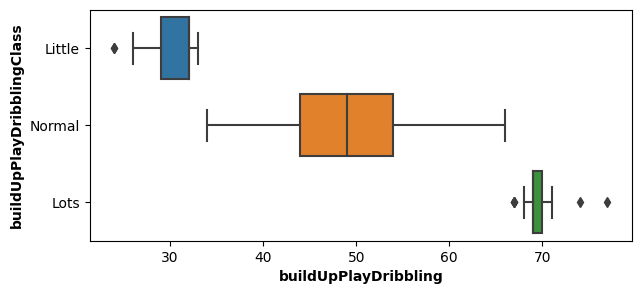

In [42]:
sns.boxplot(
    team_attributes, x="buildUpPlayDribbling", y="buildUpPlayDribblingClass"
);

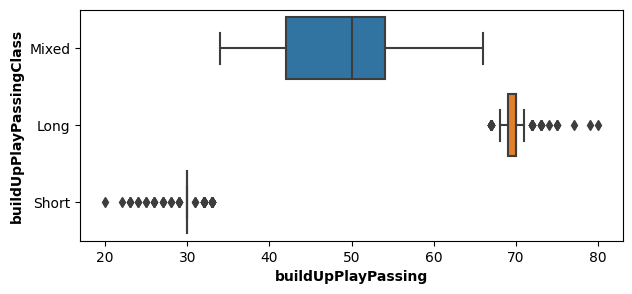

In [43]:
sns.boxplot(
    team_attributes, x="buildUpPlayPassing", y="buildUpPlayPassingClass"
);

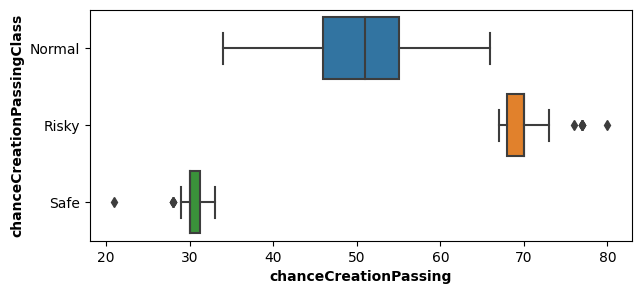

In [44]:
sns.boxplot(
    team_attributes, x="chanceCreationPassing", y="chanceCreationPassingClass"
);

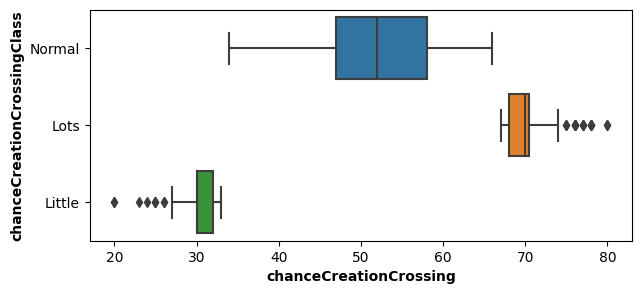

In [45]:
sns.boxplot(
    team_attributes, x="chanceCreationCrossing", y="chanceCreationCrossingClass"
);

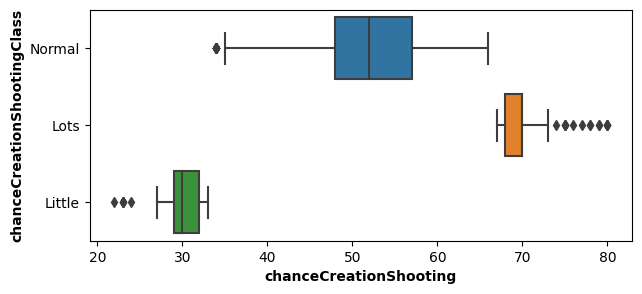

In [46]:
sns.boxplot(
    team_attributes, x="chanceCreationShooting", y="chanceCreationShootingClass"
);

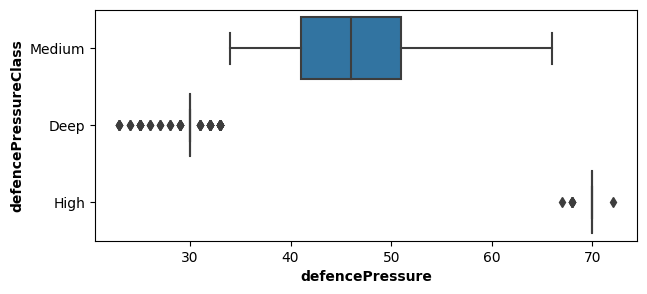

In [47]:
sns.boxplot(team_attributes, x="defencePressure", y="defencePressureClass");

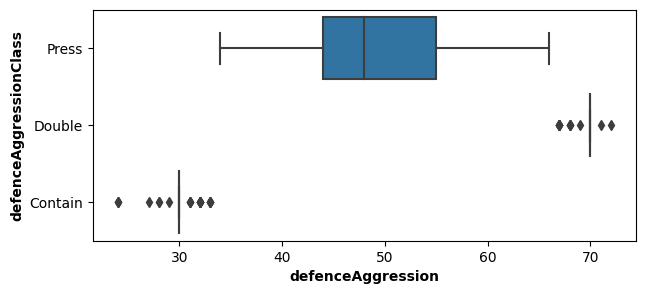

In [48]:
sns.boxplot(team_attributes, x="defenceAggression", y="defenceAggressionClass");

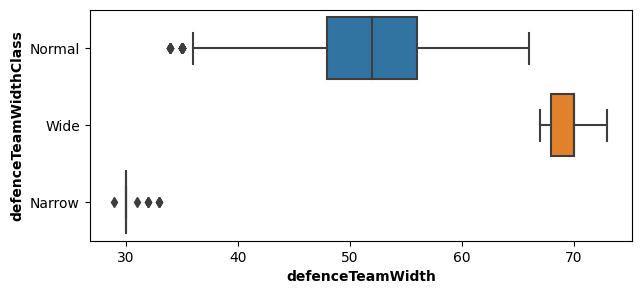

In [49]:
sns.boxplot(team_attributes, x="defenceTeamWidth", y="defenceTeamWidthClass");

</details>

## Delete Tables

The tables in this section were imported for exploratory purposes only.
In the next section they will be imported in the form that is needed to answer the main questions of this analysis.

In [50]:
df_to_delete = [match, player, player_attributes, team, team_attributes]
del df_to_delete

# Data Import & Pre-Processing

In this section, data will be imported and pre-processed to create the following tables required for the main analyses:

1) To present analyzed counties and leagues:
    - `leagues` 

2) To compare resultativeness by leagues and seasons:
   - `goals_summary`

3) To identify and analyze top teams:
   - `teams_top_bottom_goals`
   - `teams_wins_per_season`

4) To identify top players in 2015/2016 and what factors make them best:
   - `players`

5) To investigate, if home advantage exists:
   - `matches`

6) To investigate relationship between betting odds from different companies/websites:
   - `matches_betting_odds`

7) For team score prediction in a match:
    - `team_train`
    - `team_test`

8) For match outcome (home wins, draw, away wins) prediction:
    - `match_train`
    - `match_test`




Some additional tables will be created *ad-hoc* in the analysis section.

## Import

This section contains code that imports data to Python. Some pre-processing in SQL is also performed.

Before importing into Python:

- tables `country` and `league` were merged and the result was called `leagues`.
- new column `country` in table was created where Scotland and England were treated as the same country United Kingdom, UK,
- column `region` was created to indicate regions of UK.

In [51]:
# | code-summary: "Code: Import `leagues` (`country` + `league`)"
# | label: tbl-table-leagues
# | tbl-cap: "Inspection: a few rows of table `leagues`."

query = """--sql
SELECT 
    l.id league_id,
    CASE 
        WHEN c.name IN ('England', 'Scotland') THEN 'United Kingdom'
        ELSE c.name
    END country,
    CASE  
        WHEN c.name IN ('England', 'Scotland') THEN c.name
        ELSE ''
    END region,
    l.name league
FROM Country c FULL JOIN League l ON ( l.country_id = c.id );
"""
leagues = pd.read_sql_query(query, db)

# Print
leagues.head(2)

league_id         country   region                  league
0          1         Belgium           Belgium Jupiler League
1       1729  United Kingdom  England  England Premier League

In [52]:
leagues.shape

(11, 4)

Before importing into Python, `team`, and `team_attributes` tables were merged.

In [53]:
# | code-summary: "Code: Import `teams` (`team` + `team_attributes`)"
# | label: tbl-table-teams
# | tbl-cap: "Inspection: a few rows of table `teams`."

# EXCLUDE [t.id, t.team_fifa_api_id, ta.id, ta.team_fifa_api_id, ta.team_api_id]
query = """--sql
SELECT
    t.team_api_id team_id,
    t.team_long_name team_name,
    t.team_short_name,
    
    ta.date team_info_date, 
    ta.buildUpPlayPositioningClass,
    ta.chanceCreationPositioningClass,
    ta.defenceDefenderLineClass,
    
    ta.buildUpPlaySpeed,
    ta.buildUpPlayDribbling,
    ta.buildUpPlayPassing,
    ta.chanceCreationPassing,
    ta.chanceCreationCrossing,
    ta.chanceCreationShooting,
    ta.defencePressure,
    ta.defenceAggression,
    ta.defenceTeamWidth,
    
    ta.buildUpPlaySpeedClass,
    ta.buildUpPlayDribblingClass,
    ta.buildUpPlayPassingClass,
    ta.chanceCreationPassingClass,
    ta.chanceCreationCrossingClass,
    ta.chanceCreationShootingClass,
    ta.defencePressureClass,
    ta.defenceAggressionClass,
    ta.defenceTeamWidthClass

FROM Team t FULL JOIN Team_Attributes ta 
ON ( ta.team_api_id = t.team_api_id );
"""
teams = pd.read_sql_query(query, db)

# Print
teams.head(2).style.hide(axis="index").format(precision=1)

In [54]:
teams.shape

(1469, 25)

Before importing into Python, data about players were pre-processed:

- Weight was converted to kilograms.
- Birth year was extracted as separate column.
- Body mass index (BMI) was calculated.
- `player` and `player_attributes` tables were merged.

In [55]:
# | code-summary: "Code: Import `players` (`player` + `player_attributes`)"
# | label: tbl-table-players
# | tbl-cap: "Inspection: a few rows of table `players`."

# EXCLUDE [p.id, p.player_fifa_api_id, pa.id, pa.player_fifa_api_id]
query = """--sql
SELECT 
    -- id info
    p.player_api_id player_id, 
    pa.date player_info_date,
    -- player
    p.player_name, 
    p.birthday,
    STRFTIME('%Y', p.birthday) birth_year,
    p.height,
    p.weight/2.205 weight_kg, 
    (p.weight/2.205) / ((p.height/100)*(p.height/100)) bmi,
    -- player attributes
    pa.overall_rating, pa.potential, 
    pa.preferred_foot,pa.attacking_work_rate, pa.defensive_work_rate, 
    pa.crossing, pa.finishing, pa.heading_accuracy, pa.short_passing, 
    pa.volleys, pa.dribbling, pa.curve, pa.free_kick_accuracy, 
    pa.long_passing, pa.ball_control, pa.acceleration, pa.sprint_speed, 
    pa.agility, pa.reactions, pa.balance, pa.shot_power, pa.jumping, 
    pa.stamina, pa.strength, pa.long_shots, pa.aggression, pa.interceptions, 
    pa.positioning, pa.vision, pa.penalties, pa.marking, pa.standing_tackle,
    pa.sliding_tackle, pa.gk_diving, pa.gk_handling, pa.gk_kicking, 
    pa.gk_positioning, pa.gk_reflexes
FROM Player p JOIN Player_Attributes pa 
ON ( pa.player_api_id = p.player_api_id );
"""
players = pd.read_sql_query(query, db)

# Print
players.head(2).style.hide(axis="index").format(precision=1)

In [56]:
players.shape

(183978, 46)


From table `match` only the columns of interest were imported.
The table was named `matches`.

In [57]:
# | code-summary: "Code: Import `matches`"
# | label: tbl-table-matches-1
# | tbl-cap: "Inspection: a few rows of table `matches` (1)."

query = """--sql
SELECT 
    -- match info
    m.id match_id, m.league_id, m.season, m.stage, m.date match_date,
    -- team info
    m.home_team_api_id home_team_id, m.away_team_api_id away_team_id,
    m.home_team_goal, m.away_team_goal,
    -- players
    m.home_player_1, m.home_player_2, m.home_player_3, m.home_player_4,
    m.home_player_5, m.home_player_6, m.home_player_7, m.home_player_8, 
    m.home_player_9, m.home_player_10, m.home_player_11, 
    m.away_player_1, m.away_player_2, m.away_player_3, m.away_player_4,
    m.away_player_5, m.away_player_6, m.away_player_7, m.away_player_8,
    m.away_player_9, m.away_player_10, m.away_player_11,
    -- betting odds
    m.B365H, m.B365D, m.B365A, m.BWH, m.BWD, m.BWA, m.IWH, m.IWD, m.IWA, 
    m.LBH, m.LBD, m.LBA, m.PSH, m.PSD, m.PSA, m.WHH, m.WHD, m.WHA, 
    m.SJH, m.SJD, m.SJA, m.VCH, m.VCD, m.VCA, m.GBH, m.GBD, m.GBA,
    m.BSH, m.BSD, m.BSA
FROM Match m;
"""
matches = pd.read_sql_query(query, db)

# Print
matches.head(2).style.hide(axis="index").format(precision=1)

In [58]:
matches.shape

(25979, 61)

## Pre-Process in Python

This section contains code that pre-processes data in Python.

Pre-process `teams` table.

In [59]:
# | code-summary: "Code: Pre-process `teams`"
teams = teams.to_datetime("team_info_date").sort_values(["team_info_date"])

Pre-process `players` table.

In [60]:
# | code-summary: "Code: Pre-process `players`"
# | label: tbl-table-players-2
# | tbl-cap: "Inspection: a few rows of table `players` (2)."


# For work rate (wr) variables' pre-processing
wr_categories = pd.CategoricalDtype(
    categories=["low", "medium", "high"], ordered=True
)

# Pre-process
players = (
    players.to_datetime(["birthday", "player_info_date"])
    .astype({"birth_year": int})
    .sort_values(["player_info_date"])
    .to_category("preferred_foot", ["left", "right"])
    .astype(
        {
            "defensive_work_rate": wr_categories,
            "attacking_work_rate": wr_categories,
        }
    )
)

players.head(2)

player_id player_info_date         player_name   birthday  birth_year  \
183977      39902       2007-02-22  Zvjezdan Misimovic 1982-06-05        1982   
79627       38343       2007-02-22           Jef Delen 1976-06-29        1976   

        height  weight_kg   bmi  overall_rating  potential preferred_foot  \
183977  180.34      79.82 24.54           80.00      81.00          right   
79627   175.26      63.04 20.52           67.00      69.00           left   

       attacking_work_rate defensive_work_rate  crossing  finishing  \
183977              medium                 low     74.00      68.00   
79627               medium              medium     63.00      62.00   

        heading_accuracy  short_passing  volleys  dribbling  curve  \
183977             57.00          88.00    77.00      87.00  86.00   
79627              59.00          63.00    38.00      68.00  53.00   

        free_kick_accuracy  long_passing  ball_control  acceleration  \
183977               53.00         78.00         91.00         58.00   
79627                65.00         51.00         62.00         61.00   

        sprint_speed  agility  reactions  balance  shot_power  jumping  \
183977         64.00    77.00      66.00    73.00       72.00    58.00   
79627          68.00    65.00      64.00    61.00       66.00    69.00   

        stamina  strength  long_shots  aggression  interceptions  positioning  \
183977    67.00     59.00       78.00       63.00          63.00        68.00   
79627     83.00     54.00       61.00       58.00          62.00        60.00   

        vision  penalties  marking  standing_tackle  sliding_tackle  \
183977   88.00      53.00    38.00            32.00           30.00   
79627    63.00      65.00    44.00            64.00           64.00   

        gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
183977       9.00         9.00       78.00            7.00        15.00  
79627        7.00        15.00       51.00            8.00         6.00

<br>

Merge dataset `leagues` to `matches` and pre-process `matches` (this dataset contains one row per match):

In [61]:
# | code-summary: "Code: Pre-process `matches`"
# | label: tbl-table-matches-2
# | tbl-cap: "Inspection: a few rows of table `matches` (2)."

# Prepare for pre-processing ----------------------------------------------
# Recode match goal difference (goal_diff > 0, if home wins) into words.
def who_wins(goal_diff):
    """Recode outcome of match to text values"""
    if goal_diff < 0:
        return "Away Wins"
    elif goal_diff == 0:
        return "Draw"
    else:
        return "Home Wins"


# Objects to create categorical variables
# fmt: off
season_categories=[
    "2008/2009", "2009/2010", "2010/2011", "2011/2012", 
    "2012/2013", "2013/2014", "2014/2015", "2015/2016",
]

# Objects to rename betting odds
## Old names 
betting_odds_names_old = [
    "B365H", "B365D", "B365A", 
    "BWH", "BWD", "BWA", "IWH", "IWD", "IWA", "LBH", "LBD", "LBA", 
    "PSH", "PSD", "PSA", "WHH", "WHD", "WHA", "SJH", "SJD", "SJA",
    "VCH", "VCD", "VCA", "GBH", "GBD", "GBA", "BSH", "BSD", "BSA",
]

## New names 
betting_odds_names_new = [
    f"{i[:-1]}_home_wins"      if (i.endswith("H"))
    else f"{i[:-1]}_draw"      if (i.endswith("D"))
    else f"{i[:-1]}_away_wins" if (i.endswith("A"))
    else "error"
    for i in betting_odds_names_old
]
# fmt: on

## Names map
odds_names_map = dict(zip(betting_odds_names_old, betting_odds_names_new))

# Pre-process `matches` dataset -------------------------------------------
matches = (
    # Merge matches and leagues
    pd.merge(matches, leagues, on="league_id")
    # Drop columns
    .drop(columns="league_id")
    # Rename columns
    .rename(columns=odds_names_map)
    # Fix data types
    .to_datetime("match_date")
    .to_category("season", season_categories, ordered=True)
    .to_category("league")
    # Create new variables
    .assign(
        goal_sum=lambda x: x.home_team_goal + x.away_team_goal,
        # goal_diff > 0, if home wins:
        goal_diff=lambda x: x.home_team_goal - x.away_team_goal,
        goal_diff_sign=lambda x: np.sign(x.goal_diff),
        match_winner=lambda x: x.goal_diff.apply(who_wins).to_category(),
        # Ratio ha: "home wins / away wins"
        B365_ratio_ha=lambda x: x.B365_home_wins / x.B365_away_wins,
        BW_ratio_ha=lambda x: x.BW_home_wins / x.BW_away_wins,
        PS_ratio_ha=lambda x: x.PS_home_wins / x.PS_away_wins,
        VC_ratio_ha=lambda x: x.VC_home_wins / x.VC_away_wins,
        IW_ratio_ha=lambda x: x.IW_home_wins / x.IW_away_wins,
        WH_ratio_ha=lambda x: x.WH_home_wins / x.WH_away_wins,
        GB_ratio_ha=lambda x: x.GB_home_wins / x.GB_away_wins,
        LB_ratio_ha=lambda x: x.LB_home_wins / x.LB_away_wins,
        SJ_ratio_ha=lambda x: x.SJ_home_wins / x.SJ_away_wins,
        BS_ratio_ha=lambda x: x.BS_home_wins / x.BS_away_wins,
        # Log-ratios of ha
        B365_log_ratio_ha=lambda x: np.log(x.B365_home_wins / x.B365_away_wins),
        BW_log_ratio_ha=lambda x: np.log(x.BW_home_wins / x.BW_away_wins),
        PS_log_ratio_ha=lambda x: np.log(x.PS_home_wins / x.PS_away_wins),
        VC_log_ratio_ha=lambda x: np.log(x.VC_home_wins / x.VC_away_wins),
        IW_log_ratio_ha=lambda x: np.log(x.IW_home_wins / x.IW_away_wins),
        WH_log_ratio_ha=lambda x: np.log(x.WH_home_wins / x.WH_away_wins),
        GB_log_ratio_ha=lambda x: np.log(x.GB_home_wins / x.GB_away_wins),
        LB_log_ratio_ha=lambda x: np.log(x.LB_home_wins / x.LB_away_wins),
        SJ_log_ratio_ha=lambda x: np.log(x.SJ_home_wins / x.SJ_away_wins),
        BS_log_ratio_ha=lambda x: np.log(x.BS_home_wins / x.BS_away_wins),
    )
    # Change position of columns
    .relocate("league", before="season")
    .relocate("region", before="league")
    .relocate("country", before="region")
    .relocate("goal_sum", before="home_player_1")
    .relocate("goal_diff", before="home_player_1")
    .relocate("goal_diff_sign", before="home_player_1")
    .relocate("match_winner", before="home_player_1")
    # Sort rows by date
    .sort_values("match_date")
)

matches.head(2)

match_id      country region                    league     season  \
24558     24559  Switzerland         Switzerland Super League  2008/2009   
24559     24560  Switzerland         Switzerland Super League  2008/2009   

       stage match_date  home_team_id  away_team_id  home_team_goal  \
24558      1 2008-07-18         10192          9931               1   
24559      1 2008-07-19          9930         10179               3   

       away_team_goal  goal_sum  goal_diff  goal_diff_sign match_winner  \
24558               2         3         -1              -1    Away Wins   
24559               1         4          2               1    Home Wins   

       home_player_1  home_player_2  home_player_3  home_player_4  \
24558            NaN            NaN            NaN            NaN   
24559            NaN            NaN            NaN            NaN   

       home_player_5  home_player_6  home_player_7  home_player_8  \
24558            NaN            NaN            NaN            NaN   
24559            NaN            NaN            NaN            NaN   

       home_player_9  home_player_10  home_player_11  away_player_1  \
24558            NaN             NaN             NaN            NaN   
24559            NaN             NaN             NaN            NaN   

       away_player_2  away_player_3  away_player_4  away_player_5  \
24558            NaN            NaN            NaN            NaN   
24559            NaN            NaN            NaN            NaN   

       away_player_6  away_player_7  away_player_8  away_player_9  \
24558            NaN            NaN            NaN            NaN   
24559            NaN            NaN            NaN            NaN   

       away_player_10  away_player_11  B365_home_wins  B365_draw  \
24558             NaN             NaN             NaN        NaN   
24559             NaN             NaN             NaN        NaN   

       B365_away_wins  BW_home_wins  BW_draw  BW_away_wins  IW_home_wins  \
24558             NaN           NaN      NaN           NaN           NaN   
24559             NaN           NaN      NaN           NaN           NaN   

       IW_draw  IW_away_wins  LB_home_wins  LB_draw  LB_away_wins  \
24558      NaN           NaN           NaN      NaN           NaN   
24559      NaN           NaN           NaN      NaN           NaN   

       PS_home_wins  PS_draw  PS_away_wins  WH_home_wins  WH_draw  \
24558           NaN      NaN           NaN           NaN      NaN   
24559           NaN      NaN           NaN           NaN      NaN   

       WH_away_wins  SJ_home_wins  SJ_draw  SJ_away_wins  VC_home_wins  \
24558           NaN           NaN      NaN           NaN           NaN   
24559           NaN           NaN      NaN           NaN           NaN   

       VC_draw  VC_away_wins  GB_home_wins  GB_draw  GB_away_wins  \
24558      NaN           NaN           NaN      NaN           NaN   
24559      NaN           NaN           NaN      NaN           NaN   

       BS_home_wins  BS_draw  BS_away_wins  B365_ratio_ha  BW_ratio_ha  \
24558           NaN      NaN           NaN            NaN          NaN   
24559           NaN      NaN           NaN            NaN          NaN   

       PS_ratio_ha  VC_ratio_ha  IW_ratio_ha  WH_ratio_ha  GB_ratio_ha  \
24558          NaN          NaN          NaN          NaN          NaN   
24559          NaN          NaN          NaN          NaN          NaN   

       LB_ratio_ha  SJ_ratio_ha  BS_ratio_ha  B365_log_ratio_ha  \
24558          NaN          NaN          NaN                NaN   
24559          NaN          NaN          NaN                NaN   

       BW_log_ratio_ha  PS_log_ratio_ha  VC_log_ratio_ha  IW_log_ratio_ha  \
24558              NaN              NaN              NaN              NaN   
24559              NaN              NaN              NaN              NaN   

       WH_log_ratio_ha  GB_log_ratio_ha  LB_log_ratio_ha  SJ_log_ratio_ha  \
24558              NaN              NaN              N

In [62]:
# | code-summary: "Code: Create `goals_summary`"

# Goals summary dataset for each league and season
goals_summary = (
    matches.groupby(["league", "season"])
    .goal_sum.agg(["count", "sum"])
    .rename(columns={"count": "n_matches_total", "sum": "n_goals_total"})
    .eval("n_goals_per_match = n_goals_total/n_matches_total")
)

# Rank leagues by average number of goals per match per season
leagues_by_goals = [
    *goals_summary.groupby("league")
    .n_goals_per_match.mean()
    .sort_values(ascending=False)
    .index
]

# Sort leagues by "resultativeness": update goals summary table
goals_summary = (
    goals_summary.reset_index()
    .assign(league=lambda x: x.league.to_category(leagues_by_goals))
    .set_index(["league", "season"])
    .sort_index()
)

# Reorder categories (leagues) in `match`
matches = matches.to_category("league", leagues_by_goals)

In [63]:
# | code-summary: "Code: Create `matches_betting_odds` table"

# Dataset for betting odds analysis

# Variable names
cols_to_include_for_odds = [
    "date",
    "stage",
    # Goal statistics/match outcomes
    "home_team_goal",
    "away_team_goal",
    "goal_sum",
    "goal_diff",
    "goal_diff_sign",
    "match_winner",
    # Betting odds
    "B365_home_wins",
    "BW_home_wins",
    "IW_home_wins",
    "LB_home_wins",
    "PS_home_wins",
    "WH_home_wins",
    "SJ_home_wins",
    "VC_home_wins",
    "GB_home_wins",
    "BS_home_wins",
    "B365_draw",
    "BW_draw",
    "IW_draw",
    "LB_draw",
    "PS_draw",
    "WH_draw",
    "SJ_draw",
    "VC_draw",
    "GB_draw",
    "BS_draw",
    "B365_away_wins",
    "BW_away_wins",
    "IW_away_wins",
    "LB_away_wins",
    "PS_away_wins",
    "WH_away_wins",
    "SJ_away_wins",
    "VC_away_wins",
    "GB_away_wins",
    "BS_away_wins",
    # Derivative/Calculated variables;
    # "ha" means Home/Away betting odds ratio
    "B365_ratio_ha",
    "BW_ratio_ha",
    "PS_ratio_ha",
    "VC_ratio_ha",
    "IW_ratio_ha",
    "WH_ratio_ha",
    "GB_ratio_ha",
    "LB_ratio_ha",
    "SJ_ratio_ha",
    "BS_ratio_ha",
    "B365_log_ratio_ha",
    "BW_log_ratio_ha",
    "PS_log_ratio_ha",
    "VC_log_ratio_ha",
    "IW_log_ratio_ha",
    "WH_log_ratio_ha",
    "GB_log_ratio_ha",
    "LB_log_ratio_ha",
    "SJ_log_ratio_ha",
    "BS_log_ratio_ha",
]

matches_betting_odds = matches.filter(cols_to_include_for_odds)

From `matches`, let's create a dataset `matches_long_team` with one row per team:

In [64]:
# | code-summary: "Code: Create `matches_long_team`"
# | label: tbl-table-matches-long-team-1
# | tbl-cap: "Inspection: a few rows of table `matches_long_team` (1)."

# Add column `won_or_lost`, which indicates match status for the team:
def team_won_or_lost(df):
    """Return outcome if a team won or lost a match or there was draw."""
    if df.match_winner == "Draw":
        return "draw"
    elif (df.team_type == "home") and (df.match_winner == "Home Wins"):
        return "won"
    elif (df.team_type == "away") and (df.match_winner == "Away Wins"):
        return "won"
    else:
        return "lost"


def negate_for_away_team(df):
    """Negate goal difference for away team.
    Negative goal difference here means that the team lost.
    """
    if df.team_type == "away":
        return -df.goal_diff
    else:
        return df.goal_diff


matches_long_team = (
    matches.pivot_longer(
        column_names=re.compile("^(home|away)_(.+)"),
        names_pattern="^(home|away)_(.+)",
        names_to=("team_type", ".value"),
        sort_by_appearance=True,
    )
    .to_category("team_type")
    .rename(columns={"team_goal": "team_goals"})
    .assign(
        team_outcome=lambda x: x.apply(team_won_or_lost, axis=1),
        team_goal_diff=lambda x: x.apply(negate_for_away_team, axis=1),
        team_goal_diff_sign=lambda x: np.sign(x.team_goal_diff),
    )
    .relocate("team_id", before="B365_home_wins")
    .relocate("team_type", before="B365_home_wins")
    .relocate("team_goals", before="B365_home_wins")
    .relocate("team_goal_diff", before="B365_home_wins")
    .relocate("team_goal_diff_sign", before="B365_home_wins")
    .relocate("team_outcome", before="B365_home_wins")
)

# Check output
print(
    "Expected ratio is 2, got: ", matches_long_team.shape[0] / matches.shape[0]
)
matches_long_team.head(2)

Expected ratio is 2, got:  2.0


match_id      country region                    league     season  stage  \
0     24559  Switzerland         Switzerland Super League  2008/2009      1   
1     24559  Switzerland         Switzerland Super League  2008/2009      1   

  match_date  goal_sum  goal_diff  goal_diff_sign match_winner  team_id  \
0 2008-07-18         3         -1              -1    Away Wins    10192   
1 2008-07-18         3         -1              -1    Away Wins     9931   

  team_type  team_goals  team_goal_diff  team_goal_diff_sign team_outcome  \
0      home           1              -1                   -1         lost   
1      away           2               1                    1          won   

   B365_home_wins  B365_draw  B365_away_wins  BW_home_wins  BW_draw  \
0             NaN        NaN             NaN           NaN      NaN   
1             NaN        NaN             NaN           NaN      NaN   

   BW_away_wins  IW_home_wins  IW_draw  IW_away_wins  LB_home_wins  LB_draw  \
0           NaN           NaN      NaN           NaN           NaN      NaN   
1           NaN           NaN      NaN           NaN           NaN      NaN   

   LB_away_wins  PS_home_wins  PS_draw  PS_away_wins  WH_home_wins  WH_draw  \
0           NaN           NaN      NaN           NaN           NaN      NaN   
1           NaN           NaN      NaN           NaN           NaN      NaN   

   WH_away_wins  SJ_home_wins  SJ_draw  SJ_away_wins  VC_home_wins  VC_draw  \
0           NaN           NaN      NaN           NaN           NaN      NaN   
1           NaN           NaN      NaN           NaN           NaN      NaN   

   VC_away_wins  GB_home_wins  GB_draw  GB_away_wins  BS_home_wins  BS_draw  \
0           NaN           NaN      NaN           NaN           NaN      NaN   
1           NaN           NaN      NaN           NaN           NaN      NaN   

   BS_away_wins  B365_ratio_ha  BW_ratio_ha  PS_ratio_ha  VC_ratio_ha  \
0           NaN            NaN          NaN          NaN          NaN   
1           NaN            NaN          NaN          NaN          NaN   

   IW_ratio_ha  WH_ratio_ha  GB_ratio_ha  LB_ratio_ha  SJ_ratio_ha  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   

   BS_ratio_ha  B365_log_ratio_ha  BW_log_ratio_ha  PS_log_ratio_ha  \
0          NaN                NaN              NaN              NaN   
1          NaN                NaN              NaN              NaN   

   VC_log_ratio_ha  IW_log_ratio_ha  WH_log_ratio_ha  GB_log_ratio_ha  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   

   LB_log_ratio_ha  SJ_log_ratio_ha  BS_log_ratio_ha  player_1  player_2  \
0              NaN              NaN              NaN       NaN       NaN   
1              NaN              NaN              NaN       NaN       NaN   

   player_3  player_4  player_5  player_6  player_7  player_8  player_9  \
0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

   player_10  player_11  
0        NaN        NaN  
1        NaN        NaN

<br>

To each match, merge last known information about the team before that particular match.

*Note*, that only teams, which had information in `team_attributes`, will be merged (merge requires non-null values in `team_info_date`). As some teams did not have this information, their names were not merged too, as they were present in `teams` table. if this is an issue, `team` and `team_attributes` should be merged separately to `matches_long_team`.

In [65]:
# | code-summary: "Code: Merge `matches_long_team` and `teams`"
# | label: tbl-table-matches-long-team-2
# | tbl-cap: "Inspection: a few rows of table `matches_long_team` (2)."

matches_long_team = pd.merge_asof(
    left=matches_long_team,
    right=teams.dropna(subset=["team_info_date"]),
    left_on="match_date",
    right_on="team_info_date",
    by="team_id",
).relocate("team_info_date", before="goal_sum")

matches_long_team.tail(2)

match_id      country region                    league     season  \
51956     25949  Switzerland         Switzerland Super League  2015/2016   
51957     25949  Switzerland         Switzerland Super League  2015/2016   

       stage match_date team_info_date  goal_sum  goal_diff  goal_diff_sign  \
51956     36 2016-05-25     2015-09-10         4          2               1   
51957     36 2016-05-25     2015-09-10         4          2               1   

      match_winner  team_id team_type  team_goals  team_goal_diff  \
51956    Home Wins    10243      home           3               2   
51957    Home Wins     9824      away           1              -2   

       team_goal_diff_sign team_outcome  B365_home_wins  B365_draw  \
51956                    1          won             NaN        NaN   
51957                   -1         lost             NaN        NaN   

       B365_away_wins  BW_home_wins  BW_draw  BW_away_wins  IW_home_wins  \
51956             NaN           NaN      NaN           NaN           NaN   
51957             NaN           NaN      NaN           NaN           NaN   

       IW_draw  IW_away_wins  LB_home_wins  LB_draw  LB_away_wins  \
51956      NaN           NaN           NaN      NaN           NaN   
51957      NaN           NaN           NaN      NaN           NaN   

       PS_home_wins  PS_draw  PS_away_wins  WH_home_wins  WH_draw  \
51956           NaN      NaN           NaN           NaN      NaN   
51957           NaN      NaN           NaN           NaN      NaN   

       WH_away_wins  SJ_home_wins  SJ_draw  SJ_away_wins  VC_home_wins  \
51956           NaN           NaN      NaN           NaN           NaN   
51957           NaN           NaN      NaN           NaN           NaN   

       VC_draw  VC_away_wins  GB_home_wins  GB_draw  GB_away_wins  \
51956      NaN           NaN           NaN      NaN           NaN   
51957      NaN           NaN           NaN      NaN           NaN   

       BS_home_wins  BS_draw  BS_away_wins  B365_ratio_ha  BW_ratio_ha  \
51956           NaN      NaN           NaN            NaN          NaN   
51957           NaN      NaN           NaN            NaN          NaN   

       PS_ratio_ha  VC_ratio_ha  IW_ratio_ha  WH_ratio_ha  GB_ratio_ha  \
51956          NaN          NaN          NaN          NaN          NaN   
51957          NaN          NaN          NaN          NaN          NaN   

       LB_ratio_ha  SJ_ratio_ha  BS_ratio_ha  B365_log_ratio_ha  \
51956          NaN          NaN          NaN                NaN   
51957          NaN          NaN          NaN                NaN   

       BW_log_ratio_ha  PS_log_ratio_ha  VC_log_ratio_ha  IW_log_ratio_ha  \
51956              NaN              NaN              NaN              NaN   
51957              NaN              NaN              NaN              NaN   

       WH_log_ratio_ha  GB_log_ratio_ha  LB_log_ratio_ha  SJ_log_ratio_ha  \
51956              NaN              NaN              NaN              NaN   
51957              NaN              NaN              NaN              NaN   

       BS_log_ratio_ha  player_1  player_2  player_3  player_4  player_5  \
51956              NaN   7621.00 197757.00 115700.00 113235.00 121080.00   
51957              NaN 154261.00 294256.00 257845.00  41621.00 214344.00   

       player_6  player_7  player_8  player_9  player_10  player_11  \
51956  41116.00 632356.00 465399.00 462608.00  198082.00    3517.00   
51957 114011.00  56868.00 488297.00 113227.00  531309.00  493418.00   

       team_name team_short_name buildUpPlayPositioningClass  \
51956  FC Zürich             ZUR                   Organised   
51957   FC Vaduz             VAD                   Organised   

      chanceCreationPositioningClass defenceDefenderLineClass  \
51956                      Organised                    Cover   
51957                      Organised                    Cover   

       buildUpPlaySpeed  buildUpPlayDribbling  buildUpPlayPassing  \
51956             62.00         

Let's calculate goal scoring statistics of each team per season for team analysis.


In [66]:
# | code-summary: "Code: Create `teams_goals_per_team`"
# | label: tbl-table-teams-goals-per-team
# | tbl-cap: "Inspection: a few rows of table `teams_goals_per_team`."
teams_goals_per_team = (
    matches_long_team.groupby(["team_name", "season", "league"])
    .team_goals.agg(["count", "sum"])
    .rename({"count": "n_matches", "sum": "n_goals"}, axis=1)
    .reset_index()
    # Exclude teams that did not play in that season
    .query("n_matches > 0")
    # Goals per match
    .eval("n_goals_per_match = n_goals/n_matches")
)

teams_goals_per_team.head(n=2)

team_name     season                 league  n_matches  n_goals  \
0  1. FC Kaiserslautern  2010/2011  Germany 1. Bundesliga         34       48   
1  1. FC Kaiserslautern  2011/2012  Germany 1. Bundesliga         34       24   

   n_goals_per_match  
0               1.41  
1               0.71

Let's find several best and worst performing teams in all leagues per season.

In [67]:
# | code-summary: "Code: Create `teams_top_bottom_goals`"
# | label: tbl-table-teams-top-bottom-goals
# | tbl-cap: "Inspection: a few rows of table `teams_top_bottom_goals`."

# Select Top 5 and Bottom 5 teams (by **goals per match**)
# in each season (all leagues)
def select_5(data, column: str, best: bool = True):
    """Select best/worst teams

    Args:
        data (pandas.dataframe)
        column (str): column name to perform computations on.
        best(bool): Should the best (if True) of worst (if False) be found?

    If several teams share the same result as the 5-th, then more than 5
    teams are returned.
    """
    if best:
        return data.nlargest(5, column, keep="all")
    else:
        return data.nsmallest(5, column, keep="all")


def select_5_per_season_by_goals(best: bool):
    """Select best/worst teams in each season"""
    return (
        teams_goals_per_team.groupby("season", as_index=False)
        .apply(select_5, "n_goals_per_match", best=best)
        .sort_values(["season", "n_goals_per_match"], ascending=[True, False])
        .reset_index(drop=True)
    )


teams_top_bottom_goals = pd.concat(
    [
        select_5_per_season_by_goals(best=True).assign(which="Top 5"),
        select_5_per_season_by_goals(best=False).assign(which="Bottom 5"),
    ]
).index_start_at(1)

# Preview
pd.concat([teams_top_bottom_goals.head(n=2), teams_top_bottom_goals.tail(n=2)])

team_name     season                    league  n_matches  n_goals  \
1          Ajax  2009/2010    Netherlands Eredivisie         10       37   
2       Chelsea  2009/2010    England Premier League         11       40   
72  Aston Villa  2015/2016    England Premier League         38       27   
73  Boavista FC  2015/2016  Portugal Liga ZON Sagres         31       21   

    n_goals_per_match     which  
1                3.70     Top 5  
2                3.64     Top 5  
72               0.71  Bottom 5  
73               0.68  Bottom 5

Let's find Top teams by percentage of matches that they won.

In [68]:
# | code-summary: "Code: Create `teams_wins_per_season`"
# | label: tbl-table-teams-wins-per-season
# | tbl-cap: "Inspection: a few rows of table `teams_wins_per_season`.
# |           Columns `Lost`, `Draw`, `Won` indicate percentage of games
# |           per season with the indicated outcome."

teams_wins_per_season = (
    matches_long_team.groupby(["season", "league", "team_name"])
    .team_outcome.value_counts(normalize=True)
    .apply(lambda x: x * 100)
    .unstack("team_outcome")
    .relocate("lost", before="draw")
    .sort_values("won", ascending=False)
    .rename_axis(columns=None)
    .reset_index()
    .fillna(0)  # NaN = 0%
    .groupby(["season"], as_index=False)
    .apply(select_5, "won", best=True)
    .rename(columns=str.capitalize)
    .rename(columns={"Team_name": "Team"})
    .set_index(["Season", "League", "Team"])
    .sort_values(["Season", "Won"], ascending=[True, False])
)

teams_wins_per_season.head(2)

Lost  Draw    Won
Season    League                 Team                             
2009/2010 Belgium Jupiler League RSC Anderlecht  0.00  0.00 100.00
          Netherlands Eredivisie Ajax            0.00  0.00 100.00

From `matches_long_team`, let's create dataset `matches_long_player` with one row per player:

In [69]:
# | code-summary: "Code: Create `matches_long_player`"
# | label: tbl-table-matches-long-player-1
# | tbl-cap: "Inspection: a few rows of table `matches_long_player` (1)."

matches_long_player = matches_long_team.pivot_longer(
    column_names=re.compile("player_.+"),
    names_pattern="player_(.+)",
    names_to="player_no",
    values_to="player_id",
    sort_by_appearance=True,
)

print(
    "Expected ratio is 11, got: ",
    matches_long_player.shape[0] / matches_long_team.shape[0],
)
matches_long_player.head(2)

Expected ratio is 11, got:  11.0


match_id      country region                    league     season  stage  \
0     24559  Switzerland         Switzerland Super League  2008/2009      1   
1     24559  Switzerland         Switzerland Super League  2008/2009      1   

  match_date team_info_date  goal_sum  goal_diff  goal_diff_sign match_winner  \
0 2008-07-18            NaT         3         -1              -1    Away Wins   
1 2008-07-18            NaT         3         -1              -1    Away Wins   

   team_id team_type  team_goals  team_goal_diff  team_goal_diff_sign  \
0    10192      home           1              -1                   -1   
1    10192      home           1              -1                   -1   

  team_outcome  B365_home_wins  B365_draw  B365_away_wins  BW_home_wins  \
0         lost             NaN        NaN             NaN           NaN   
1         lost             NaN        NaN             NaN           NaN   

   BW_draw  BW_away_wins  IW_home_wins  IW_draw  IW_away_wins  LB_home_wins  \
0      NaN           NaN           NaN      NaN           NaN           NaN   
1      NaN           NaN           NaN      NaN           NaN           NaN   

   LB_draw  LB_away_wins  PS_home_wins  PS_draw  PS_away_wins  WH_home_wins  \
0      NaN           NaN           NaN      NaN           NaN           NaN   
1      NaN           NaN           NaN      NaN           NaN           NaN   

   WH_draw  WH_away_wins  SJ_home_wins  SJ_draw  SJ_away_wins  VC_home_wins  \
0      NaN           NaN           NaN      NaN           NaN           NaN   
1      NaN           NaN           NaN      NaN           NaN           NaN   

   VC_draw  VC_away_wins  GB_home_wins  GB_draw  GB_away_wins  BS_home_wins  \
0      NaN           NaN           NaN      NaN           NaN           NaN   
1      NaN           NaN           NaN      NaN           NaN           NaN   

   BS_draw  BS_away_wins  B365_ratio_ha  BW_ratio_ha  PS_ratio_ha  \
0      NaN           NaN            NaN          NaN          NaN   
1      NaN           NaN            NaN          NaN          NaN   

   VC_ratio_ha  IW_ratio_ha  WH_ratio_ha  GB_ratio_ha  LB_ratio_ha  \
0          NaN          NaN          NaN          NaN          NaN   
1          NaN          NaN          NaN          NaN          NaN   

   SJ_ratio_ha  BS_ratio_ha  B365_log_ratio_ha  BW_log_ratio_ha  \
0          NaN          NaN                NaN              NaN   
1          NaN          NaN                NaN              NaN   

   PS_log_ratio_ha  VC_log_ratio_ha  IW_log_ratio_ha  WH_log_ratio_ha  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   

   GB_log_ratio_ha  LB_log_ratio_ha  SJ_log_ratio_ha  BS_log_ratio_ha  \
0              NaN              NaN              NaN              NaN   
1              NaN              NaN              NaN              NaN   

  team_name team_short_name buildUpPlayPositioningClass  \
0       NaN             NaN                         NaN   
1       NaN             NaN                         NaN   

  chanceCreationPositioningClass defenceDefenderLineClass  buildUpPlaySpeed  \
0                            NaN                      NaN               NaN   
1                            NaN                      NaN               NaN   

   buildUpPlayDribbling  buildUpPlayPassing  chanceCreationPassing  \
0                   NaN                 NaN                    NaN   
1                   NaN                 NaN                    NaN   

   chanceCreationCrossing  chanceCreationShooting  defencePressure  \
0                     NaN                     NaN              NaN   
1                     NaN                     NaN              NaN   

   defenceAggression  defenceTeamWidth buildUpPlaySpeedClass  \
0                NaN               NaN                   NaN   
1                NaN               NaN                   NaN   

  buildUpPlayDribblingClass bui

To each match, merge at that time last known information about each player.

In [70]:
# | code-summary: "Code: Merge `matches_long_team` and `teams`"
# | label: tbl-table-matches-long-player-2
# | tbl-cap: "Inspection: a few rows of table `matches_long_player` (2)."

matches_long_player = (
    pd.merge_asof(
        left=(
            matches_long_player.dropna(subset=["player_id"]).astype(
                {"player_id": np.int64}
            )
        ),
        right=players,
        left_on="match_date",
        right_on="player_info_date",
        by="player_id",
    )
    .relocate("player_info_date", before="goal_sum")
    .assign(
        player_age=lambda x: (
            (x.match_date - x.birthday) / np.timedelta64(1, "Y")
        )
    )
)

matches_long_player.tail(2)

match_id      country region                    league     season  \
542279     25949  Switzerland         Switzerland Super League  2015/2016   
542280     25949  Switzerland         Switzerland Super League  2015/2016   

        stage match_date team_info_date player_info_date  goal_sum  goal_diff  \
542279     36 2016-05-25     2015-09-10       2016-04-21         4          2   
542280     36 2016-05-25     2015-09-10       2016-03-03         4          2   

        goal_diff_sign match_winner  team_id team_type  team_goals  \
542279               1    Home Wins     9824      away           1   
542280               1    Home Wins     9824      away           1   

        team_goal_diff  team_goal_diff_sign team_outcome  B365_home_wins  \
542279              -2                   -1         lost             NaN   
542280              -2                   -1         lost             NaN   

        B365_draw  B365_away_wins  BW_home_wins  BW_draw  BW_away_wins  \
542279        NaN             NaN           NaN      NaN           NaN   
542280        NaN             NaN           NaN      NaN           NaN   

        IW_home_wins  IW_draw  IW_away_wins  LB_home_wins  LB_draw  \
542279           NaN      NaN           NaN           NaN      NaN   
542280           NaN      NaN           NaN           NaN      NaN   

        LB_away_wins  PS_home_wins  PS_draw  PS_away_wins  WH_home_wins  \
542279           NaN           NaN      NaN           NaN           NaN   
542280           NaN           NaN      NaN           NaN           NaN   

        WH_draw  WH_away_wins  SJ_home_wins  SJ_draw  SJ_away_wins  \
542279      NaN           NaN           NaN      NaN           NaN   
542280      NaN           NaN           NaN      NaN           NaN   

        VC_home_wins  VC_draw  VC_away_wins  GB_home_wins  GB_draw  \
542279           NaN      NaN           NaN           NaN      NaN   
542280           NaN      NaN           NaN           NaN      NaN   

        GB_away_wins  BS_home_wins  BS_draw  BS_away_wins  B365_ratio_ha  \
542279           NaN           NaN      NaN           NaN            NaN   
542280           NaN           NaN      NaN           NaN            NaN   

        BW_ratio_ha  PS_ratio_ha  VC_ratio_ha  IW_ratio_ha  WH_ratio_ha  \
542279          NaN          NaN          NaN          NaN          NaN   
542280          NaN          NaN          NaN          NaN          NaN   

        GB_ratio_ha  LB_ratio_ha  SJ_ratio_ha  BS_ratio_ha  B365_log_ratio_ha  \
542279          NaN          NaN          NaN          NaN                NaN   
542280          NaN          NaN          NaN          NaN                NaN   

        BW_log_ratio_ha  PS_log_ratio_ha  VC_log_ratio_ha  IW_log_ratio_ha  \
542279              NaN              NaN              NaN              NaN   
542280              NaN              NaN              NaN              NaN   

        WH_log_ratio_ha  GB_log_ratio_ha  LB_log_ratio_ha  SJ_log_ratio_ha  \
542279              NaN              NaN              NaN              NaN   
542280              NaN              NaN              NaN              NaN   

        BS_log_ratio_ha team_name team_short_name buildUpPlayPositioningClass  \
542279              NaN  FC Vaduz             VAD                   Organised   
542280              NaN  FC Vaduz             VAD                   Organised   

       chanceCreationPositioningClass defenceDefenderLineClass  \
542279                      Organised                    Cover   
542280                      Organised                    Cover   

        buildUpPlaySpeed  buildUpPlayDribbling  buildUpPlayPassing  \
542279             53.00                 32.00               56.00   
542280             53.00                 32.00               56.00   

        chanceCreationPassing  chanceCreationCrossing  chanceCreationShooting  \
542279                  38.00                   53.00                   46.00   
542280                  3

In [71]:
matches_long_player.shape

(542281, 139)

Let's aggregate player information (numeric variables) to get one row for team-match combination.

In [72]:
# | code-summary: "Code: Create table `team_player_summary`"
# | label: tbl-table-player-summary
# | tbl-cap: "Inspection: a few rows of table `team_player_summary`."

# Prepare dataset for aggregation
include = [
    "height",
    "weight_kg",
    "bmi",
    "overall_rating",
    "potential",
    "crossing",
    "finishing",
    "heading_accuracy",
    "short_passing",
    "volleys",
    "dribbling",
    "curve",
    "free_kick_accuracy",
    "long_passing",
    "ball_control",
    "acceleration",
    "sprint_speed",
    "agility",
    "reactions",
    "balance",
    "shot_power",
    "jumping",
    "stamina",
    "strength",
    "long_shots",
    "aggression",
    "interceptions",
    "positioning",
    "vision",
    "penalties",
    "marking",
    "standing_tackle",
    "sliding_tackle",
    "gk_diving",
    "gk_handling",
    "gk_kicking",
    "gk_positioning",
    "gk_reflexes",
    "player_age",
]

for_agg = matches_long_player.groupby(["match_id", "team_id"])[include]

# Evaluate which cases include all 11 players
n_player_ok = for_agg.count().min(axis=1).to_frame("players_summarized")
percent_ok = round(n_player_ok.eval("players_summarized==11").mean(), 3) * 100
print(
    f"In {percent_ok:.1f}% cases, summaries include all 11 players. \n"
    "Only these cases will be analyzed next."
)

# Calculate summary statistics for each selected attribute.
# Include only those cases where 11 players are aggregated.
team_player_summary = for_agg.agg(["min", "mean", "std", "max"])
team_player_summary.columns = (
    team_player_summary.columns.to_flat_index().str.join("__")
)
team_player_summary = (
    n_player_ok.join(team_player_summary)
    .query("players_summarized==11")
    .drop(columns="players_summarized")
)
team_player_summary.head(2)

In 82.9% cases, summaries include all 11 players. 
Only these cases will be analyzed next.


height__min  height__mean  height__std  height__max  \
match_id team_id                                                        
145      8635          167.64        183.34         7.08       193.04   
146      9987          170.18        181.26         6.84       193.04   

                  weight_kg__min  weight_kg__mean  weight_kg__std  \
match_id team_id                                                    
145      8635              60.77            78.87            9.00   
146      9987              60.77            73.92            8.41   

                  weight_kg__max  bmi__min  bmi__mean  bmi__std  bmi__max  \
match_id team_id                                                            
145      8635              93.88     21.62      23.39      1.32     25.59   
146      9987              89.80     20.34      22.42      1.16     24.10   

                  overall_rating__min  overall_rating__mean  \
match_id team_id                                              
145      8635                   57.00                 69.45   
146      9987                   54.00                 64.09   

                  overall_rating__std  overall_rating__max  potential__min  \
match_id team_id                                                             
145      8635                    4.80                75.00           69.00   
146      9987                    6.11                72.00           62.00   

                  potential__mean  potential__std  potential__max  \
match_id team_id                                                    
145      8635               74.36            2.84           78.00   
146      9987               71.27            5.39           83.00   

                  crossing__min  crossing__mean  crossing__std  crossing__max  \
match_id team_id                                                                
145      8635             29.00           57.82          14.86          78.00   
146      9987             22.00           54.64          14.66          75.00   

                  finishing__min  finishing__mean  finishing__std  \
match_id team_id                                                    
145      8635              23.00            49.27           18.31   
146      9987              22.00            48.91           18.53   

                  finishing__max  heading_accuracy__min  \
match_id team_id                                          
145      8635              71.00                  25.00   
146      9987              74.00                  22.00   

                  heading_accuracy__mean  heading_accuracy__std  \
match_id team_id                                                  
145      8635                      61.00                  16.77   
146      9987                      51.09                  13.92   

                  heading_accuracy__max  short_passing__min  \
match_id team_id                                              
145      8635                     83.00               51.00   
146      9987                     75.00               26.00   

                  short_passing__mean  short_passing__std  short_passing__max  \
match_id team_id                                                                
145      8635                   65.73                8.91               78.00   
146      9987                   56.00               12.77               72.00   

                  volleys__min  volleys__mean  volleys__std  volleys__max  \
match_id team_id                                                            
145      8635             9.00          47.82         21.34         69.00   
146      9987            25.00          53.73         14.28         72.00   

                  dribbling__min  dribbling__mean  dribbling__std  \
match_id team_id                                                    
145      8635              23.00            55.45           18.62   
146      9987              22.00            54.18           19.54   

                  dribbl

Let's prepare datasets for predictive modelling. 
Several principles I followed:

- mainly numeric variables will be included in the analysis. Exception will be for variable `team_type` witch indicates if the team is playing at home or away.
- some variables (especially betting odds which are highly inter-correlated) with may missing values were also excluded in order not to have more complete cases.

Prepare betting odds for team analysis: instead of `home_wins`, `away_wins` which are less correct in this analysis, here `_win` (victory) and `_loose` (loss) betting odds will be used. Ratios will be calculate using the new variables accordingly. The ratios will wave names ending in  `_ratio_wl` (ratio betting odds to **w**in / betting odds to **l**oose).

In [73]:
# | code-summary: "Code: Create table `team_betting_odds`"
# | label: tbl-table-team-betting-odds
# | tbl-cap: "Inspection: a few rows of table `team_betting_odds`."

team_betting_odds_pre1 = matches_long_team.set_index(["match_id", "team_id"])

team_betting_odds = (
    pd.concat(
        [
            # Transformations for home team
            team_betting_odds_pre1.query("team_type == 'home'").assign(
                # Team wins
                B365_win=lambda x: x.B365_home_wins,
                BW_win=lambda x: x.BW_home_wins,
                VC_win=lambda x: x.VC_home_wins,
                IW_win=lambda x: x.IW_home_wins,
                WH_win=lambda x: x.WH_home_wins,
                LB_win=lambda x: x.LB_home_wins,
                # Team looses
                B365_loose=lambda x: x.B365_away_wins,
                BW_loose=lambda x: x.BW_away_wins,
                VC_loose=lambda x: x.VC_away_wins,
                IW_loose=lambda x: x.IW_away_wins,
                WH_loose=lambda x: x.WH_away_wins,
                LB_loose=lambda x: x.LB_away_wins,
            ),
            # Transformations for away team
            team_betting_odds_pre1.query("team_type == 'away'").assign(
                # Team wins
                B365_win=lambda x: x.B365_away_wins,
                BW_win=lambda x: x.BW_away_wins,
                VC_win=lambda x: x.VC_away_wins,
                IW_win=lambda x: x.IW_away_wins,
                WH_win=lambda x: x.WH_away_wins,
                LB_win=lambda x: x.LB_away_wins,
                # Team looses
                B365_loose=lambda x: x.B365_home_wins,
                BW_loose=lambda x: x.BW_home_wins,
                VC_loose=lambda x: x.VC_home_wins,
                IW_loose=lambda x: x.IW_home_wins,
                WH_loose=lambda x: x.WH_home_wins,
                LB_loose=lambda x: x.LB_home_wins,
            ),
        ]
    )
    .assign(
        # Ratio wl: "team wins / team looses"
        B365_ratio_wl=lambda x: x.B365_win / x.B365_loose,
        BW_ratio_wl=lambda x: x.BW_win / x.BW_loose,
        VC_ratio_wl=lambda x: x.VC_win / x.VC_loose,
        IW_ratio_wl=lambda x: x.IW_win / x.IW_loose,
        WH_ratio_wl=lambda x: x.WH_win / x.WH_loose,
        LB_ratio_wl=lambda x: x.LB_win / x.LB_loose,
        # Log-ratios of ha
        B365_log_ratio_wl=lambda x: np.log(x.B365_win / x.B365_loose),
        BW_log_ratio_wl=lambda x: np.log(x.BW_win / x.BW_loose),
        VC_log_ratio_wl=lambda x: np.log(x.VC_win / x.VC_loose),
        IW_log_ratio_wl=lambda x: np.log(x.IW_win / x.IW_loose),
        WH_log_ratio_wl=lambda x: np.log(x.WH_win / x.WH_loose),
        LB_log_ratio_wl=lambda x: np.log(x.LB_win / x.LB_loose),
    )
    # Keep just betting odds of interest
    .filter(regex="(?<!PS|GB|SJ|BS)_(win$|draw$|loose$|(log_)?ratio_wl$)")
    .dropna()
)

del [team_betting_odds_pre1]

# Inspect
team_betting_odds.tail(2)

B365_draw  BW_draw  IW_draw  LB_draw  WH_draw  VC_draw  \
match_id team_id                                                           
24491    8305          3.80     3.80     4.00     3.80     3.80     4.00   
4702     8678          4.20     4.00     3.70     3.80     4.00     4.10   

                  B365_win  BW_win  VC_win  IW_win  WH_win  LB_win  \
match_id team_id                                                     
24491    8305         1.70    1.70    1.73    1.60    1.60    1.70   
4702     8678         5.25    5.00    5.20    4.50    4.75    5.25   

                  B365_loose  BW_loose  VC_loose  IW_loose  WH_loose  \
match_id team_id                                                       
24491    8305           5.00      4.60      5.00      4.80      5.00   
4702     8678           1.67      1.67      1.67      1.70      1.67   

                  LB_loose  B365_ratio_wl  BW_ratio_wl  VC_ratio_wl  \
match_id team_id                                                      
24491    8305         4.50           0.34         0.37         0.35   
4702     8678         1.65           3.14         2.99         3.11   

                  IW_ratio_wl  WH_ratio_wl  LB_ratio_wl  B365_log_ratio_wl  \
match_id team_id                                                             
24491    8305            0.33         0.32         0.38              -1.08   
4702     8678            2.65         2.84         3.18               1.15   

                  BW_log_ratio_wl  VC_log_ratio_wl  IW_log_ratio_wl  \
match_id team_id                                                      
24491    8305               -1.00            -1.06            -1.10   
4702     8678                1.10             1.14             0.97   

                  WH_log_ratio_wl  LB_log_ratio_wl  
match_id team_id                                    
24491    8305               -1.14            -0.97  
4702     8678                1.05             1.16

In [74]:
team_betting_odds.shape

(44864, 30)

In [75]:
# | code-summary: "Code: Create table `matches_long_team1`"
# | label: tbl-table-matches-long-team1
# | tbl-cap: "Inspection: a few rows of table `matches_long_team1`."

cols = matches_long_team.columns
# Remove player info and column with many NA values
condition_1 = ("player_", "buildUpPlayDribbling")
# Remove some categorical variables and betting odds info
condition_2 = ("Class", "_draw", "_wins", "_ha")
col_index = ~(cols.str.startswith(condition_1) | cols.str.endswith(condition_2))
# Remove rows with no team info
row_index = ~matches_long_team.team_info_date.isna()

matches_long_team1 = matches_long_team.loc[row_index, col_index]

# Join team info, player info and betting odds info
matches_long_team1 = (
    matches_long_team1.set_index(["match_id", "team_id"])
    .join(team_player_summary)
    .join(team_betting_odds)
)

# Remove intermediate results
del [cols, condition_1, condition_2, col_index, row_index]

# Inspect
matches_long_team1.head(2)

country region           league     season  stage match_date  \
match_id team_id                                                                
22055    10267     Spain         Spain LIGA BBVA  2009/2010     23 2010-02-22   
         8305      Spain         Spain LIGA BBVA  2009/2010     23 2010-02-22   

                 team_info_date  goal_sum  goal_diff  goal_diff_sign  \
match_id team_id                                                       
22055    10267       2010-02-22         3          1               1   
         8305        2010-02-22         3          1               1   

                 match_winner team_type  team_goals  team_goal_diff  \
match_id team_id                                                      
22055    10267      Home Wins      home           2               1   
         8305       Home Wins      away           1              -1   

                  team_goal_diff_sign team_outcome    team_name  \
match_id team_id                                                  
22055    10267                      1          won  Valencia CF   
         8305                      -1         lost    Getafe CF   

                 team_short_name  buildUpPlaySpeed  buildUpPlayPassing  \
match_id team_id                                                         
22055    10267               VAL             30.00               30.00   
         8305                GET             30.00               35.00   

                  chanceCreationPassing  chanceCreationCrossing  \
match_id team_id                                                  
22055    10267                    55.00                   60.00   
         8305                     35.00                   50.00   

                  chanceCreationShooting  defencePressure  defenceAggression  \
match_id team_id                                                               
22055    10267                     70.00            55.00              60.00   
         8305                      70.00            40.00              30.00   

                  defenceTeamWidth  height__min  height__mean  height__std  \
match_id team_id                                                             
22055    10267               60.00       170.18        178.95         4.87   
         8305                50.00       175.26        182.42         3.74   

                  height__max  weight_kg__min  weight_kg__mean  \
match_id team_id                                                 
22055    10267         185.42           67.12            74.99   
         8305          187.96           68.03            75.82   

                  weight_kg__std  weight_kg__max  bmi__min  bmi__mean  \
match_id team_id                                                        
22055    10267              4.62           82.09     22.37      23.40   
         8305               3.93           81.18     21.83      22.77   

                  bmi__std  bmi__max  overall_rating__min  \
match_id team_id                                            
22055    10267        0.65     24.67                77.00   
         8305         0.61     23.87                72.00   

                  overall_rating__mean  overall_rating__std  \
match_id team_id                                              
22055    10267                   80.55                 3.64   
         8305                    75.45                 2.38   

                  overall_rating__max  potential__min  potential__mean  \
match_id team_id                                                         
22055    10267                  88.00           80.00            84.82   
         8305                   80.00           75.00            80.18   

                  potential__std  potential__max  crossing__min  \
match_id team_id                                                  
22055    10267              3.66           91.00          21.00   
         8305               3.71           86.00          24.00   

                  crossing_

In [76]:
matches_long_team1.shape

(39840, 212)

In the following code blocks:

- Separate datasets were created for team-related and match-related analysis.
- Data were split ro train and sets sets:
    - **Training data** was included all seasons except the last one.
    -  In **test set** there were data from the last season only (2015/2016).
-  Non-complete cases were removed.

In [77]:
# | code-summary: "Code: Tables and variables for team-related predictive modeling`"
# | label: tbl-table-team-train
# | tbl-cap: "Inspection: a few rows of table `team_train`."


# For predictive modelling (teams)
# Target:
team_target = "team_goals"

# Predictors by type:
df = matches_long_team1
team_vars_team = df.loc[:, "buildUpPlaySpeed":"defenceTeamWidth"].columns
team_vars_player = df.loc[:, "height__min":"player_age__max"].columns
team_vars_betting_odds = df.loc[:, "B365_win":"LB_log_ratio_wl"].columns

team_predictors = [
    "team_type",
    *team_vars_team,
    *team_vars_player,
    *team_vars_betting_odds,
]

# Whole dataset
team_model = df.filter(
    ["season", team_target, *team_predictors], axis=1
).dropna()

# Training/Test sets
team_train = team_model.query("season != '2015/2016'").drop(columns="season")
team_test = team_model.query("season == '2015/2016'").drop(columns="season")

# Remove intermediate results
del [df, team_model]

# Inspect
team_train.head(2)

team_goals team_type  buildUpPlaySpeed  buildUpPlayPassing  \
match_id team_id                                                               
22055    10267             2      home             30.00               30.00   
         8305              1      away             30.00               35.00   

                  chanceCreationPassing  chanceCreationCrossing  \
match_id team_id                                                  
22055    10267                    55.00                   60.00   
         8305                     35.00                   50.00   

                  chanceCreationShooting  defencePressure  defenceAggression  \
match_id team_id                                                               
22055    10267                     70.00            55.00              60.00   
         8305                      70.00            40.00              30.00   

                  defenceTeamWidth  height__min  height__mean  height__std  \
match_id team_id                                                             
22055    10267               60.00       170.18        178.95         4.87   
         8305                50.00       175.26        182.42         3.74   

                  height__max  weight_kg__min  weight_kg__mean  \
match_id team_id                                                 
22055    10267         185.42           67.12            74.99   
         8305          187.96           68.03            75.82   

                  weight_kg__std  weight_kg__max  bmi__min  bmi__mean  \
match_id team_id                                                        
22055    10267              4.62           82.09     22.37      23.40   
         8305               3.93           81.18     21.83      22.77   

                  bmi__std  bmi__max  overall_rating__min  \
match_id team_id                                            
22055    10267        0.65     24.67                77.00   
         8305         0.61     23.87                72.00   

                  overall_rating__mean  overall_rating__std  \
match_id team_id                                              
22055    10267                   80.55                 3.64   
         8305                    75.45                 2.38   

                  overall_rating__max  potential__min  potential__mean  \
match_id team_id                                                         
22055    10267                  88.00           80.00            84.82   
         8305                   80.00           75.00            80.18   

                  potential__std  potential__max  crossing__min  \
match_id team_id                                                  
22055    10267              3.66           91.00          21.00   
         8305               3.71           86.00          24.00   

                  crossing__mean  crossing__std  crossing__max  \
match_id team_id                                                 
22055    10267             62.91          24.16          89.00   
         8305              62.36          17.15          89.00   

                  finishing__min  finishing__mean  finishing__std  \
match_id team_id                                                    
22055    10267             21.00            55.09           26.52   
         8305              21.00            51.64           22.73   

                  finishing__max  heading_accuracy__min  \
match_id team_id                                          
22055    10267             94.00                  21.00   
         8305              80.00                  24.00   

                  heading_accuracy__mean  heading_accuracy__std  \
match_id team_id                                                  
22055    10267                     65.00                  17.37   
         8305                      64.18                  15.67   

                  heading_accuracy__max  short_passing__min  \
match_id team_id                                             

In [78]:
team_train.shape

(27200, 190)

In a similar way, data for matches outcome analysis will be prepared.

In [79]:
# | code-summary: "Code: Create table `matches_long_team2`"
# | label: tbl-table-matches-long-team2
# | tbl-cap: "Inspection: a few rows of table `matches_long_team2`."

cols = matches_long_team.columns
condition_1 = ("PS_", "GB_", "SJ_", "BS_", "player_", "buildUpPlayDribbling")

col_index = ~(cols.str.startswith(condition_1) | cols.str.endswith("Class"))
row_index = ~matches_long_team.team_info_date.isna()

matches_long_team2 = matches_long_team.loc[row_index, col_index]
matches_long_team2 = (
    matches_long_team2.set_index(["match_id", "team_id"])
    .join(team_player_summary)
    .relocate("team_short_name", before="goal_sum")
    .relocate("team_name", before="team_short_name")
)

# Remove intermediate results
del [cols, condition_1, col_index, row_index]

# Inspect
matches_long_team2.head(2)

country region           league     season  stage match_date  \
match_id team_id                                                                
22055    10267     Spain         Spain LIGA BBVA  2009/2010     23 2010-02-22   
         8305      Spain         Spain LIGA BBVA  2009/2010     23 2010-02-22   

                 team_info_date    team_name team_short_name  goal_sum  \
match_id team_id                                                         
22055    10267       2010-02-22  Valencia CF             VAL         3   
         8305        2010-02-22    Getafe CF             GET         3   

                  goal_diff  goal_diff_sign match_winner team_type  \
match_id team_id                                                     
22055    10267            1               1    Home Wins      home   
         8305             1               1    Home Wins      away   

                  team_goals  team_goal_diff  team_goal_diff_sign  \
match_id team_id                                                    
22055    10267             2               1                    1   
         8305              1              -1                   -1   

                 team_outcome  B365_home_wins  B365_draw  B365_away_wins  \
match_id team_id                                                           
22055    10267            won            1.57       4.00            5.50   
         8305            lost            1.57       4.00            5.50   

                  BW_home_wins  BW_draw  BW_away_wins  IW_home_wins  IW_draw  \
match_id team_id                                                               
22055    10267            1.50     3.80          6.50          1.55     3.70   
         8305             1.50     3.80          6.50          1.55     3.70   

                  IW_away_wins  LB_home_wins  LB_draw  LB_away_wins  \
match_id team_id                                                      
22055    10267            6.00          1.50     3.60          5.50   
         8305             6.00          1.50     3.60          5.50   

                  WH_home_wins  WH_draw  WH_away_wins  VC_home_wins  VC_draw  \
match_id team_id                                                               
22055    10267            1.53     3.50          6.00          1.53     3.75   
         8305             1.53     3.50          6.00          1.53     3.75   

                  VC_away_wins  B365_ratio_ha  BW_ratio_ha  VC_ratio_ha  \
match_id team_id                                                          
22055    10267            6.50           0.29         0.23         0.24   
         8305             6.50           0.29         0.23         0.24   

                  IW_ratio_ha  WH_ratio_ha  LB_ratio_ha  B365_log_ratio_ha  \
match_id team_id                                                             
22055    10267           0.26         0.26         0.27              -1.25   
         8305            0.26         0.26         0.27              -1.25   

                  BW_log_ratio_ha  VC_log_ratio_ha  IW_log_ratio_ha  \
match_id team_id                                                      
22055    10267              -1.47            -1.45            -1.35   
         8305               -1.47            -1.45            -1.35   

                  WH_log_ratio_ha  LB_log_ratio_ha  buildUpPlaySpeed  \
match_id team_id                                                       
22055    10267              -1.37            -1.30             30.00   
         8305               -1.37            -1.30             30.00   

                  buildUpPlayPassing  chanceCreationPassing  \
match_id team_id                                              
22055    10267                 30.00                  55.00   
         8305                  35.00                  35.00   

                  chanceCreationCrossing  chanceCreationShooting  \
match_id team_id                                                   
22055    10267              

In [80]:
matches_long_team2.shape

(39840, 212)

In [81]:
# | code-summary: "Code: Tables and variables for match-related predictive modeling`"
# | label: tbl-table-match-train
# | tbl-cap: "Inspection: a few rows of table `match_train`."


# For predictive modelling (match)
# Target:
match_target = "match_winner"

# Variable groups for transformation
vars_predictors = matches_long_team2.loc[
    :, "B365_home_wins":"player_age__max"
].columns
vars_betting_odds = matches_long_team2.loc[
    :, "B365_home_wins":"LB_log_ratio_ha"
].columns

# Whole dataset
match_model = (
    matches_long_team2.filter(
        ["season", "team_type", match_target, *vars_predictors], axis=1
    )
    .reset_index()
    .drop(columns="team_id")
    .pivot_wider(
        index=["match_id", match_target, "season", *vars_betting_odds],
        names_from="team_type",
    )
    .set_index("match_id")
    .dropna()
)

# Predictors by type
match_vars_team = match_model.loc[
    :, "buildUpPlaySpeed_away":"defenceTeamWidth_home"
].columns
match_vars_player = match_model.loc[
    :, "height__min_away":"player_age__max_home"
].columns
match_vars_betting_odds = match_model.loc[
    :, "B365_home_wins":"LB_log_ratio_ha"
].columns

match_predictors = [
    "team_type",
    *match_vars_team,
    *match_vars_player,
    *match_vars_betting_odds,
]

# Training/Test sets
match_train = match_model.query("season != '2015/2016'").drop(columns="season")
match_test = match_model.query("season == '2015/2016'").drop(columns="season")

# Remove intermediate results
del [match_model, vars_predictors, vars_betting_odds]

# Inspect
match_train.head(2)

match_winner  B365_home_wins  B365_draw  B365_away_wins  \
match_id                                                           
449         Home Wins            2.50       3.25            2.80   
451              Draw            2.15       3.30            3.40   

          BW_home_wins  BW_draw  BW_away_wins  IW_home_wins  IW_draw  \
match_id                                                               
449               2.40     3.30          2.60          2.40     3.10   
451               2.15     3.25          3.05          2.20     3.10   

          IW_away_wins  LB_home_wins  LB_draw  LB_away_wins  WH_home_wins  \
match_id                                                                    
449               2.50          2.62     3.25          2.30          2.62   
451               2.80          2.10     3.20          3.00          2.20   

          WH_draw  WH_away_wins  VC_home_wins  VC_draw  VC_away_wins  \
match_id                                                               
449          3.20          2.50          2.50     3.20          2.62   
451          3.20          3.10          2.05     3.20          3.25   

          B365_ratio_ha  BW_ratio_ha  VC_ratio_ha  IW_ratio_ha  WH_ratio_ha  \
match_id                                                                      
449                0.89         0.92         0.95         0.96         1.05   
451                0.63         0.70         0.63         0.79         0.71   

          LB_ratio_ha  B365_log_ratio_ha  BW_log_ratio_ha  VC_log_ratio_ha  \
match_id                                                                     
449              1.14              -0.11            -0.08            -0.05   
451              0.70              -0.46            -0.35            -0.46   

          IW_log_ratio_ha  WH_log_ratio_ha  LB_log_ratio_ha  \
match_id                                                      
449                 -0.04             0.05             0.13   
451                 -0.24            -0.34            -0.36   

          buildUpPlaySpeed_away  buildUpPlaySpeed_home  \
match_id                                                 
449                       45.00                  45.00   
451                       50.00                  65.00   

          buildUpPlayPassing_away  buildUpPlayPassing_home  \
match_id                                                     
449                         45.00                    35.00   
451                         60.00                    60.00   

          chanceCreationPassing_away  chanceCreationPassing_home  \
match_id                                                           
449                            50.00                       70.00   
451                            50.00                       50.00   

          chanceCreationCrossing_away  chanceCreationCrossing_home  \
match_id                                                             
449                             35.00                        45.00   
451                             50.00                        40.00   

          chanceCreationShooting_away  chanceCreationShooting_home  \
match_id                                                             
449                             60.00                        55.00   
451                             50.00                        50.00   

          defencePressure_away  defencePressure_home  defenceAggression_away  \
match_id                                                                       
449                      70.00                 65.00                   65.00   
451                      60.00                 60.00                   60.00   

          defenceAggression_home  defenceTeamWidth_away  \
match_id                                                  
449                        60.00                  70.00   
451                        70.00                  65.00   

          defenceTeamWidth_home  height__min_away  height__min_home  \
match_id            

In [82]:
match_train.shape

(12634, 359)

Let's clean up: remove unnecessary (intermediate) datasets.

In [83]:
del [
    teams,
    teams_goals_per_team,
    team_player_summary,
    team_betting_odds,
    matches_long_team,
    matches_long_team1,
    matches_long_team2,
    matches_long_player,
]

# Analysis

This is the main part there the most important data-based insights are created.

1) **At the top of each subsection**, there will be one or several **questions** provided.
2) **Next,** the summary and the **main findings** of that subsection will follow.
3) **Next,** the **details** (plots, tables, etc.) will be provided.

Each subsection main contain *ad-hoc* data preprocessing and analysis code.

## Included Countries and Leagues {#sec-countries-and-leagues}


> - **Which leagues are in which countries?**

There are **10 countries** (Scotland and England are parts of United Kingdom, UK) and **11 leagues** in the database: 1 league per country except UK. See details in map [-@fig-country-map] and @tbl-country-and-league.

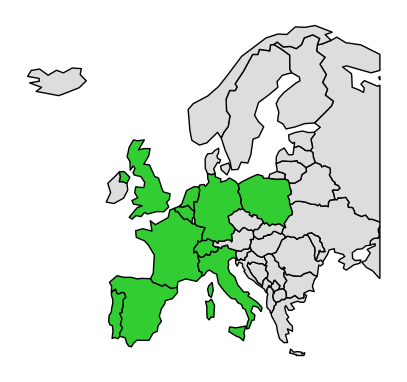

In [84]:
# | label: fig-country-map
# | fig-cap: Map of European countries (in green) the leagues of which are
# |          included in this analysis.

europe_boundaries = Polygon([(-25, 35), (40, 35), (40, 75), (-25, 75)])
map_world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
map_europe = (
    map_world.query("continent=='Europe'")
    .pipe(gpd.clip, europe_boundaries)
    .assign(included_countries=lambda x: x.name.isin(leagues.country))
)
cmap = LinearSegmentedColormap.from_list("", ["#DDD", "limegreen"])
ax = map_europe.plot(
    edgecolor="black", column="included_countries", cmap=cmap, figsize=(5, 5)
)
ax.set_axis_off();

In [85]:
# | label: tbl-country-and-league
# | tbl-cap: Football leagues in each country.

(
    leagues.drop(columns="league_id")
    .rename(columns=str.capitalize)
    .index_start_at(1)
    .style
)

## Comparing Leagues and Seasons


> 1. **Which leagues score the most and the fewest goals?**
> 2. **Are there any goal-scoring patterns between seasons?**

Main points of this section:

1. Leagues differ in number of matches per season: 
    - **Fewest** games are played in **Switzerland** (**180 matches** per season);
    - **Most** games are played in **Italy**, **France**, **England**, and **Spain** (**380 matches** per season).
2. As some matches are missing from the datasets and leagues are of different size, it is more correct to **compare** leagues by the **goals per match** than by total goals scored.
3. Leagues differ by resultativeness:
    -   ***Most* scoring** league is in the **Netherlands** (**3.08** goals per match) and it does not differ significantly from leagues in **Switzerland**, and **Germany**.
    - ***Least* scoring** league is in **Poland** (**2.42** goals per match) and it does not differ significantly from **France**, **Portugal**, **Italy**, and **Scotland**.
4. By comparing seasons, no significant patterns (differences) were found.

Find the details in the following subsections.

### Both (Leagues and Seasons)

First, slices of each league and season were analyzed (@tbl-goals-per-match).
The result revealed that, e.g., in Belgium Jupiler League 2013/2014, some games are clearly missing:
[Wikipedia article](https://en.wikipedia.org/wiki/2013%E2%80%9314_Belgian_Pro_League) indicates that 299 matches were played and @tbl-goals-per-match shows only 12. Looking at Wikipedia pages of some other seasons and leagues, it is clear that in some cases all games are included in the dataset, but in other cases some games are missing.
So it is not correct to compare total matches and total goals per league. Average number of goals per match is a more appropriate measure.

In [86]:
# | label: tbl-goals-per-match
# | tbl-cap: Goal statistics for each league and season.

(
    goals_summary.style.format(
        {"n_goals_per_match": "{:.2f}", "n_goals_total": "{0:,.0f}"}
    ).bar(cmap="RdYlGn", height=80, width=50)
)

### Leagues

This subsection concentrates more on **leagues**. 
It compares leagues by size, i.e., number of games per season (@fig-league-n-matches) and by resultativeness, i.e., average number of goals per match (@fig-league-performance). 
Numeric summaries are displayed in @tbl-league-performance.

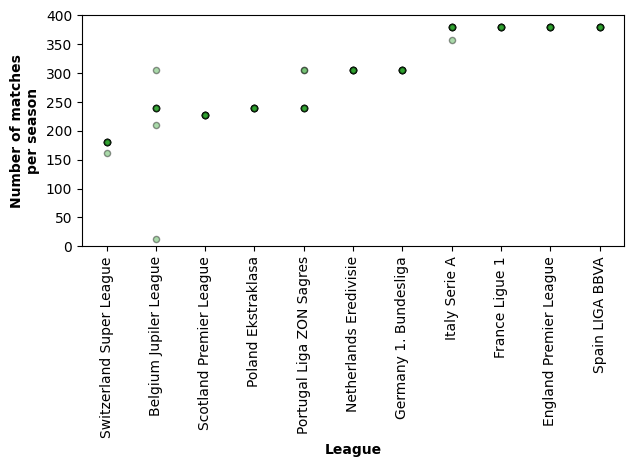

In [87]:
# | label: fig-league-n-matches
# | fig-cap: "Number of matches per season in each league.
# |          Darker points indicate that more leagues had this number of matches
# |          per season.
# |          Transparent points indicate that there are some variation in number
# |          of games: possibly some missing data or natural changes in leagues'
# |          rules."
ax = (
    goals_summary.reset_index()
    .assign(tmp=lambda x: x.groupby("league").n_matches_total.transform("mean"))
    .sort_values("tmp", ascending=True)
    .plot.scatter(
        x="league", y="n_matches_total", c=green, alpha=0.4, edgecolor="black"
    )
)
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel("League")
ax.set_ylabel("Number of matches\nper season")
ax.set_ylim([0, 400]);

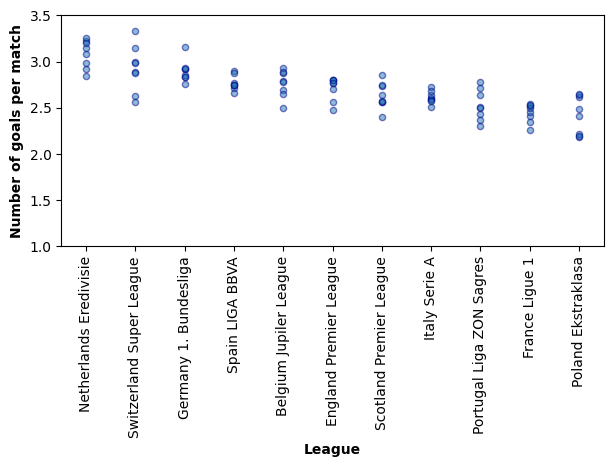

In [88]:
# | label: fig-league-performance
# | fig-cap: Average performance (number of goals per match) in each league.
# |          A point represents a mean of each season.
ax = goals_summary.reset_index().plot.scatter(
    x="league", y="n_goals_per_match", c=blue, alpha=0.5, edgecolor="darkblue"
)

ax.tick_params(axis="x", rotation=90)
ax.set_xlabel("League")
ax.set_ylabel("Number of goals per match")
ax.set_ylim([1, 3.5]);

In [89]:
res_goals_by_league = an.AnalyzeNumericGroups(
    goals_summary.reset_index(), y="n_goals_per_match", by="league"
).fit()

res_goals_by_league.display()

In [90]:
# | label: tbl-league-performance
# | tbl-cap: "Statistics of performance in each league and season: summaries
# |          for each league. Yellow cells indicate maximum and pale-red ones
# |          indicate minimum values in column."
(
    goals_summary.groupby("league")
    .agg(["mean", "std"])
    .style.format(precision=1)
    .format("{:.2f}", subset=["n_goals_per_match"])
    .highlight_max(color="#FFFF77", subset="n_goals_per_match")
    .highlight_min(color="#FFBBBB", subset="n_goals_per_match")
)

### Seasons

This subsection concentrates more on **seasons**. 
It compares seasons by size, i.e., number of games per league (@fig-season-n-matches) and by resultativeness, i.e., average number of goals per match (@fig-season-performance). 
Numerical summaries are displayed in @tbl-season-performance.

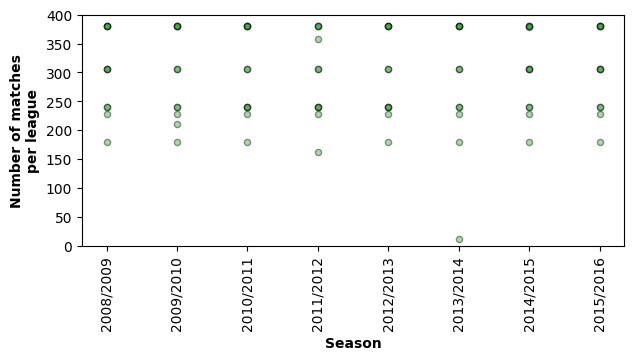

In [91]:
# | label: fig-season-n-matches
# | fig-cap: Number of matches per league in each season.
# |          Darker points indicate that more seasons had this number of matches
# |          per league.
ax = goals_summary.reset_index().plot.scatter(
    x="season", y="n_matches_total", alpha=0.4, c=green, edgecolor="black"
)
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel("Season")
ax.set_ylabel("Number of matches\nper league")
ax.set_ylim([0, 400]);

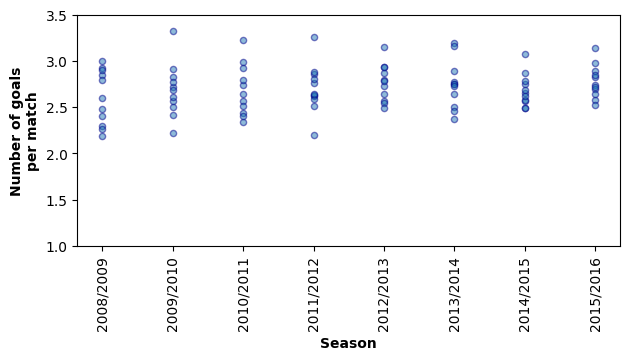

In [92]:
# | label: fig-season-performance
# | fig-cap: Average performance (number of goals per match) in each season.
# |          A point represents a mean of each league.
ax = goals_summary.reset_index().plot.scatter(
    x="season", y="n_goals_per_match", c=blue, alpha=0.5, edgecolor="darkblue"
)
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel("Season")
ax.set_ylabel("Number of goals\nper match")
ax.set_ylim([1, 3.5]);

In [93]:
res_goals_by_season = an.AnalyzeNumericGroups(
    goals_summary.reset_index(), y="n_goals_per_match", by="season"
).fit()

res_goals_by_season.display()

In [94]:
# | label: tbl-season-performance
# | tbl-cap: "Statistics of performance in each league and season: summaries
# |           for each season. Yellow cells indicate maximum and pale red ones
# |           indicate minimum values in column."
(
    goals_summary.groupby("season")
    .agg(["mean", "std"])
    .style.format(precision=1)
    .format("{:.2f}", subset=["n_goals_per_match"])
    .highlight_max(color="#FFFF77", subset="n_goals_per_match")
    .highlight_min(color="#FFBBBB", subset="n_goals_per_match")
)

## Top Teams


> 1. **Which teams shows the best performance?**
> 2. **How do best and worst teams differ in resultativeness?**
> 3. **How many matches do the best teams win and loose?**


- The analysis of teams included data from **7 seasons**.

- To evaluate team's performance, it was decided to count in how many seasons the team appeared between the Top 5 scoring teams (in terms of ***goals per match*** in that season).
@tbl-top5-5-by-goals shows that 12 teams appears in that list and **Real Madrid CF** (7 times in 7 seasons), **FC Barcelona** (6 times), and **PSV** (5 times) are the 3 leaders.
Comparing best and worst teams, they performance differ by about 2 goals per match (@fig-top-bottom-by-goals, @tbl-top-bottom-by-goals-summary).

- Comparing teams that had highest ***percentage of won matches*** per season, most frequently **SL Benfica** (5 times in 7 seasons), **FC Barcelona** (5 times), **Real Madrid CF** (4 times), **Celtic** (4 times) were between Top 5 (@tbl-top5-5-by-wins-summary).

- To get among Top 5 winners, in some cases, it was sufficient to win as little as 73.7 % of matches but to loose no more than 15.8 % of matches (@tbl-top5-5-by-wins-summary).

See the details below.

In [95]:
print(f"Seasons in this analysis: {teams_top_bottom_goals.season.nunique()}")

Seasons in this analysis: 7


In [96]:
# | label: tbl-top5-5-by-goals
# | tbl-cap: Number of seasons a teams was among Top 5 by number of
# |          **goals per match**.

(
    teams_top_bottom_goals.query("which == 'Top 5'")
    .team_name.value_counts()
    .to_df("Number of seasons (out of 7)", "Team")
    .index_start_at(1)
    .style
)

Compare the performance of Top 5 and Bottom 5 teams:

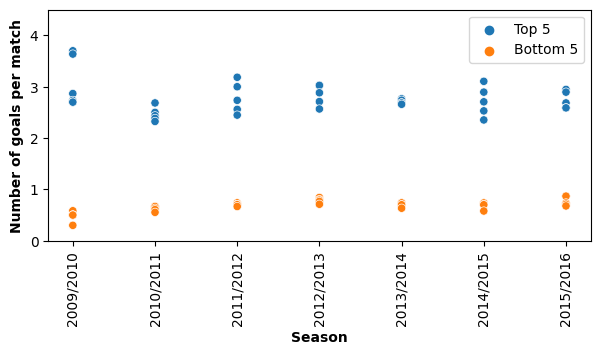

In [97]:
# | label: fig-top-bottom-by-goals
# | fig-cap: "Comparison of Top 5 and Bottom 5 teams by number of goals
# |          per match."

ax = sns.scatterplot(
    teams_top_bottom_goals,
    x="season",
    y="n_goals_per_match",
    hue="which",
)

ax.tick_params(axis="x", rotation=90)
ax.set_xlabel("Season")
ax.set_ylabel("Number of goals per match")
ax.set_ylim([0, 4.5])
ax.get_legend().set_title(None)

In [98]:
# | label: tbl-top-bottom-by-goals-summary
# | tbl-cap: "Summaries of Top 5 and Bottom 5 teams by number of
# |           **goals per match** in all 7 seasons."

teams_top_bottom_goals_summary = (
    teams_top_bottom_goals.groupby(["which"])
    .n_goals_per_match.agg(["min", "mean", "std", "max"])
    .sort_index(ascending=False)
    .reset_index()
)

teams_top_bottom_goals_summary.columns = pd.MultiIndex.from_tuples(
    [
        ("", "Group of teams"),
        ("Goals per match", "Min"),
        ("Goals per match", "Mean"),
        ("Goals per match", "SD"),
        ("Goals per match", "Max"),
    ]
)

teams_top_bottom_goals_summary.style.format(precision=2).hide(axis="index")

In [99]:
# | label: tbl-top5-5-by-wins-summary
# | tbl-cap: Number of seasons a team was among Top 5 by
# |          percentage of **won matches**.

(
    teams_wins_per_season.reset_index()
    .Team.value_counts()
    .to_df("Number of seasons (out of 7)", "Team")
    .index_start_at(1)
    .style
)

In [100]:
# | label: tbl-top5-5-by-wins
# | tbl-cap: Top 5 teams by percentage of **won matches** in each season.
# |          Highest values in each column are in yellow and lowest ones are
# |          in pale red.

variables = ["Lost", "Draw", "Won"]

(
    teams_wins_per_season.style.format("{:.1f} %", subset=variables)
    .highlight_max(subset=variables, color="#FFFF77")
    .highlight_min(subset=variables, color="#FFBBBB")
)

## Players in 2015/2016 {#sec-top-players}

This subsection deals with the analysis of football players in the most recent available season.
It contains a link to the dashboard (a technical requirement of this project) too.

## Analysis of Players {#sec-players-analysis}


> 1. **Which players are the best ones?**
> 2. **Which player attributes are related to being a good player?**
> 3. **How various player attributes relate to each other?**


- This analysis included players from **season 2015/2016** (information of players announced after 2015-07-01, if several records are present, the most recent one is used).

- Among 7057 included players, **Top 5 players** by the overall rating were:
**Lionel Messi**, **Cristiano Ronaldo**, **Neymar**, **Manuel Neuer**, and **Luis Suarez** (@tbl-top-players).
Player reactions (r=0.81) and potential (r=0.80) were the attributes most strongly correlated to overall rating (@tbl-correlation-to-overall-rating).

- Correlation and hierarchical cluster analysis revealed that there are at least 2 groups of related player attributes: one of the major clusters seems to be associated to goal-keeping-related features and bigger values of physiological properties like body mass (variable "`weight_kg`") and height are positive related to better goal keeping characteristics (@fig-corr-players-attr).
The other cluster has several sub-clusters which might also be related to different roles of players but this idea should be investigated in more detail.


Find the details below in this sub-section.

In [101]:
player_info_2015_2016 = players.query("player_info_date >= '2015-07-01'")
n_players_last_season = player_info_2015_2016.player_id.nunique()
print(f"Number of players included: {n_players_last_season}")

Number of players included: 7057


In [102]:
# | label: tbl-top-players
# | tbl-cap: "Top players in season 2015/2016:players with overall rating
# |          over 90."

players_2015_2016 = (
    player_info_2015_2016.assign(
        rank=lambda x: (
            x.groupby("player_id").player_info_date.rank(
                method="first", ascending=False
            )
        )
    )
    .query("rank == 1")
    .drop(columns=["rank"])
    .sort_values("overall_rating", ascending=False)
)

players_2015_2016.query("overall_rating >= 90")

player_id player_info_date        player_name   birthday  birth_year  \
102482      30981       2015-12-17       Lionel Messi 1987-06-24        1987   
33330       30893       2015-10-16  Cristiano Ronaldo 1985-02-05        1985   
131464      19533       2016-02-04             Neymar 1992-02-05        1992   
109033      27299       2016-04-21       Manuel Neuer 1986-03-27        1986   
105983      40636       2015-10-16        Luis Suarez 1987-01-24        1987   

        height  weight_kg   bmi  overall_rating  potential preferred_foot  \
102482  170.18      72.11 24.90           94.00      94.00           left   
33330   185.42      79.82 23.22           93.00      93.00          right   
131464  175.26      68.03 22.15           90.00      94.00          right   
109033  193.04      92.06 24.71           90.00      90.00          right   
105983  182.88      84.81 25.36           90.00      90.00          right   

       attacking_work_rate defensive_work_rate  crossing  finishing  \
102482              medium                 low     80.00      93.00   
33330                 high                 low     82.00      95.00   
131464                high              medium     72.00      88.00   
109033              medium              medium     15.00      13.00   
105983                high              medium     77.00      90.00   

        heading_accuracy  short_passing  volleys  dribbling  curve  \
102482             71.00          88.00    85.00      96.00  89.00   
33330              86.00          81.00    87.00      93.00  88.00   
131464             62.00          78.00    83.00      94.00  78.00   
109033             25.00          48.00    11.00      16.00  14.00   
105983             77.00          82.00    87.00      88.00  86.00   

        free_kick_accuracy  long_passing  ball_control  acceleration  \
102482               90.00         79.00         96.00         95.00   
33330                77.00         72.00         91.00         91.00   
131464               79.00         74.00         93.00         91.00   
109033               11.00         47.00         31.00         58.00   
105983               84.00         64.00         91.00         88.00   

        sprint_speed  agility  reactions  balance  shot_power  jumping  \
102482         90.00    92.00      92.00    95.00       80.00    68.00   
33330          93.00    90.00      92.00    62.00       94.00    94.00   
131464         90.00    92.00      86.00    84.00       78.00    61.00   
109033         61.00    43.00      87.00    35.00       25.00    78.00   
105983         78.00    86.00      91.00    60.00       88.00    69.00   

        stamina  strength  long_shots  aggression  interceptions  positioning  \
102482    75.00     59.00       88.00       48.00          22.00        90.00   
33330     90.00     79.00       93.00       62.00          29.00        93.00   
131464    79.00     45.00       73.00       56.00          36.00        89.00   
109033    44.00     83.00       16.00       29.00          30.00        12.00   
105983    88.00     76.00       85.00       78.00          41.00        91.00   

        vision  penalties  marking  standing_tackle  sliding_tackle  \
102482   90.00      74.00    13.00            23.00           21.00   
33330    81.00      85.00    22.00            31.00           23.00   
131464   79.00      81.00    21.00            24.00           33.00   
109033   70.00      37.00    10.00            10.00           11.00   
105983   84.00      85.00    30.00            45.00           38.00   

        gk_diving  gk_handling  gk_kicking  gk_positioning  gk_reflexes  
102482       6.00        11.00       15.00           14.00         8.00  
33330        7.00        11.00       15.00           14.00        11.00  
131464       9.00         9.00       15.00           15.00        11.00  
109033      85.00        87.00       91.00           90.00        87.00  
105983      27.00        25.00       31.00           3

In [103]:
# | label: tbl-bottom-players
# | tbl-cap: "Players with overall rating below 50 in season 2015/2016."
players_2015_2016.query("overall_rating < 50")

player_id player_info_date    player_name   birthday  birth_year  \
98716      215085       2015-07-10  Kyrylo Petrov 1990-06-22        1990   
76938      696435       2016-04-14     Jan Bamert 1998-03-09        1998   
101928     674221       2016-02-04  Liam Grimshaw 1995-02-02        1995   
157494     659742       2016-05-12  Sandro Lauper 1996-10-25        1996   
172        528212       2016-02-25   Aaron Lennox 1993-02-19        1993   
151371     614951       2016-03-03    Robin Huser 1998-01-24        1998   

        height  weight_kg   bmi  overall_rating  potential preferred_foot  \
98716   182.88      76.19 22.78           49.00      55.00          right   
76938   180.34      69.84 21.47           48.00      67.00          right   
101928  177.80      74.83 23.67           48.00      60.00          right   
157494  185.42      69.84 20.31           48.00      64.00          right   
172     190.50      82.09 22.62           48.00      56.00          right   
151371  180.34      69.84 21.47           47.00      63.00          right   

       attacking_work_rate defensive_work_rate  crossing  finishing  \
98716               medium              medium     30.00      22.00   
76938               medium              medium     38.00      23.00   
101928              medium                high     33.00      32.00   
157494              medium              medium     47.00      45.00   
172                 medium              medium     12.00      15.00   
151371              medium              medium     34.00      27.00   

        heading_accuracy  short_passing  volleys  dribbling  curve  \
98716              63.00          40.00    28.00      28.00  30.00   
76938              40.00          26.00    31.00      59.00  30.00   
101928             42.00          55.00    27.00      41.00  33.00   
157494             39.00          52.00    47.00      59.00  44.00   
172                16.00          23.00    14.00      15.00  14.00   
151371             44.00          53.00    35.00      47.00  44.00   

        free_kick_accuracy  long_passing  ball_control  acceleration  \
98716                30.00         26.00         51.00         60.00   
76938                30.00         22.00         31.00         66.00   
101928               37.00         42.00         49.00         68.00   
157494               38.00         47.00         53.00         65.00   
172                  18.00         18.00         22.00         15.00   
151371               35.00         47.00         41.00         65.00   

        sprint_speed  agility  reactions  balance  shot_power  jumping  \
98716          55.00    43.00      51.00    59.00       37.00    72.00   
76938          59.00    53.00      47.00    61.00       30.00    59.00   
101928         67.00    58.00      54.00    65.00       52.00    63.00   
157494         67.00    57.00      42.00    61.00       55.00    45.00   
172            26.00    31.00      45.00    24.00       26.00    38.00   
151371         66.00    67.00      52.00    75.00       57.00    64.00   

        stamina  strength  long_shots  aggression  interceptions  positioning  \
98716     58.00     66.00       26.00       60.00          54.00        27.00   
76938     56.00     50.00       24.00       55.00          48.00        37.00   
101928    64.00     59.00       33.00       67.00          48.00        34.00   
157494    53.00     50.00       42.00       33.00          35.00        49.00   
172       18.00     44.00       12.00       21.00          19.00        14.00   
151371    48.00     47.00       29.00       51.00          47.00        39.00   

        vision  penalties  marking  standing_tackle  sliding_tackle  \
98716    29.00      37.00    55.00            62.00           64.00   
76938    34.00      39.00    46.00            57.00           52.00   
101928   48.00      44.00    45.00            54.00           49.00   
157494   45.00      54.00    22.00            36.00           25.00   

In [104]:
# | label: tbl-correlation-to-overall-rating
# | tbl-cap: "Correlation to overall rating."

cor_data_players = [
    (i, round(players_2015_2016.overall_rating.corr(players_2015_2016[i]), 3))
    for i in (
        players_2015_2016.select_dtypes("number").drop(
            columns=["player_id", "overall_rating"]
        )
    )
]

(
    pd.DataFrame(cor_data_players, columns=["variable", "r"])
    .sort_values("r", ascending=False)
    .index_start_at(1)
    .style.format({"r": "{:.2f}"})
    .bar(vmin=-1, vmax=1, cmap="BrBG", subset=["r"])
)

::: {.callout-note}

Heatmaps and clustered heatmaps in this project are very big as they contain many variables.
I tried smaller plot size, but then every second variable name got hidden.

:::

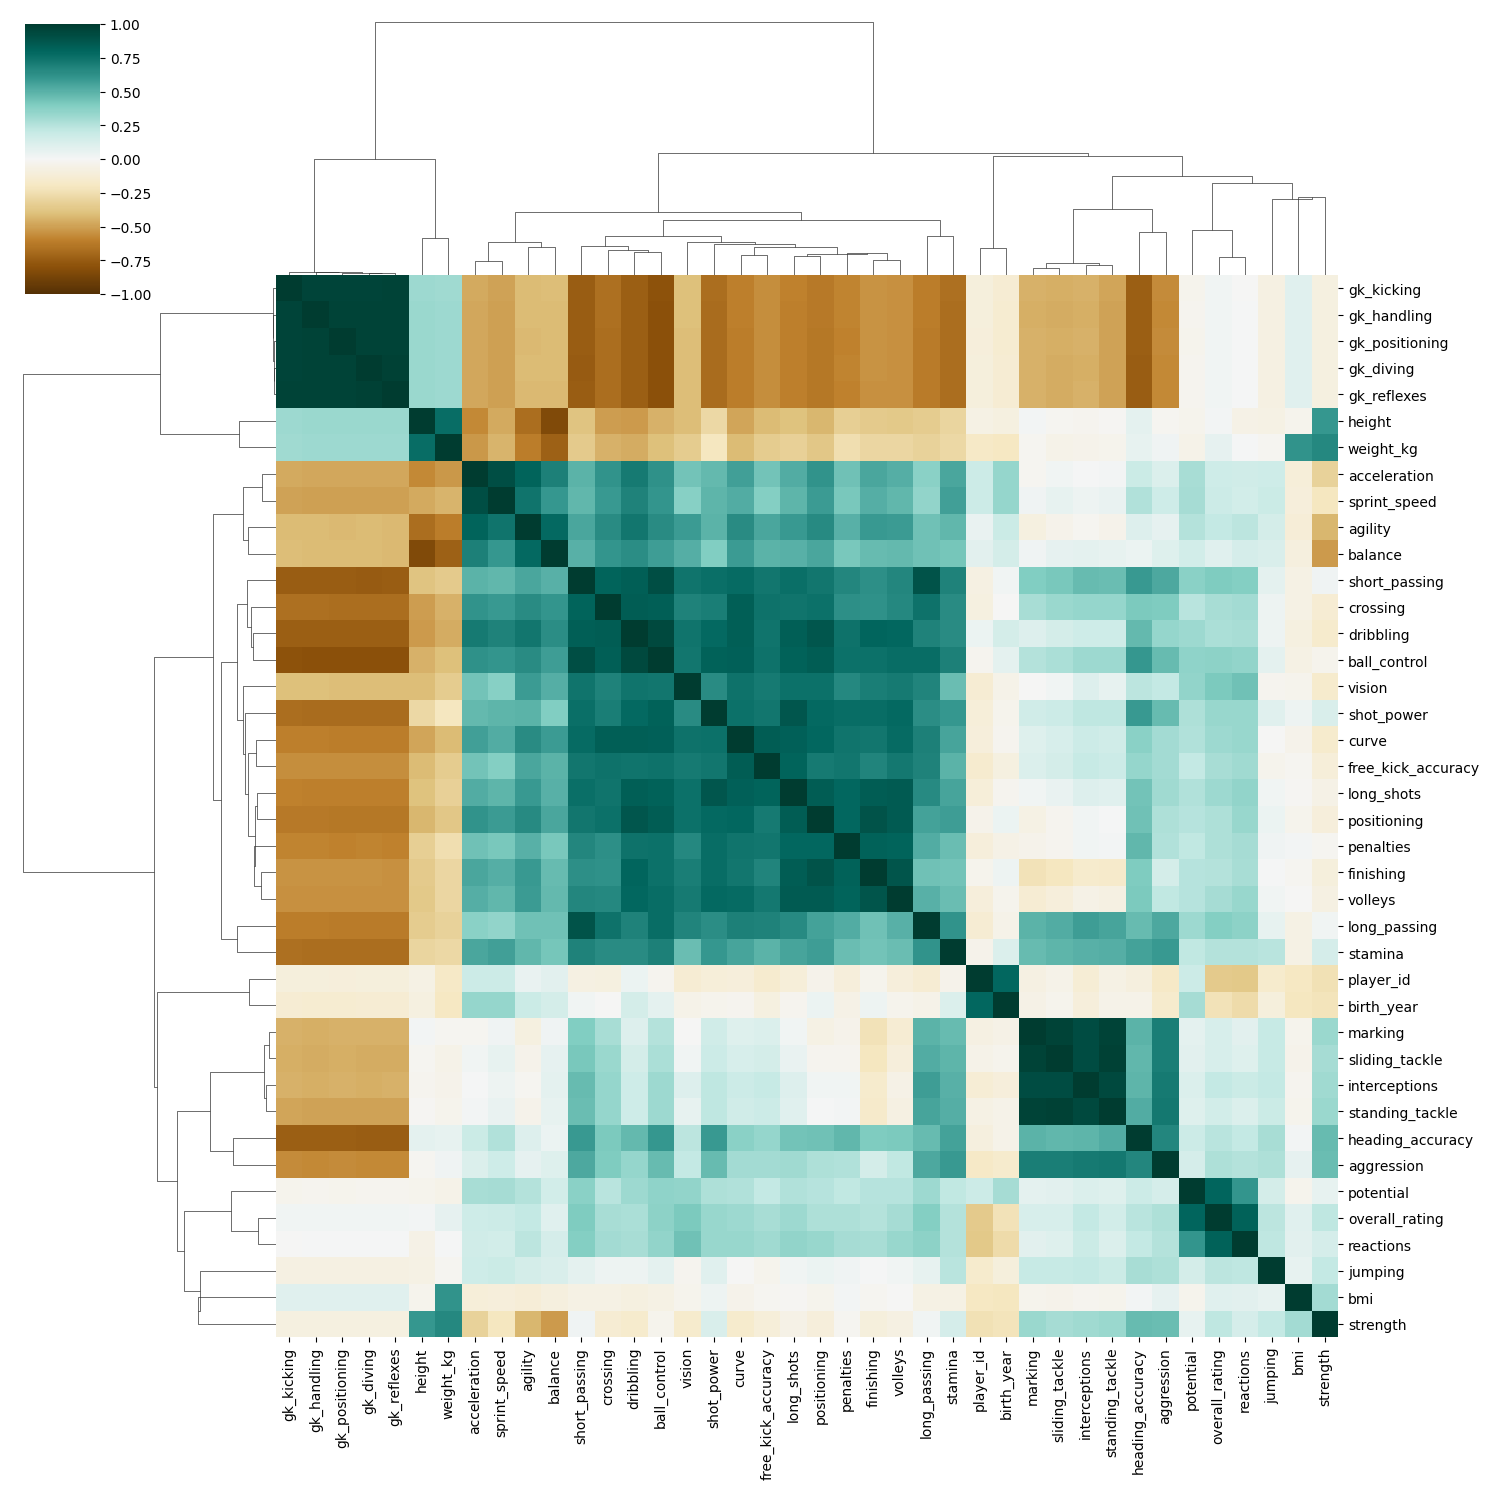

In [105]:
# | label: fig-corr-players-attr
# | fig-cap: "Clustered heatmap of correlation coefficients between
# |          player attributes."
sns.clustermap(
    players_2015_2016.corr(numeric_only=True),
    vmin=-1,
    vmax=1,
    annot=False,
    cmap="BrBG",
    method="centroid",
    figsize=(15, 15),
);

### Dashboard



Some additional exploration of football players is available via [this](https://lookerstudio.google.com/reporting/d2170881-8017-4c10-87ba-491e3cef788d/page/tq1ID) Looker Studio dashboard (preview in @fig-dashboard). Only players with no missing data in their attributes are included in the dashboard.

![Print screen of the Looker Studio dashboard ([link](https://lookerstudio.google.com/reporting/d2170881-8017-4c10-87ba-491e3cef788d/page/tq1ID)).](img/dashboard-football.png){#fig-dashboard}

## Home Advantage: Is It Real?


> 1. **Is there such a thing as home advantage?**
> 2. **If yes, can we quantify it?**


The analysis of **25,979 matches** revealed, that:

- Teams that play **at home wins 45.9%** (CI 45.1%–46.6%) matches compared to **28.7% away winning** and **25.4% draws**. This difference is statistically significant (χ² test, p < 0.001).
- On average, **home** teams score **0.38 goals more** than away teams. 
This shift toward the home advantage is statistically significant (t-test, p < 0.001).
- Comparing **different leagues**, they do **differ** by the degree of home advantage.
E.g., in Spain LIGA BBVA home advantage is as high as 0.50 goals and in Scotland Premier League it is as low as 0.22.
- Comparing different **seasons**, **no** significant **differences** were found.

Find the details below.

In [106]:
# Count of Home wins, Draws and Away wins
counts = matches.match_winner.value_counts(sort=False).rename("matches")
res_counts = an.AnalyzeCounts(counts, "Match outcome").fit()
res_counts.display()

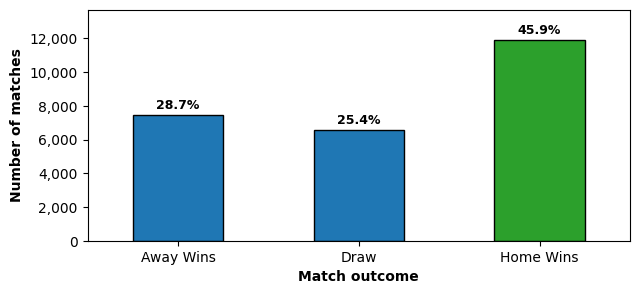

In [107]:
# | label: fig-home-advantage-1
# | fig-cap: Distribution of match outcomes.
# |          The most common outcome is highlighted in green.
res_counts.plot(rot=0, color=[blue, blue, green]);

On average, home teams score 0.38 goals more than away teams. 
This shift toward home advantage is statistically significant 
(t-test, p < 0.001).


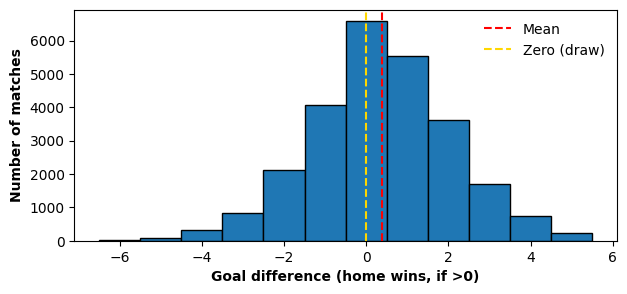

In [108]:
# | label: fig-home-advantage-2
# | fig-cap: Distribution of goal difference in each match.
# |          Negative number when away wins, 0 whet it is draw,
# |          positive number when home wins.

mean_goal_diff = matches.goal_diff.mean()

ax = matches.goal_diff.plot.hist(
    edgecolor="black", label="_nolegend_", bins=np.arange(-6.5, 6.5)
)

ax.set_xlabel("Goal difference (home wins, if >0)")
ax.set_ylabel("Number of matches")

ax.axvline(
    x=mean_goal_diff,
    color="red",
    linestyle="--",
    label="Mean",
    zorder=1,
)

ax.axvline(
    x=0,
    color="gold",
    markeredgecolor="grey",
    linestyle="--",
    label="Zero (draw)",
    linewidth=1.5,
    zorder=2,
)

ax.legend(frameon=False, loc="upper right")

# Print results
(t, p) = sps.ttest_1samp(matches.goal_diff, 0)
print(
    f"On average, home teams score {mean_goal_diff:.2f} goals more than away "
    "teams. \nThis shift toward home advantage is statistically significant \n"
    f"(t-test, {my.format_p(p)})."
)

In [109]:
res_by_league = an.AnalyzeNumericGroups(matches, "goal_diff", by="league").fit()
res_by_league.display()

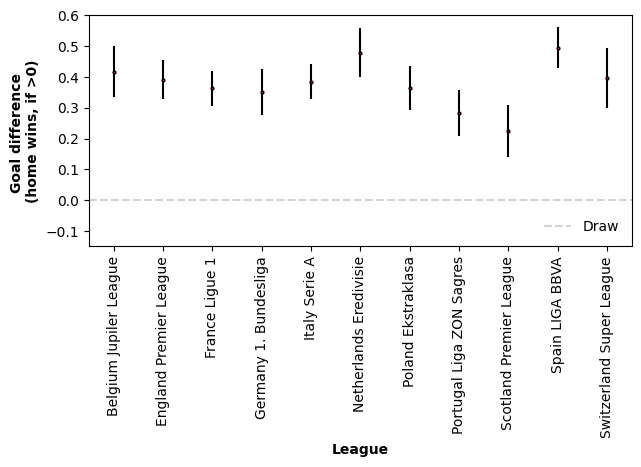

In [110]:
# | label: fig-home-advantage-3
# | fig-cap: Degree of home advantage in different leagues.
# |          Mean goal difference (home minus away) of a match
# |          with 95% confidence interval.

(_, ax) = res_by_league.plot(ylabel="Goal difference \n(home wins, if >0)")
ax.tick_params(axis="x", rotation=90)
ax.axhline(
    y=0,
    color="lightgray",
    linestyle="--",
    label="Draw",
    zorder=1,
)
ax.legend(frameon=False, loc="lower right")
ax.set_ylim([-0.15, 0.6]);

In [111]:
res_by_season = an.AnalyzeNumericGroups(matches, "goal_diff", by="season").fit()

res_by_season.display()

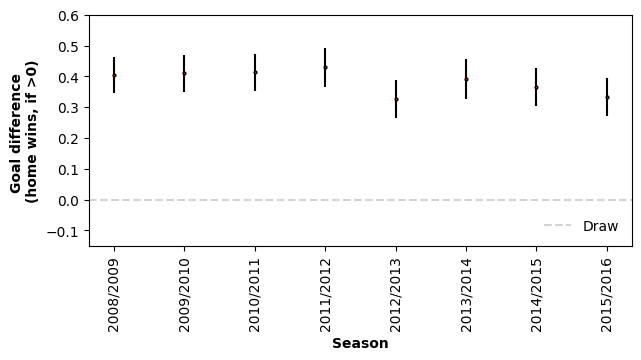

In [112]:
# | label: fig-home-advantage-4
# | fig-cap: Degree of home advantage in different seasons.
# |          Mean goal difference (home minus away) of a match
# |          with 95% confidence interval.

(_, ax) = res_by_season.plot(ylabel="Goal difference \n(home wins, if >0)")
ax.tick_params(axis="x", rotation=90)
ax.axhline(
    y=0,
    color="lightgray",
    linestyle="--",
    label="Draw",
    zorder=1,
)
ax.legend(frameon=False, loc="lower right")
ax.set_ylim([-0.15, 0.6]);

## Relationship Between Betting Odds

> 1. **What is the relationship between betting odds from different websites?**
> 2. **How strongly are betting odds related to match outcomes?**

Odds ratios from different websites as well as ratio and log-ratio of home wins versus away wins betting odds are investigated in this subsection.
The analysis (Figure [-@fig-odds-cor-map]) shows that:

- odds of the **same type** (e.g., "home wins") from different websites are **strongly correlates between each other** (Fig. [-@fig-odds-cor-map]).
- odds of **"draw"** are more strongly related **to "away wins"** and **almost not** correlated **to "home wins"**.
- the **log-ratio of betting odds** shows the **highest correlation** to football match outcome: r=-0.46 in case of `B365` (bet365.com), log ratio of betting odds vs. difference of goals (home goals minus away goals), as shown in @tbl-b365.

See details below.

<details class="with-border">
<summary>EDA: Overview of `matches_betting_odds` table </summary>

In [113]:
skim(matches_betting_odds)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types               Categories                                        │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓ ┏━━━━━━━━━━━━━━━━━━━━━━━┓                                │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃ ┃ Categorical Variables ┃                                │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩ ┡━━━━━━━━━━━━━━━━━━━━━━━┩                                │
│ │ Number of rows    │ 25979  │ │ float64     │ 50    │ │ match_winner          │                                │
│ │ Number of columns │ 57     │ │ int32       │ 6     │ └───────────────────────┘                                │
│ └───────────────────┴────────┘ │ category    │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA      ┃ NA %   ┃ mean    ┃ sd     ┃ p0      ┃ p25    ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ stage                  │       0 │      0 │      18 │     10 │       1 │      9 │     27 │    38 │ █▇▇▇▇▅  │  │
│ │ home_team_goal         │       0 │      0 │     1.5 │    1.3 │       0 │      1 │      2 │    10 │   █▅▁   │  │
│ │ away_team_goal         │       0 │      0 │     1.2 │    1.1 │       0 │      0 │      2 │     9 │   █▂▁   │  │
│ │ goal_sum               │       0 │      0 │     2.7 │    1.7 │       0 │      2 │      4 │    12 │  ▄█▄▁   │  │
│ │ goal_diff              │       0 │      0 │    0.38 │    1.8 │      -9 │     -1 │      1 │    10 │   ▁█▇▁  │  │
│ │ goal_diff_sign         │       0 │      0 │    0.17 │   0.85 │      -1 │     -1 │      1 │     1 │ ▅  ▄ █  │  │
│ │ B365_home_wins         │    3400 │     13 │     2.6 │    1.8 │       1 │    1.7 │    2.8 │    26 │    █    │  │
│ │ BW_home_wins           │    3400 │     13 │     2.6 │    1.6 │       1 │    1.6 │    2.8 │    34 │    █    │  │
│ │ IW_home_wins           │    3500 │     13 │     2.5 │    1.4 │       1 │    1.6 │    2.6 │    20 │   █▁    │  │
│ │ LB_home_wins           │    3400 │     13 │     2.5 │    1.6 │       1 │    1.7 │    2.7 │    26 │    █    │  │
│ │ PS_home_wins           │   15000 │     57 │     2.8 │    2.2 │       1 │    1.7 │      3 │    36 │    █    │  │
│ │ WH_home_wins           │    3400 │     13 │     2.6 │    1.7 │       1 │    1.7 │    2.8 │    26 │    █    │  │
│ │ SJ_home_wins           │    8900 │     34 │     2.6 │    1.7 │       1 │    1.7 │    2.8 │    23 │   █▁    │  │
│ │ VC_home_wins           │    3400 │     13 │     2.7 │    1.9 │       1 │    1.7 │    2.8 │    36 │    █    │  │
│ │ GB_home_wins           │   12000 │     45 │     2.5 │    1.5 │     1.1 │    1.7 │    2.6 │    21 │   █▁    │  │
│ │ BS_home_wins           │   12000 │     45 │     2.5 │    1.5 │       1 │    1.7 │    2.6 │    17 │   █▁    │  │
│ │ B365_draw              │    3400 │     13 │     3.8 │    1.1 │     1.4 │    3.3 │      4 │    17 │   █▂    │  │
│ │ BW_draw                │    3400 │     13 │     3.7 │      1 │     1.6 │    3.2 │    3.8 │    20 │   █▁    │  │
│ │ IW_draw                │    3500 │     13 │     3.6 │    0.8 │     1.5 │    3.2 │    3.7 │    11 │   ▁█▁   │  │
│ │ LB_draw                │    3400 │     13 │     3.7 │      1 │     1.4 │    3.2 │    3.8 │    19 │   █▁    │  │
│ │ PS_draw                │   15000 │     57 │     4.1 │    1.5 │     2.2 │    3.4 │    4.2 │    29 │    █    │  │
│ │ WH_draw                │    3400 │     13 │     3.7 

</details>

<details class="with-border">
<summary>EDA: Missing Value Plots of `matches_betting_odds` table </summary>

It seems that missing value structure is **characteristic for each betting website** as betting odds variables of each betting website are clustered together by their missing value structure.

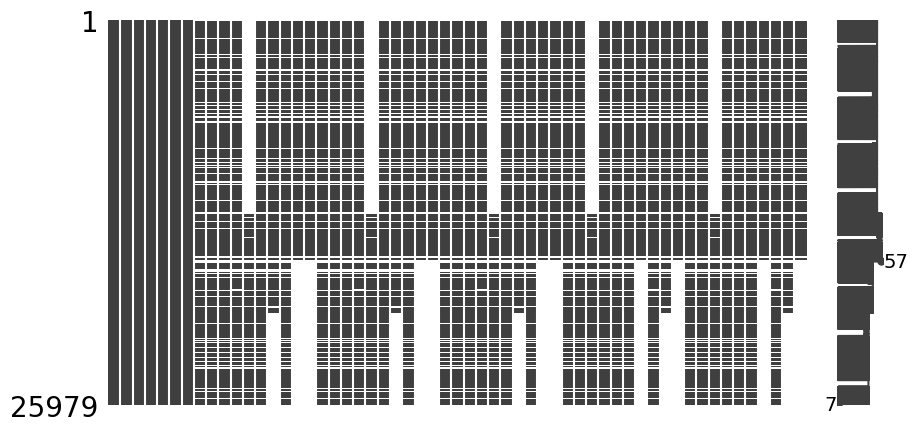

In [114]:
msno.matrix(matches_betting_odds, figsize=(10, 5));

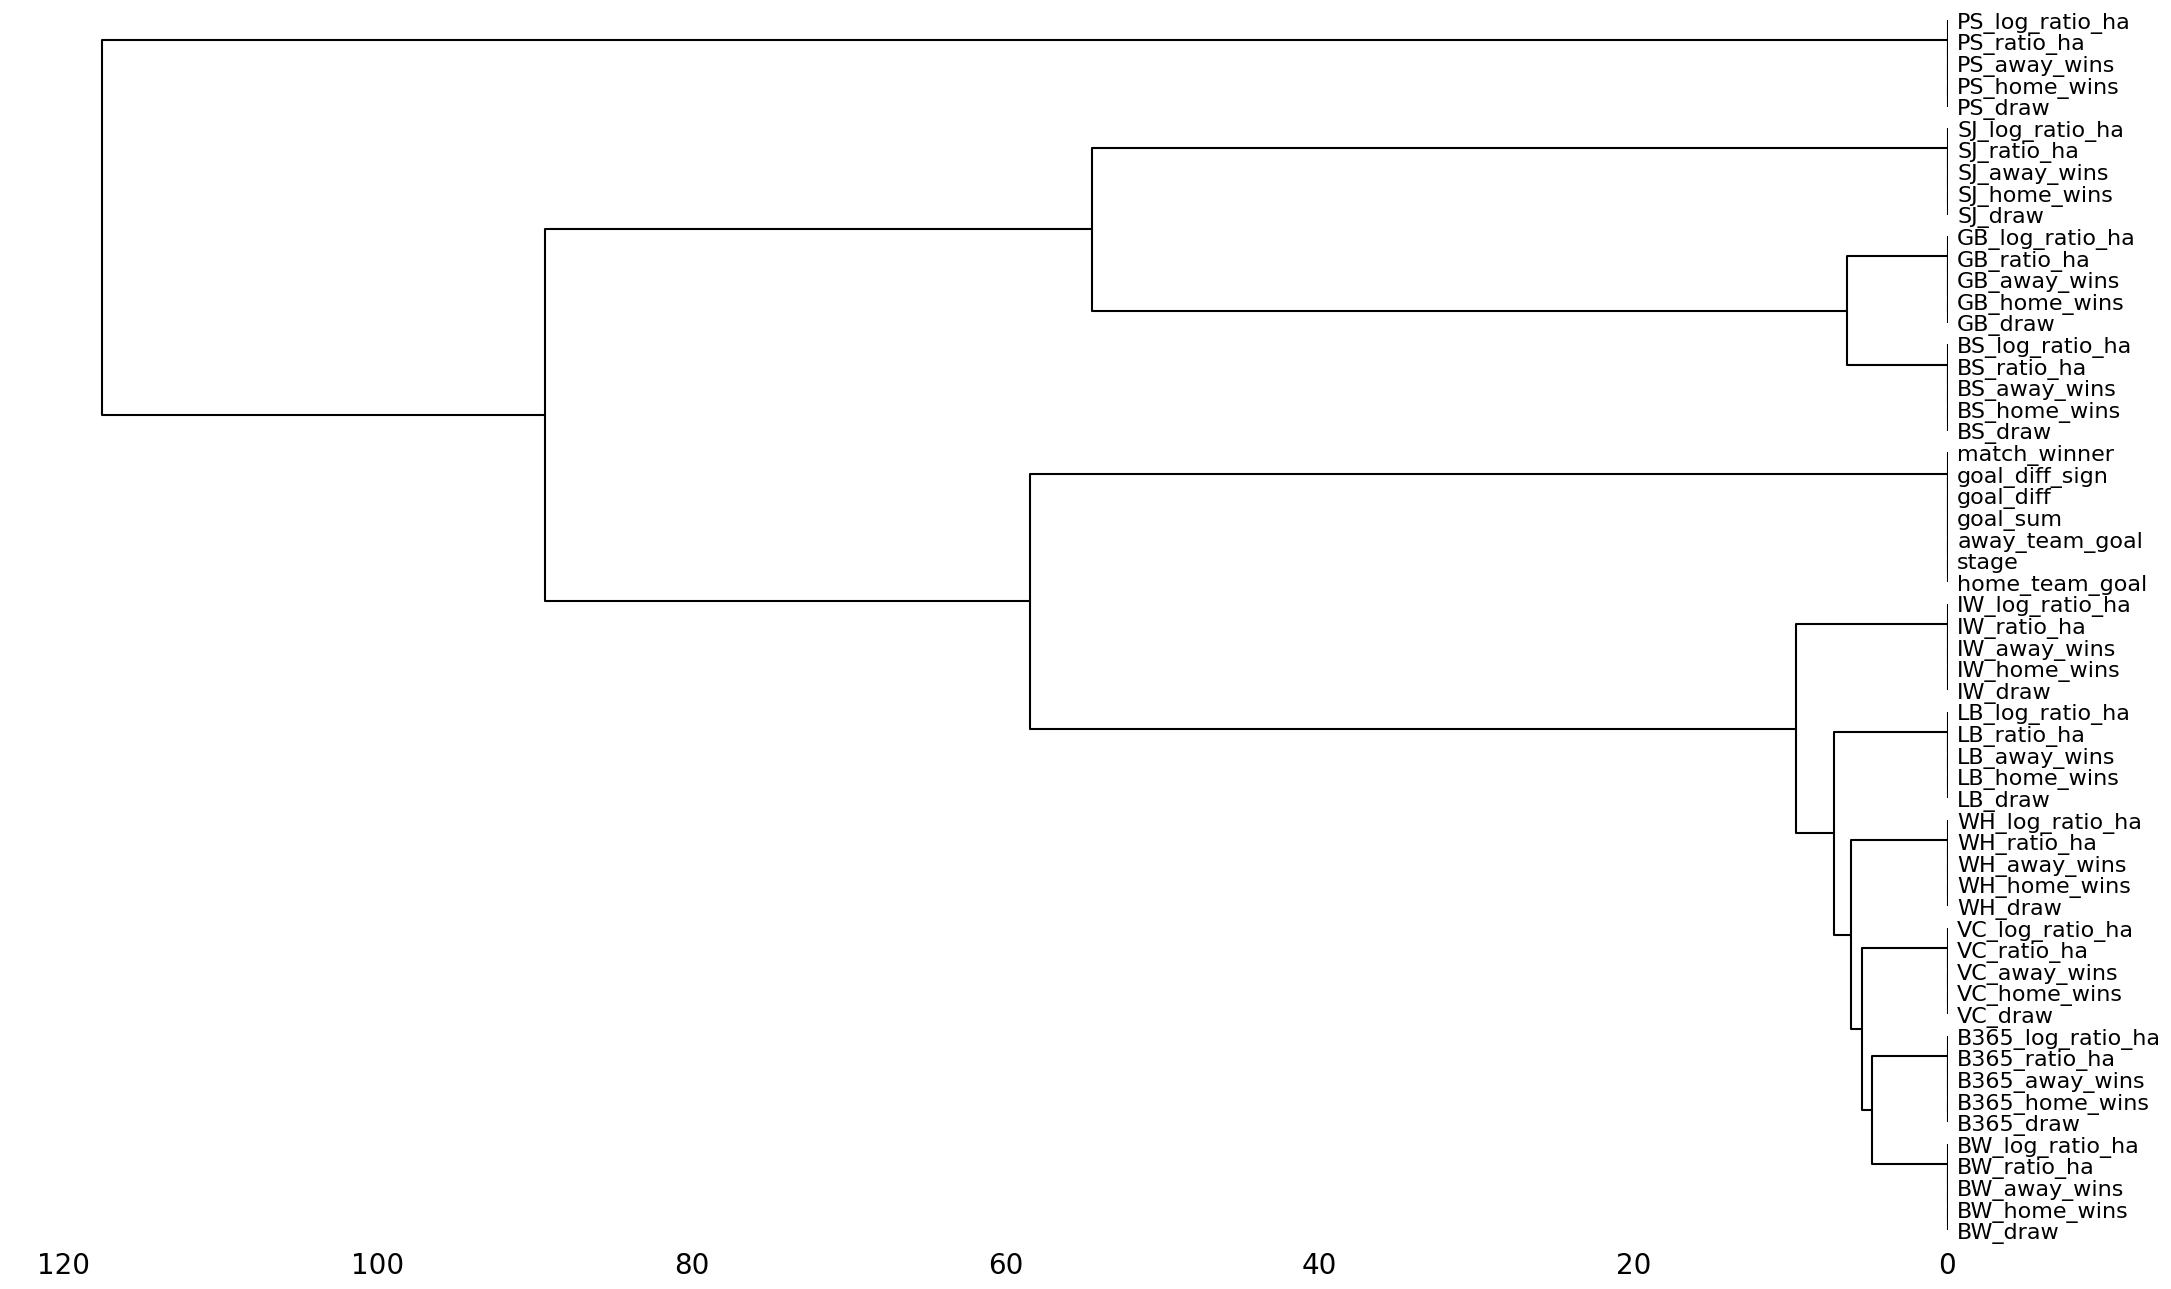

In [115]:
msno.dendrogram(matches_betting_odds);

</details>

<details class="with-border">
<summary> EDA: Data Profiling Report of `matches_betting_odds` </summary>

In [116]:
matches_betting_odds.shape

(25979, 57)

In [117]:
if do_eda:
    profile_match_odds = eda.ProfileReport(
        matches_betting_odds,
        title="Data Profiling Report: matches_betting_odds",
        config_file="_config/ydata_profile_config--mini.yaml",
    )

    profile_match_odds

</details>

::: {.callout-note}

Heatmaps and clustered heatmaps in this project are very big as they contain many variables.
I tried smaller plot size, but then every second variable name got hidden.

:::

In [118]:
cor_betting = matches_betting_odds.select_dtypes("number").corr()

There are 5 types of variables related to betting odds (odds for home and away wins, draw, ratio and log ratio of home versus away wins).These types of odds are highly correlated in each category (see plot [-@fig-odds-cor-map]).

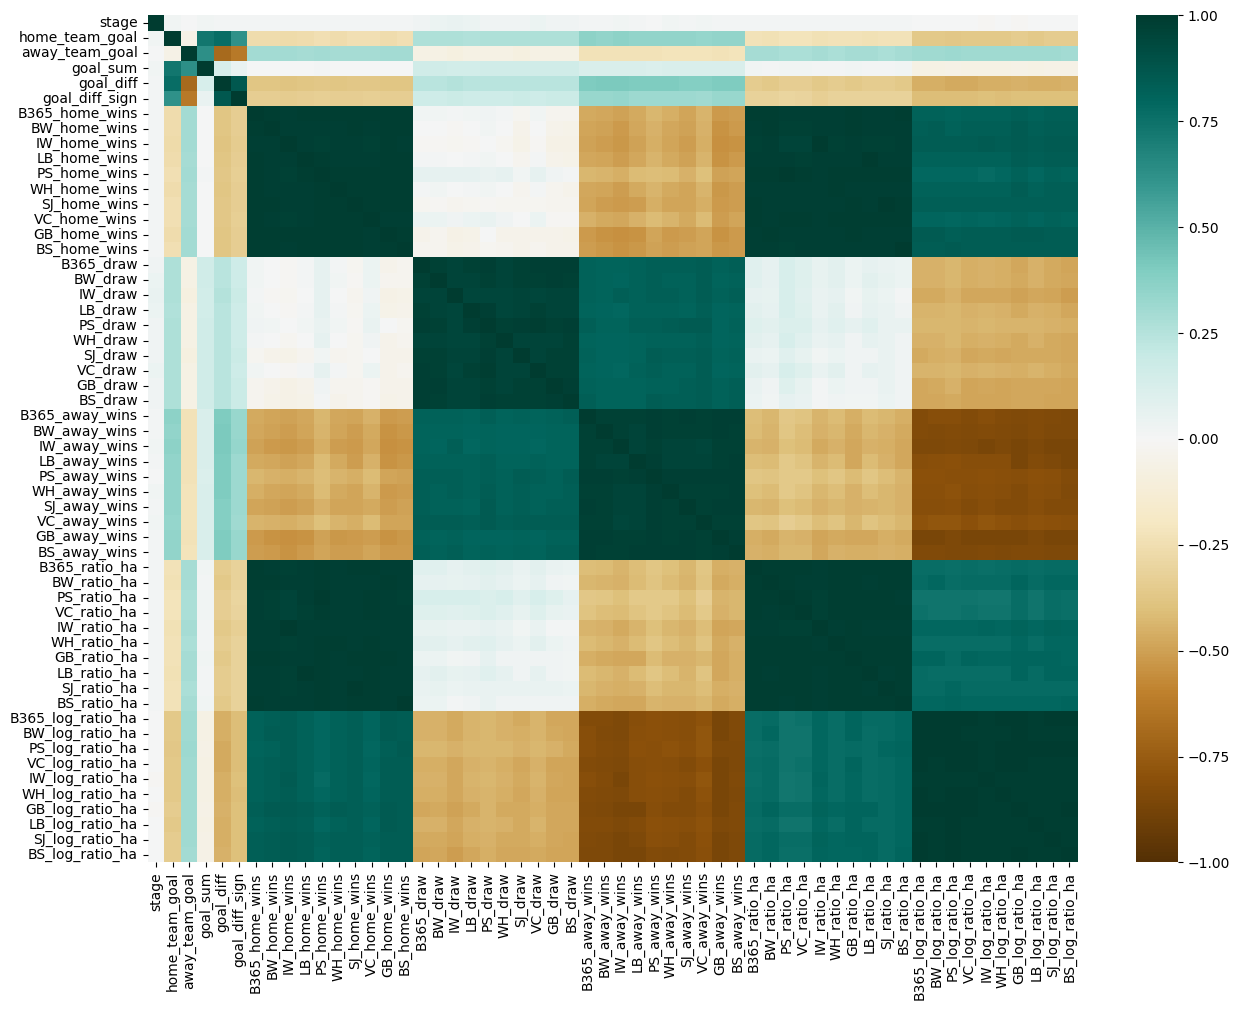

In [119]:
# | label: fig-odds-cor-map
# | fig-cap: Heatmap of Pearson's correlation coefficients between
# |          betting odds, goal statistics, and some other variables.

plt.figure(figsize=(15, 11))
mask = np.triu(np.ones_like(cor_betting, dtype=np.bool_))
sns.heatmap(cor_betting.round(2), vmin=-1, vmax=1, annot=False, cmap="BrBG");

In [120]:
# | label: tbl-b365
# | tbl-cap: "Correlation between betting odds from `B365` (bet365.com)
# |           website. `ratio_ha` is betting odds ratio for home and
# |           away teams."


def name_replace(x):
    return x.replace("B365_", "B365 ")


def name_replace(x):
    return x.replace("B365_", "B365 ")


new_names = {"goal_diff": "Match goal difference (home–away)"}

(
    matches_betting_odds.filter(regex="B365_|diff$")
    .corr()
    .rename(columns=new_names, index=new_names)
    .rename(columns=name_replace, index=name_replace)
)

Match goal difference (home–away)  \
Match goal difference (home–away)                               1.00   
B365 home_wins                                                 -0.38   
B365 draw                                                       0.24   
B365 away_wins                                                  0.40   
B365 ratio_ha                                                  -0.35   
B365 log_ratio_ha                                              -0.46   

                                   B365 home_wins  B365 draw  B365 away_wins  \
Match goal difference (home–away)           -0.38       0.24            0.40   
B365 home_wins                               1.00       0.02           -0.47   
B365 draw                                    0.02       1.00            0.82   
B365 away_wins                              -0.47       0.82            1.00   
B365 ratio_ha                                0.99       0.09           -0.41   
B365 log_ratio_ha                            0.82      -0.45           -0.83   

                                   B365 ratio_ha  B365 log_ratio_ha  
Match goal difference (home–away)          -0.35              -0.46  
B365 home_wins                              0.99               0.82  
B365 draw                                   0.09              -0.45  
B365 away_wins                             -0.41              -0.83  
B365 ratio_ha                               1.00               0.77  
B365 log_ratio_ha                           0.77               1.00

<details class="with-border"><summary>Details: Clustered version of the heatmap</summary>

<!--
# | label: fig-odds-cor-map-clustered
# | fig-cap: Clustered heatmap of Pearson's correlation coefficients between
# |          betting odds, goal statistics, and some other variables.
-->

Clustered heatmap of Pearson's correlation coefficients between betting odds, goal statistics, and some other variables.

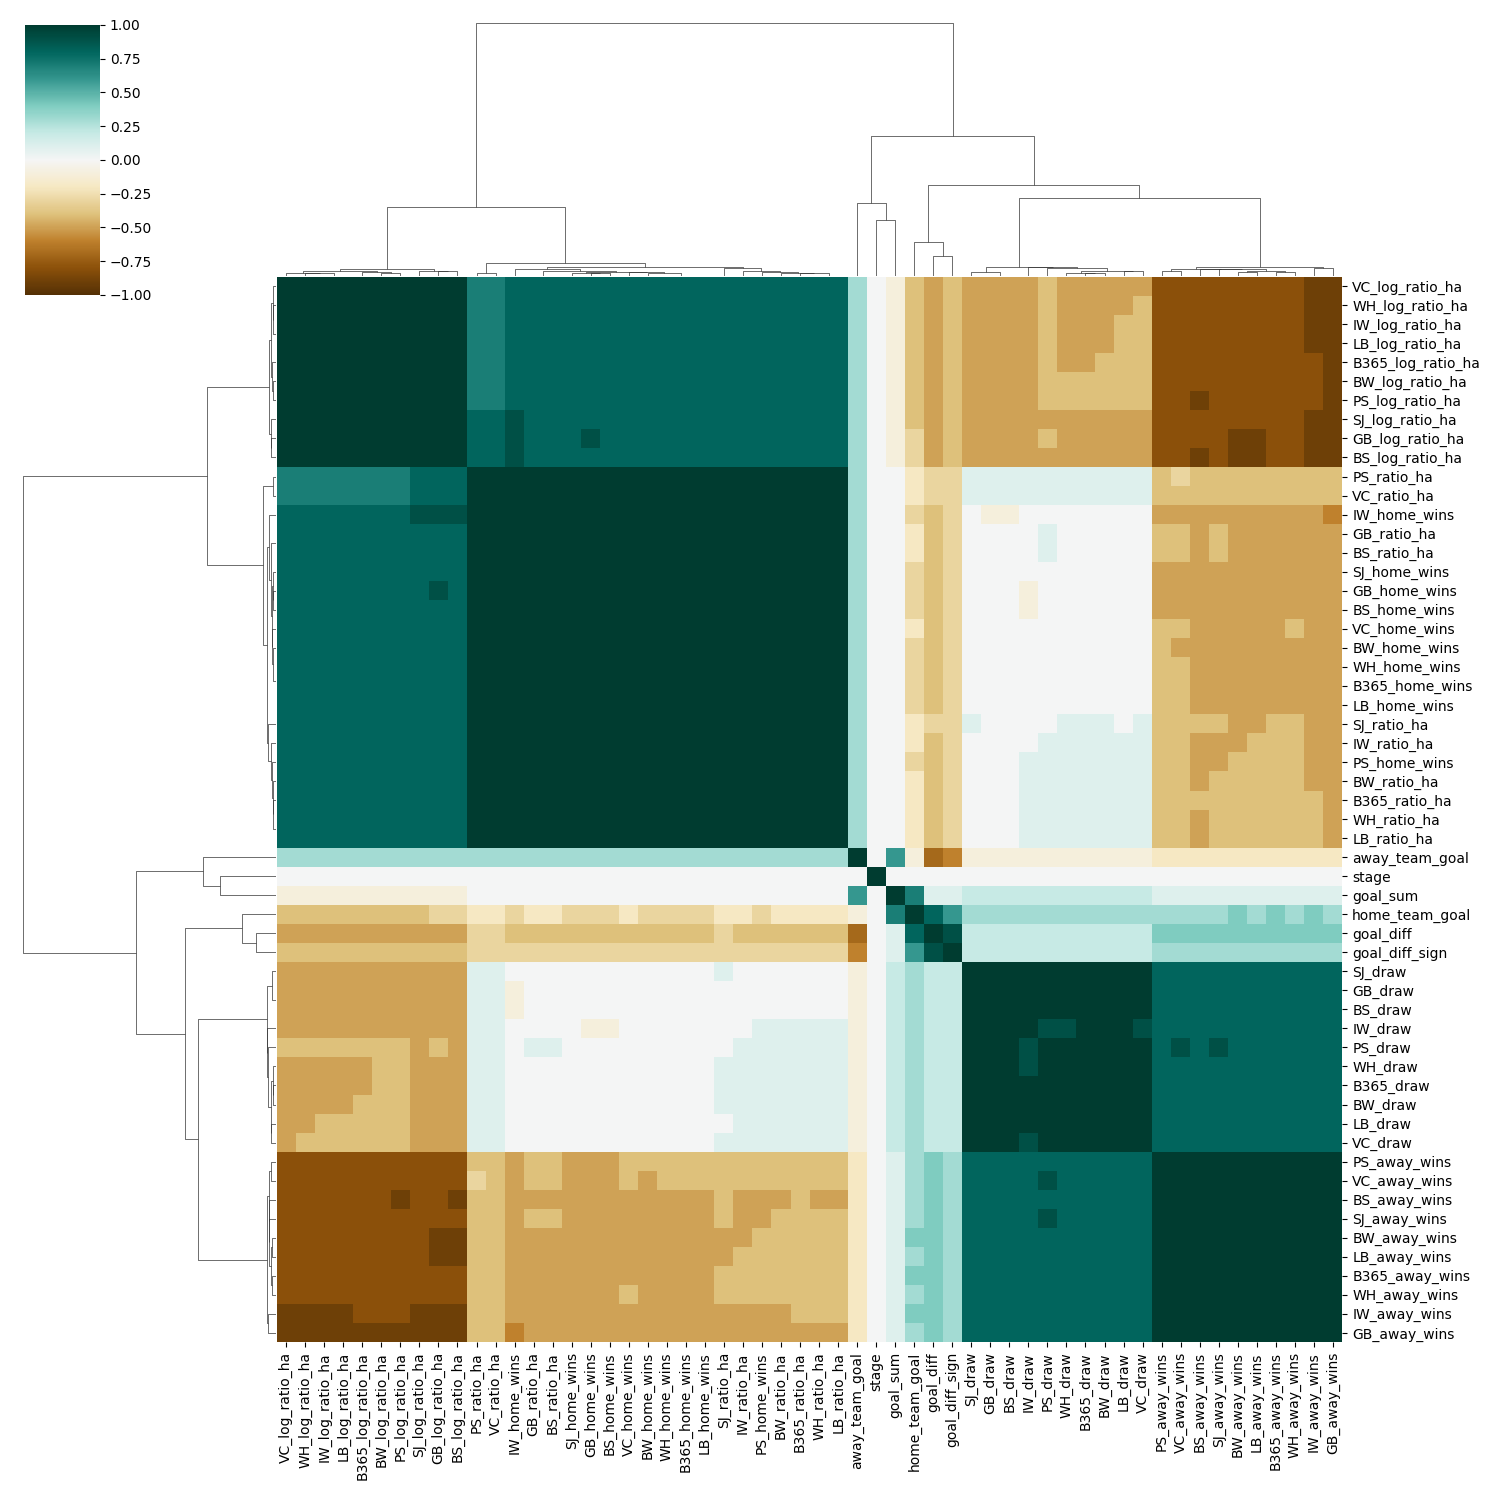

In [121]:
sns.clustermap(
    cor_betting.round(1),
    vmin=-1,
    vmax=1,
    annot=False,
    cmap="BrBG",
    method="centroid",
    figsize=(15, 15),
);

</details>

In [122]:
del cor_betting

## Team Score Prediction 


> - **Can we predict how many goals each team will score in each match?**


- In this section, number of **goals each team scores** in a match **is modeled**.
- As a reference, standard deviation of goals was calculated: **SD = 1.26 goals**.
- The initial idea was to select 4 final models for the types of variables, that are available and different times before the match (team-related features, player-related features and betting odds and one model based on all types of variables), so:
    - Three separate models for **3 predictor types** (team-related features, player-related features and betting odds) were created.
    - Models with all 3 feature types as well as PCA features were also among the candidates, but they did not improve cross-validation performance and were discarded (see @tbl-regression-performance).
- Finally, **only a single model was selected**:
    - **Models** with **team-related** (train RMSE=1.24, R²=0.03) and **player-related features** (train RMSE=1.20, R²=0.09) had really **poor** performance and barely explained any variation in target variable (R²<0.15), so were also discarded (see @tbl-regression-performance-final).
    - In cases two cases (a. betting odds based model and b. model where all variables were between the candidates as possible predictors) the same RF model with a single variable `B365_win` (betting odds that team wins) was selected. Its **test** performance is **RMSE=1.16**, **R²=0.15**.
- There is a **debate** if **betting odds** is a reliable predictor due to its nature (it is the output of other model, it changes frequently, etc.). Yet, in this analysis betting odds was the only type of predictors that allowed achieving model with minimum reasonable amount of explained variance (R²≥0.15).
- ***Conclusion*:** there is a lot of randomness in the game, so basing on the available data it is hard to make reliable predictions in advance on how many goals a team will core..

The summary of the results is present in Tables [-@tbl-regression-performance] and [-@tbl-regression-performance-final].

The details are in the subsections below.

In [123]:
target_sd = team_train[team_target].std()

print(
    "Standard deviation (SD) of target variable in training set: "
    f"{round(target_sd, 2)} goals"
)

Standard deviation (SD) of target variable in training set: 1.26 goals


### Team-Related Features as Predictors

#### Linear Regression {.unnumbered}

In [124]:
# Do SFS or take results from cache
def fun_sfs_res_team_team():
    np.random.seed(250)
    estimator = LinearRegression()
    subset = [team_target, "team_type", *team_vars_team]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_team.pickle"
sfs_res_team_team = my.cached_results(file, fun_sfs_res_team_team)

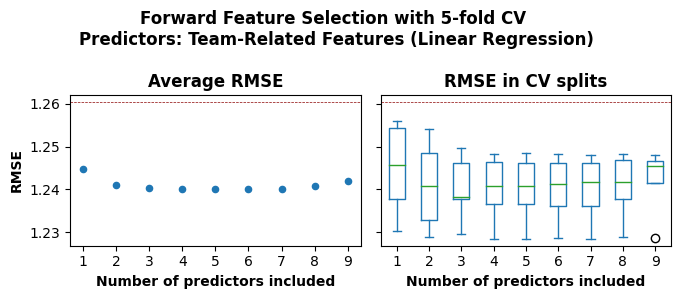

k = 2, avg. RMSE = 1.241 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [125]:
# | label: fig-sfs-01
# | fig-cap: SFS results.
# |          Red dashed reference line indicates SD of target variable.
ml.sfs_plot_results(
    sfs_res_team_team,
    "Predictors: Team-Related Features (Linear Regression)",
    target_sd,
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [126]:
(
    ml.sfs_list_features(sfs_res_team_team)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

#### Random Forest {.unnumbered}

In [127]:
# Do SFS or take results from cache
def fun_sfs_res_team_team_rf():
    np.random.seed(250)
    estimator = RandomForestRegressor()
    subset = [team_train, "team_type", *team_vars_team]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_team_rf.pickle"
sfs_res_team_team_rf = my.cached_results(file, fun_sfs_res_team_team_rf)

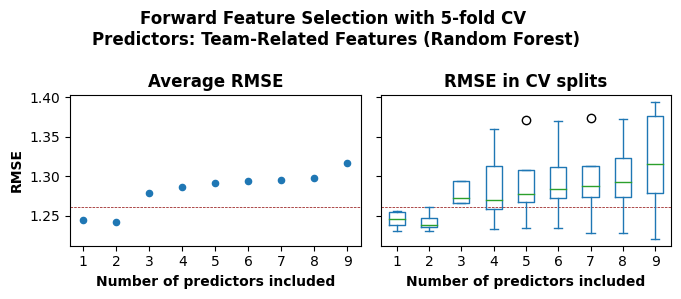

k = 2, avg. RMSE = 1.242 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [128]:
# | label: fig-sfs-02
# | fig-cap: SFS results.
# |          Red dashed reference line indicates SD of target variable.
ml.sfs_plot_results(
    sfs_res_team_team_rf,
    "Predictors: Team-Related Features (Random Forest)",
    target_sd,
)

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [129]:
(
    ml.sfs_list_features(sfs_res_team_team_rf)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

### Player-Related Features as Predictors

#### Linear Regression {.unnumbered}

In [130]:
# Do SFS or take results from cache
def fun_sfs_res_team_player():
    np.random.seed(250)
    estimator = LinearRegression()
    subset = [team_target, "team_type", *team_vars_player]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression", 30).fit(X, y)


file = "saved-output/sfs_res_team_player.pickle"
sfs_res_team_player = my.cached_results(file, fun_sfs_res_team_player)

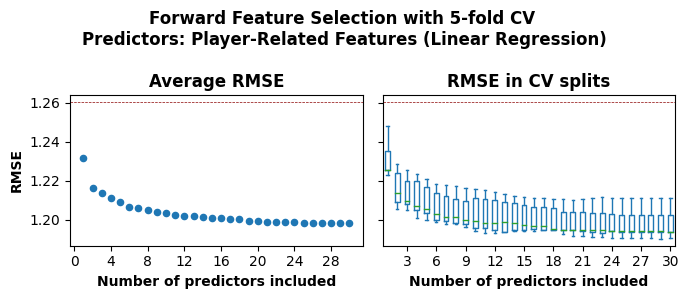

k = 30, avg. RMSE = 1.198 [Best]
(Number of predictors at best score)


In [131]:
# | label: fig-sfs-03
# | fig-cap: SFS results.
# |          Red dashed reference line indicates SD of target variable.
ml.sfs_plot_results(
    sfs_res_team_player,
    "Predictors: Player-Related Features (Linear Regression)",
    target_sd,
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [132]:
(
    ml.sfs_list_features(sfs_res_team_player)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>

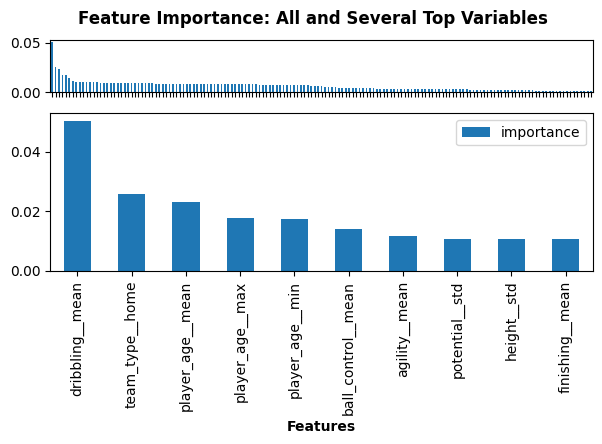

In [133]:
def fun_rf_team_player():
    np.random.seed(250)
    rf = RandomForestRegressor(n_jobs=-1)
    subset = [team_target, "team_type", *team_vars_player]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return rf.fit(X, y)


file = "saved-output/rf_team_player.pickle"
rf_team_player = my.cached_results(file, fun_rf_team_player)

rf_team_player_importances = ml.get_rf_importances(rf_team_player)

ml.plot_importances(rf_team_player_importances, n=10);

In [134]:
(
    rf_team_player_importances.nlargest(10, "importance")
    .style.format(precision=4)
    .bar()
)

</details>

In [135]:
# Do SFS or take results from cache
def fun_sfs_res_team_player_rf():
    np.random.seed(250)
    estimator = RandomForestRegressor()
    # fmt: off
    subset = [
        team_target, 'dribbling__mean', 'team_type__home', 'player_age__mean',
       'player_age__max', 'player_age__min', 'ball_control__mean',
       'agility__mean', 'potential__std', 'height__std',
       'finishing__mean'
    ]
    # fmt: on
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression", 10).fit(X, y)


file = "saved-output/sfs_res_team_player_rf.pickle"
sfs_res_team_player_rf = my.cached_results(file, fun_sfs_res_team_player_rf)

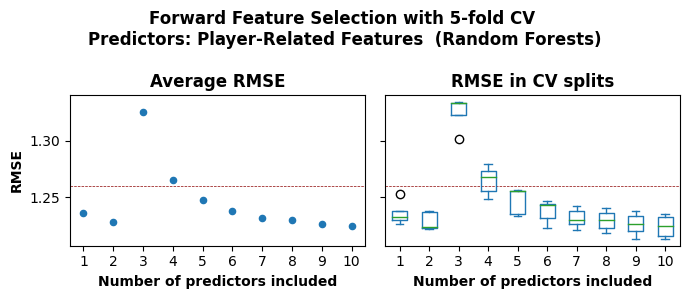

k = 10, avg. RMSE = 1.224 [Best]
(Number of predictors at best score)


In [136]:
# | label: fig-sfs-04
# | fig-cap: SFS results.
# |          Red dashed reference line indicates SD of target variable.
ml.sfs_plot_results(
    sfs_res_team_player_rf,
    "Predictors: Player-Related Features  (Random Forests)",
    target_sd,
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [137]:
(
    ml.sfs_list_features(sfs_res_team_player_rf)
    .head(20)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

### Betting Odds as Predictors

#### Linear Regression {.unnumbered}

In [138]:
# Do SFS or take results from cache
def fun_sfs_res_team_betting():
    np.random.seed(250)
    estimator = LinearRegression()
    subset = [team_target, "team_type", *team_vars_betting_odds]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_betting.pickle"
sfs_res_team_betting = my.cached_results(file, fun_sfs_res_team_betting)

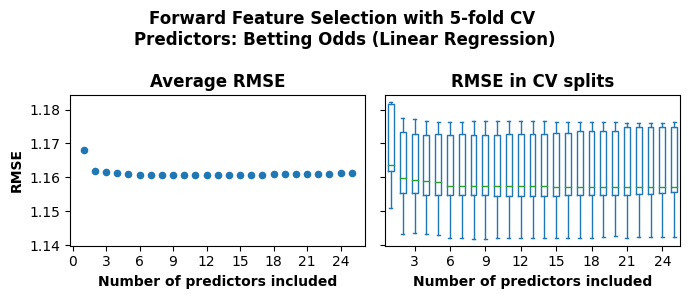

k = 2, avg. RMSE = 1.162 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [139]:
# | label: fig-sfs-05
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_team_betting,
    "Predictors: Betting Odds (Linear Regression)",
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [140]:
(
    ml.sfs_list_features(sfs_res_team_betting)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>


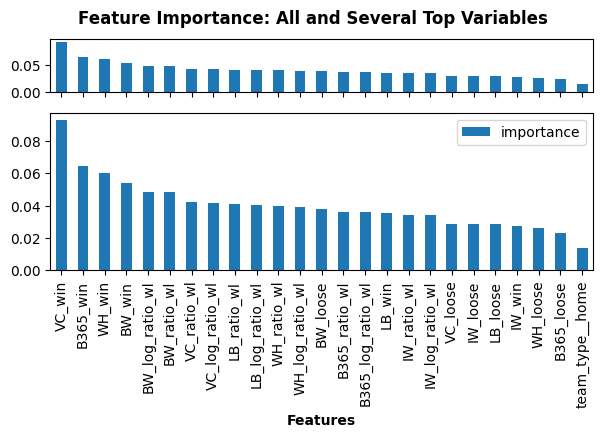

In [141]:
def fun_rf_team_betting():
    np.random.seed(250)
    rf = RandomForestRegressor(n_jobs=-1)
    subset = [team_target, "team_type", *team_vars_betting_odds]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return rf.fit(X, y)


file = "saved-output/rf_team_betting.pickle"
rf_team_betting = my.cached_results(file, fun_rf_team_betting)

rf_team_betting_importances = ml.get_rf_importances(rf_team_betting)

ml.plot_importances(rf_team_betting_importances, n=30);

In [142]:
(rf_team_betting_importances.style.format(precision=4).bar())

</details>

In [143]:
# Do SFS or take results from cache
def fun_sfs_res_team_betting_rf():
    np.random.seed(250)
    estimator = RandomForestRegressor()
    subset = [team_target, "team_type", *team_vars_betting_odds]
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_betting_rf.pickle"
sfs_res_team_betting_rf = my.cached_results(file, fun_sfs_res_team_betting_rf)

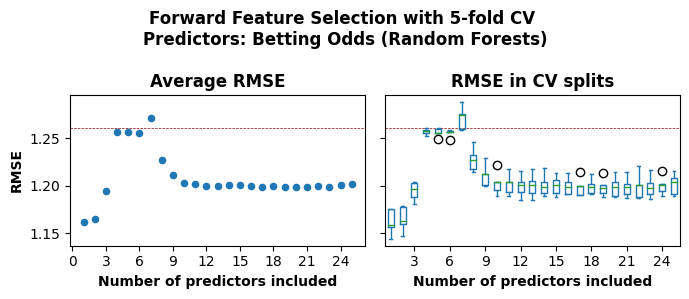

k = 1, avg. RMSE = 1.162 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [144]:
# | label: fig-sfs-06
# | fig-cap: SFS results.
# |          Red dashed reference line indicates SD of target variable.
ml.sfs_plot_results(
    sfs_res_team_betting_rf,
    "Predictors: Betting Odds (Random Forests)",
    team_train[team_target].std(),
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [145]:
(
    ml.sfs_list_features(sfs_res_team_betting_rf)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

### All Variables as Predictors

#### Linear Regression {.unnumbered}

In [146]:
# Do SFS or take results from cache
def fun_sfs_res_team_all():
    np.random.seed(250)
    estimator = LinearRegression()
    X, y = team_train.make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression", 50).fit(X, y)


file = "saved-output/sfs_res_team_all.pickle"
sfs_res_team_all = my.cached_results(file, fun_sfs_res_team_all)

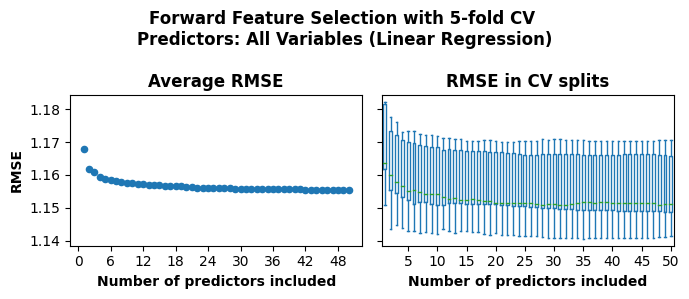

k = 50, avg. RMSE = 1.156 [Best]
(Number of predictors at best score)


In [147]:
# | label: fig-sfs-
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_team_all, "Predictors: All Variables (Linear Regression)"
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [148]:
(
    ml.sfs_list_features(sfs_res_team_all)
    .head(20)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>

The plot below contains all sorted importances (upper subplot) and 30 top cases (lower subplot).

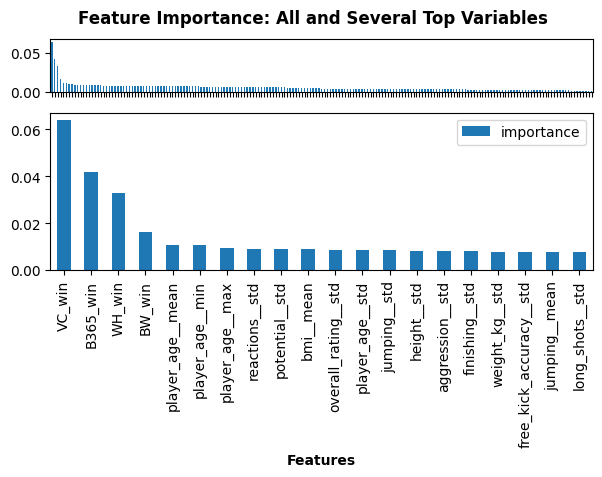

In [149]:
def fun_rf_team_all():
    np.random.seed(250)
    rf = RandomForestRegressor(n_jobs=-1)
    X, y = team_train.make_dummies(team_target)
    return rf.fit(X, y)


file = "saved-output/rf_team_all.pickle"
rf_team_all = my.cached_results(file, fun_rf_team_all)


rf_team_all_importances = ml.get_rf_importances(rf_team_all)

ml.plot_importances(rf_team_all_importances);

<!-- 

# | label: tbl-rf-feature-importance-all
# | tbl-cap: Top 11 features by random forest feature importance score
# |          (importance > 0.0089) that were included in the further SFS
# |          analysis.

-->

In [150]:
(
    rf_team_all_importances.nlargest(20, "importance")
    .style.format(precision=4)
    .bar()
)

</details>

In [151]:
# Do SFS or take results from cache
def fun_sfs_res_team_all_rf():
    np.random.seed(250)
    estimator = RandomForestRegressor()
    # fmt: off
    subset = [
       team_target,
       "VC_win", "B365_win", "WH_win", "BW_win", "player_age__mean",
       "player_age__min", "player_age__max", "reactions__std",
       "potential__std", "bmi__mean", 
       "dribbling__mean", "team_type"
    ]
    # fmt: on
    X, y = team_train[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_all_rf.pickle"
sfs_res_team_all_rf = my.cached_results(file, fun_sfs_res_team_all_rf)

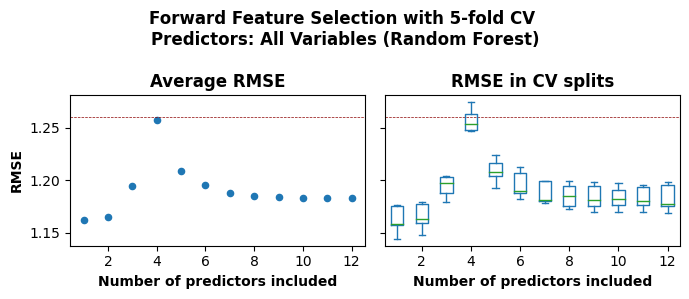

k = 1, avg. RMSE = 1.162 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [152]:
# | label: fig-sfs-08
# | fig-cap: SFS results.
# |          Red dashed reference line indicates SD of target variable.
ml.sfs_plot_results(
    sfs_res_team_all_rf,
    "Predictors: All Variables (Random Forest)",
    target_sd,
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [153]:
(
    ml.sfs_list_features(sfs_res_team_all_rf)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

### PCA Features of All Variables as Predictors

It was tried to create predictive model based on principal components instead of original numeric variables. 
PCA scree plot suggests that it is reasonable to use that 4 or 6 components as at these points the "elbow" point can be visible. Six components explain 56 % of variance. To explain 80% of variance, 27 components are needed.

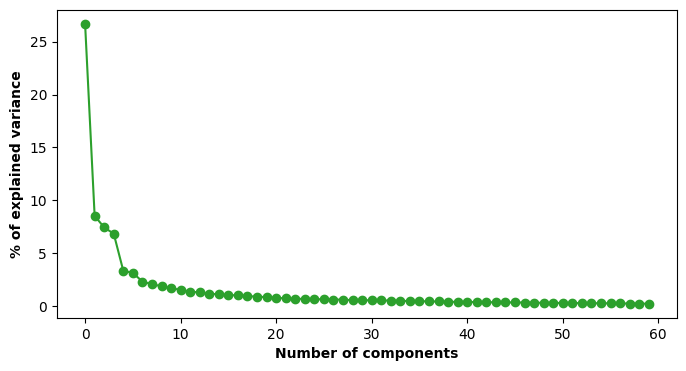

In [154]:
# | label: fig-pca-screeplot
# | fig-cap: PCA screeplot.

_, team_train_num, _ = ml.get_columns_by_purpose(team_train, team_target)
_, _, pca_obj = ml.pca_screeplot(team_train_num, 60);

In [155]:
pcs_6 = pca_obj.explained_variance_ratio_.cumsum()[5] * 100
print(f"First 6 PCs explain {pcs_6:.1f} % of variance.")

First 6 PCs explain 56.0 % of variance.


In [156]:
n_pcs_80 = np.argwhere(pca_obj.explained_variance_ratio_.cumsum() >= 0.80).min()
print(f"Number of PCs needed to explain at least 80% of variance: {n_pcs_80}")

Number of PCs needed to explain at least 80% of variance: 27


In [157]:
d_target, d_num, d_other, d_pca, team_scale, team_pca = ml.do_pca(
    team_train, team_target, n_components=50
)
team_train_with_pca = pd.concat([d_target, d_other, d_pca], axis=1)

#### Linear Regression {.unnumbered}

Include 6 PCs in SFS.

In [158]:
# Do SFS or take results from cache
def fun_sfs_res_team_pca_2():
    np.random.seed(250)
    estimator = LinearRegression()
    # fmt: off
    subset = [
        team_target,
        "team_type",
        "pc_1", "pc_2", "pc_3", "pc_4", "pc_5", "pc_6", 
    ]
    # fmt: on
    X, y = team_train_with_pca[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_pca_2.pickle"
sfs_res_team_pca_2 = my.cached_results(file, fun_sfs_res_team_pca_2)

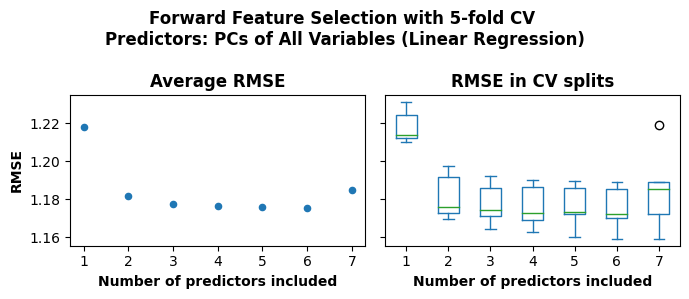

k = 4, avg. RMSE = 1.176 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [159]:
# | label: fig-sfs-09
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_team_pca_2,
    "Predictors: PCs of All Variables (Linear Regression)",
)

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [160]:
(
    ml.sfs_list_features(sfs_res_team_pca_2)
    .head(20)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

Include 27 PCs in SFS.

In [161]:
# Do SFS or take results from cache
def fun_sfs_res_team_pca():
    np.random.seed(250)
    estimator = LinearRegression()
    # fmt: off
    subset = [
        team_target,
        "team_type",
        "pc_1", "pc_2", "pc_3", "pc_4", "pc_5",
        "pc_6", "pc_7", "pc_8", "pc_9", "pc_10",
        "pc_11", "pc_12", "pc_13", "pc_14", "pc_15",
        "pc_16", "pc_17", "pc_18", "pc_19", "pc_20",
        "pc_21", "pc_22", "pc_23", "pc_24", "pc_25",
        "pc_26", "pc_27",
    ]
    # fmt: on
    X, y = team_train_with_pca[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_pca.pickle"
sfs_res_team_pca = my.cached_results(file, fun_sfs_res_team_pca)

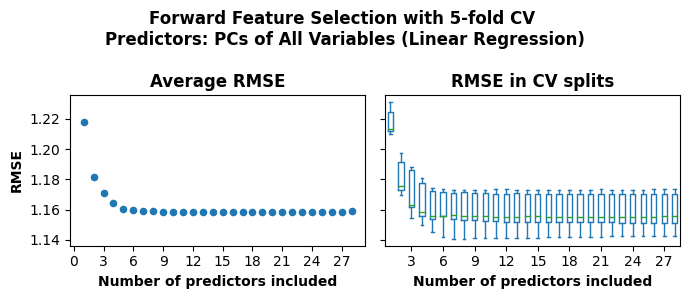

k = 5, avg. RMSE = 1.160 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [162]:
# | label: fig-sfs-10
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_team_pca, "Predictors: PCs of All Variables (Linear Regression)"
)

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [163]:
(
    ml.sfs_list_features(sfs_res_team_pca)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>

<!-- 

# | label: tbl-rf-feature-importance-pca
# | tbl-cap: Top 9 features (8 principal components and 1 categorical) by
# |          random forest feature importance score
# |          (importance > 0.018) that were included in the further SFS
# |          analysis.

-->

Random forest feature importance of principal components and categorical variables.

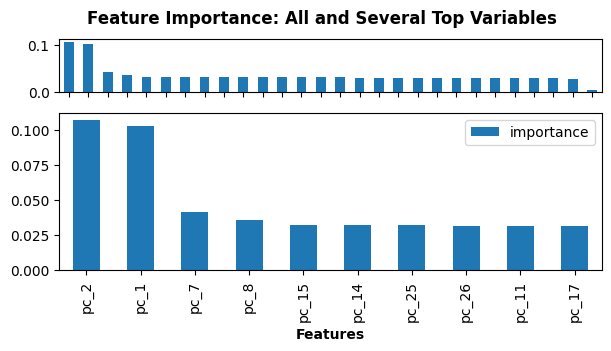

In [164]:
def fun_rf_team_pca():
    np.random.seed(250)
    rf = RandomForestRegressor(n_jobs=-1)
    # fmt: off
    subset = [
        team_target,
        "team_type",
        "pc_1", "pc_2", "pc_3", "pc_4", "pc_5",
        "pc_6", "pc_7", "pc_8", "pc_9", "pc_10",
        "pc_11", "pc_12", "pc_13", "pc_14", "pc_15",
        "pc_16", "pc_17", "pc_18", "pc_19", "pc_20",
        "pc_21", "pc_22", "pc_23", "pc_24", "pc_25",
        "pc_26", "pc_27",
    ]
    # fmt: on
    X, y = team_train_with_pca[subset].make_dummies(team_target)
    return rf.fit(X, y)


file = "saved-output/rf_team_pca.pickle"
rf_team_pca = my.cached_results(file, fun_rf_team_pca)

rf_team_pca_importances = ml.get_rf_importances(rf_team_pca)

ml.plot_importances(rf_team_pca_importances, n=10);

In [165]:
rf_team_pca_importances.style.format(precision=4).bar()

</details>

Include 6 PCs in SFS.

In [166]:
# Do SFS or take results from cache
def fun_sfs_res_team_pca_2_rf():
    np.random.seed(250)
    estimator = RandomForestRegressor()
    # fmt: off
    subset = [
        team_target,
        "team_type",
        "pc_1", "pc_2", "pc_3", "pc_4", "pc_5", "pc_6", 
    ]
    # fmt: on
    X, y = team_train_with_pca[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_pca_2_rf.pickle"
sfs_res_team_pca_2_rf = my.cached_results(file, fun_sfs_res_team_pca_2_rf)

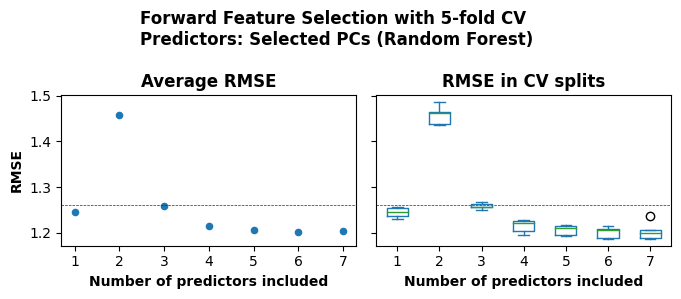

k = 6, avg. RMSE = 1.201 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [167]:
# | label: fig-sfs-11
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_team_pca_2_rf,
    "Predictors: Selected PCs (Random Forest)",
    team_train[team_target].std(),
);

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [168]:
(
    ml.sfs_list_features(sfs_res_team_pca_2_rf)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

</details>

Include 27 PCs in SFS.

In [169]:
# Do SFS or take results from cache
def fun_sfs_res_team_pca_rf():
    np.random.seed(250)
    estimator = RandomForestRegressor()
    # fmt: off
    subset = [
        team_target,
        "team_type",
        "pc_1", "pc_2", "pc_3", "pc_4", "pc_5",
        "pc_6", "pc_7", "pc_8", "pc_9", "pc_10",
        "pc_11", "pc_12", "pc_13", "pc_14", "pc_15",
        "pc_16", "pc_17", "pc_18", "pc_19", "pc_20",
        "pc_21", "pc_22", "pc_23", "pc_24", "pc_25",
        "pc_26", "pc_27",
    ]
    # fmt: on
    X, y = team_train_with_pca[subset].make_dummies(exclude=team_target)
    return ml.sfs(estimator, "regression").fit(X, y)


file = "saved-output/sfs_res_team_pca_rf.pickle"
sfs_res_team_pca_rf = my.cached_results(file, fun_sfs_res_team_pca_rf)

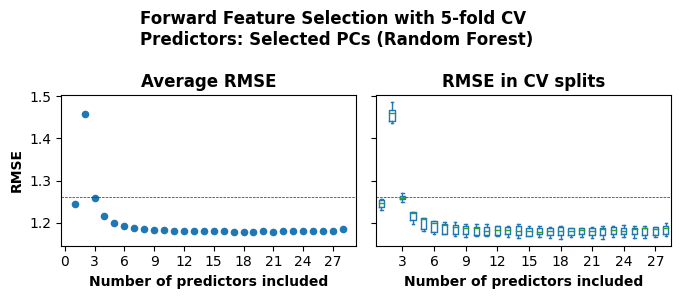

k = 14, avg. RMSE = 1.180 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [170]:
# | label: fig-sfs-12
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_team_pca_rf,
    "Predictors: Selected PCs (Random Forest)",
    team_train[team_target].std(),
);

<!-- 323 m 28.0 s

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:  6.0min finished
Features: 1/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  5.2min finished
Features: 2/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 out of  26 | elapsed:  6.2min finished
Features: 3/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  7.2min finished
Features: 4/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  7.5min finished
Features: 5/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:  8.8min finished
Features: 6/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed: 10.1min finished
Features: 7/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed: 11.4min finished
Features: 8/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 12.8min finished
Features: 9/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  19 | elapsed: 13.8min finished
Features: 10/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed: 15.0min finished
Features: 11/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 out of  17 | elapsed: 16.1min finished
Features: 12/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed: 14.1min finished
Features: 13/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 14.3min finished
Features: 14/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed: 14.7min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  14 out of  14 | elapsed: 14.7min finished
Features: 15/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed: 15.1min finished
Features: 16/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  12 | elapsed: 15.4min remaining:  3.1min
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed: 15.5min finished
Features: 17/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:  9.8min remaining:  3.7min
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed: 15.8min finished
Features: 18/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed: 10.2min remaining:  6.8min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed: 16.3min finished
Features: 19/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed: 10.7min remaining: 13.3min
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed: 16.8min finished
Features: 20/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed: 11.3min remaining: 34.0min
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed: 11.4min finished
Features: 21/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed: 11.0min finished
Features: 22/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed: 10.7min finished
Features: 23/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:  9.9min remaining: 14.9min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed: 10.0min finished
Features: 24/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.6min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  9.6min finished
Features: 25/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  8.7min finished
Features: 26/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  9.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  9.4min finished
Features: 27/28[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  9.8min finished
Features: 28/28

-->

<details class="with-border"><summary>Details: Numeric values of RMSE</summary>

In [171]:
(
    ml.sfs_list_features(sfs_res_team_pca_rf)
    .style.format(precision=3)
    .highlight_min(subset=["RMSE"])
)

### Final models {#sec-final-models-goals}

This subsection summarizes the results from the subsections above and evaluates the performance on the whole training and test sets.

Basing on training CV RMSE:

- Comparing 3 groups of predictors (team-related features, player-related features and betting odds), betting odds show the best predictive abilities and team-related features show the worst ones (see Table [-@tbl-regression-performance]). 
- Comparing predictions based on original variables and PCs of these variables, PCs did not improve the predictions.
- For the further investigation, 3 models were selected.

: **Regression** model selection results: selected models for each feature type and algorithm. {#tbl-regression-performance}

Features type | Method | Number of<br>features selected | Training CV<br>**RMSE** | Selected as<br>final model | Note 
-----                    | -----             | :---:               | :---:        | :---:                      | -----
Team-related             | Linear regression | k = 2               | 1.241 | No⁴  |
&nbsp;                   | Random forest     | k = 2               | 1.242 | No   |
Player-related           | Linear regression | k = 10              | 1.203 | No⁴  | Included¹: all<br>Max. allowed²: 30<br>With k = 20, RMSE: 1.199
&nbsp;                   | Random forest     | k = 10              | 1.224 | No   | Included¹: 10
Betting odds             | Linear regression | k = 2               | 1.162 | No   |
&nbsp;                   | Random forest     | k = 1               | 1.162 | Yes⁵ |
All variables            | Linear regression | k = 6               | 1.158 | No   | Included¹: all<br>Max. allowed²: 50
&nbsp;                   | Random forest     | k = 1               | 1.162 | Yes⁵ | Included¹: 12<br>The same model as in "Betting odds \| Random forest"
6 PCs of all³ variables  | Linear regression | k = 4               | 1.176 | No   | Included¹: 7
&nbsp;                   | Random forest     | k = 6               | 1.201 | No   | Included¹: 7
27 PCs of all³ variables | Linear regression | k = 5               | 1.160 | No   | Included¹: 28
&nbsp;                   | Random forest     | k = 13              | 1.180 | No   | Included¹: 28<br>With k = 17, RMSE: 1.178

¹ – Number of features included in SFS selection.   
² – Maximum allowed number of features to be selected.  
³ – PCs of all *numeric* variables.  
⁴ – Model was a candidate to become a final model but rejected due to low performance.   
⁵ – In both cases the same model was selected.
	
<br>

Two candidates to final models out of 3 were discarded due to low explained variance (R²<0.15; see @tbl-regression-performance-final).

In [172]:
# | label: tbl-regression-performance-final
# | tbl-cap: Final evaluation of selected models for team goal prediction.

np.random.seed(250)

# -----------------------------------------------------------------------

subset_1 = [team_target, "team_type", "buildUpPlayPassing"]
X_train_1, y_train_1 = team_train[subset_1].make_dummies(exclude=team_target)

model_team_team = LinearRegression()
model_team_team.fit(X_train_1, y_train_1)

y_pred_train_1 = model_team_team.predict(X_train_1)

# -----------------------------------------------------------------------

subset_2 = [
    team_target,
    "dribbling__mean",
    "team_type",
    "agility__mean",
    "height__max",
    "standing_tackle__mean",
    "short_passing__mean",
    "ball_control__min",
    "gk_reflexes__max",
    "overall_rating__max",
    "player_age__mean",
]
X_train_2, y_train_2 = team_train[subset_2].make_dummies(exclude=team_target)

model_team_player = LinearRegression()
model_team_player.fit(X_train_2, y_train_2)

y_pred_train_2 = model_team_player.predict(X_train_2)

# -----------------------------------------------------------------------

subset_3 = [team_target, "B365_win"]
X_train_3, y_train_3 = team_train[subset_3].make_dummies(exclude=team_target)
X_test_3, y_test_3 = team_test[subset_3].make_dummies(exclude=team_target)

model_team_all = RandomForestRegressor(n_jobs=-1)
model_team_all.fit(X_train_3, y_train_3)

y_pred_train_3 = model_team_all.predict(X_train_3)
y_pred_test_3 = model_team_all.predict(X_test_3)

# -----------------------------------------------------------------------

pd.concat(
    [
        ml.get_regression_performance(
            y_train_1, y_pred_train_1, "Train (team-related features)"
        ),
        ml.get_regression_performance(
            y_train_2, y_pred_train_2, "Train (player-related features)"
        ),
        ml.get_regression_performance(
            y_train_3, y_pred_train_3, "Train (all features/betting odds)"
        ),
        ml.get_regression_performance(
            y_test_3, y_pred_test_3, "Test (all features/betting odds)"
        ),
    ]
).index_start_at(1).style.format(precision=2)

## Match Outcome Prediction


> - **Can we predict which team will win the match?**


- In this section, the **output of the match** (home wins, draw, away wins) **is modeled**.
- The initial idea was to select 4 models: one from each feature type group as these features are available at different time before the match. But model based on team-related features showed low performance. And model based on all type of variables was rejected due to possible overfitting in preference to less complex model with 1 variable based on betting odds: these models share she same most important feature and inclusion of additional features only slightly improved model performance on training set. **So only 2 final models were selected.**
- The **test performance** of the final models:
    -  for the model **based on player attributes** accuracy is **50%**, balanced accuracy is **42%**;
    -  for the model **based on betting odds** is as follows: accuracy **52%**, balanced accuracy is **45%**.
-  These models can be used in different situations when different typos of variables are available. 
-  Unfortunately, both models are **unable to predict** outcome **"draw"** correctly. This *might* be related to the findings in section [Relationship Between Betting Odds] that betting odds of "draw" are correlated to the outcome "away wins".
- ***Conclusion*:** despite the fact that there is a lot of randomness in the game, decisions based on data can improve predictions on the football match outcome. Still, this prediction is not perfect.


The results of classification model selection are in @tbl-classification-performance.
The performance of the selected models is presented in @tbl-classification-performance-final and in the output below this table.

The details are in the subsections below.

### Team-Related Features as Predictors

#### Logistic Regression {.unnumbered}

In [173]:
# Do SFS or take results from cache
def fun_sfs_res_match_team():
    np.random.seed(250)
    estimator = LogisticRegression(
        solver="newton-cg", multi_class="multinomial"
    )
    subset = [match_target, *match_vars_team]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification").fit(X, y)


file = "saved-output/sfs_res_match_team.pickle"
sfs_res_match_team = my.cached_results(file, fun_sfs_res_match_team)

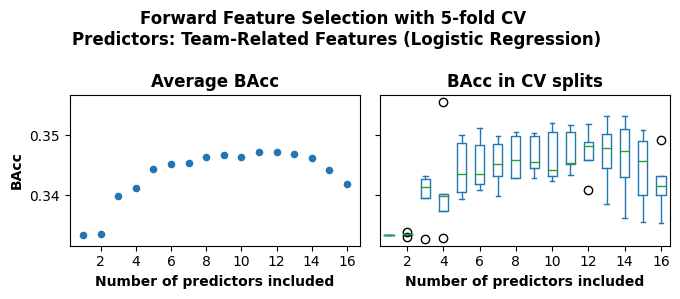

k = 9, avg. BAcc = 0.347 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [174]:
# | label: fig-sfs-13
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_team,
    "Predictors: Team-Related Features (Logistic Regression)",
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [175]:
(
    ml.sfs_list_features(sfs_res_match_team)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

#### Random Forests {.unnumbered}

In [176]:
# Do SFS or take results from cache
def fun_sfs_res_match_team_rf():
    np.random.seed(250)
    estimator = RandomForestClassifier()
    subset = [match_target, *match_vars_team]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification").fit(X, y)


file = "saved-output/sfs_res_match_team_rf.pickle"
sfs_res_match_team_rf = my.cached_results(file, fun_sfs_res_match_team_rf)

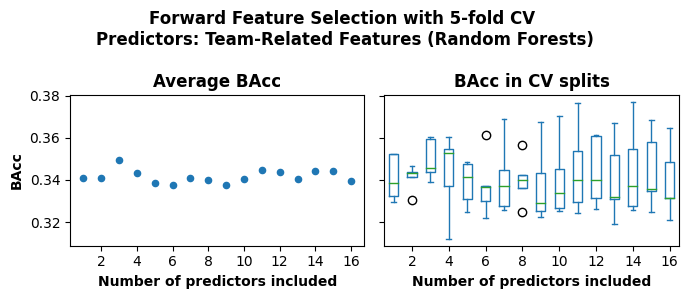

k = 3, avg. BAcc = 0.350 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [177]:
# | label: fig-sfs-14
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_team_rf, "Predictors: Team-Related Features (Random Forests)"
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [178]:
(
    ml.sfs_list_features(sfs_res_match_team_rf)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

### Player-Related Features as Predictors

#### Logistic Regression {.unnumbered}

In [179]:
# Do SFS or take results from cache
def fun_sfs_res_match_player():
    np.random.seed(250)
    estimator = LogisticRegression(
        solver="newton-cg", multi_class="multinomial"
    )
    subset = [match_target, *match_vars_player]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification", 30).fit(X, y)


file = "saved-output/sfs_res_match_player.pickle"
sfs_res_match_player = my.cached_results(file, fun_sfs_res_match_player)

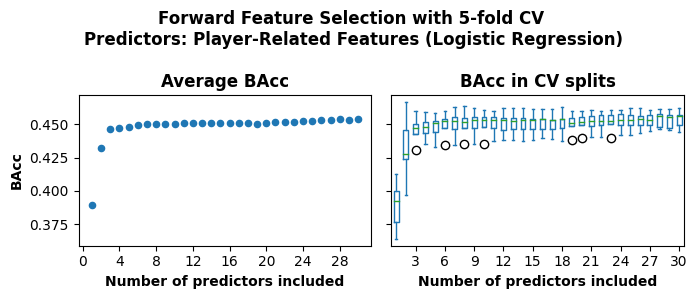

k = 28, avg. BAcc = 0.454 [Best]
(Number of predictors at best score)


In [180]:
# | label: fig-sfs-15
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_player,
    "Predictors: Player-Related Features (Logistic Regression)",
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [181]:
(
    ml.sfs_list_features(sfs_res_match_player)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>


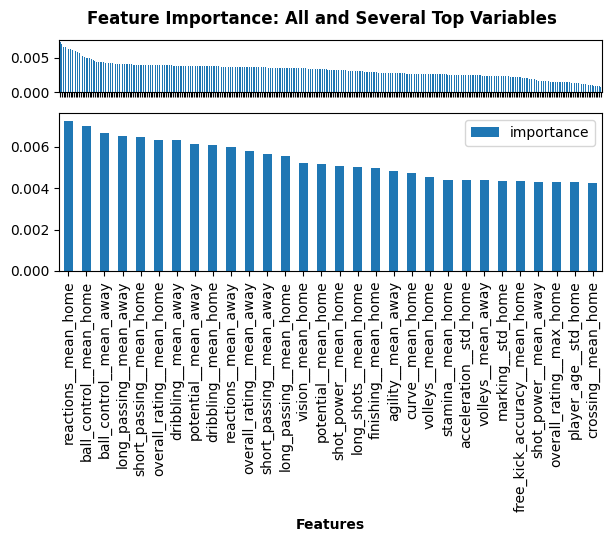

In [182]:
def fun_rf_match_player():
    np.random.seed(250)
    rf = RandomForestClassifier(n_jobs=-1)
    subset = [match_target, *match_vars_player]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return rf.fit(X, y)


file = "saved-output/rf_match_player.pickle"
rf_match_player = my.cached_results(file, fun_rf_match_player)

rf_match_player_importances = ml.get_rf_importances(rf_match_player)

ml.plot_importances(rf_match_player_importances, n=30);

In [183]:
(
    rf_match_player_importances.nlargest(21, "importance")
    .style.format(precision=4)
    .bar()
)

</details>

In [184]:
# Do SFS or take results from cache
def fun_sfs_res_match_player_rf():
    np.random.seed(250)
    estimator = RandomForestClassifier()
    # fmt: off
    subset = [
        match_target, 'reactions__mean_home', 'ball_control__mean_home',
       'ball_control__mean_away', 'long_passing__mean_away',
       'short_passing__mean_home', 'overall_rating__mean_home',
       'dribbling__mean_away', 'potential__mean_away',
       'dribbling__mean_home', 'reactions__mean_away',
       'overall_rating__mean_away', 'short_passing__mean_away',
       'long_passing__mean_home', 'vision__mean_home',
       'potential__mean_home', 'shot_power__mean_home',
       'long_shots__mean_home', 'finishing__mean_home',
       'agility__mean_away', 'curve__mean_home', 'volleys__mean_home'
    ]
    # fmt: on
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification", 10).fit(X, y)


file = "saved-output/sfs_res_match_player_rf.pickle"
sfs_res_match_player_rf = my.cached_results(file, fun_sfs_res_match_player_rf)

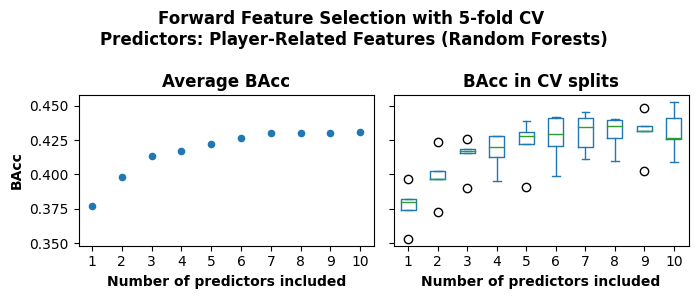

k = 10, avg. BAcc = 0.431 [Best]
(Number of predictors at best score)


In [185]:
# | label: fig-sfs-16
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_player_rf,
    "Predictors: Player-Related Features (Random Forests)",
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [186]:
(
    ml.sfs_list_features(sfs_res_match_player_rf)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

### Betting-Odds as Predictors

#### Logistic Regression {.unnumbered}

In [187]:
# Do SFS or take results from cache
def fun_sfs_res_match_betting():
    np.random.seed(250)
    estimator = LogisticRegression(
        solver="newton-cg", multi_class="multinomial"
    )
    subset = [match_target, *match_vars_betting_odds]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification").fit(X, y)


file = "saved-output/sfs_res_match_betting.pickle"
sfs_res_match_betting = my.cached_results(file, fun_sfs_res_match_betting)

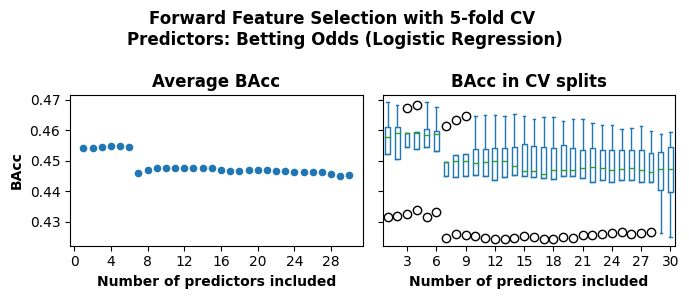

k = 1, avg. BAcc = 0.454 [Parsimonious]
(Smallest number of predictors at best ± 1 SE score)


In [188]:
# | label: fig-sfs-17
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_betting, "Predictors: Betting Odds (Logistic Regression)"
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [189]:
(
    ml.sfs_list_features(sfs_res_match_betting)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>

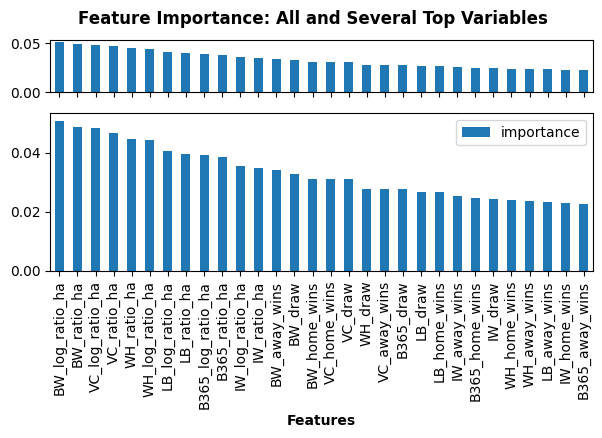

In [190]:
def fun_rf_match_betting():
    np.random.seed(250)
    rf = RandomForestClassifier(n_jobs=-1)
    subset = [match_target, *match_vars_betting_odds]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return rf.fit(X, y)


file = "saved-output/rf_match_betting.pickle"
rf_match_betting = my.cached_results(file, fun_rf_match_betting)

rf_match_betting_importances = ml.get_rf_importances(rf_match_betting)

ml.plot_importances(rf_match_betting_importances, n=30);

</details>

In [191]:
# Do SFS or take results from cache
def fun_sfs_res_match_betting_rf():
    np.random.seed(250)
    estimator = RandomForestClassifier()
    subset = [match_target, *match_vars_betting_odds]
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification", 10).fit(X, y)


file = "saved-output/sfs_res_match_betting_rf.pickle"
sfs_res_match_betting_rf = my.cached_results(file, fun_sfs_res_match_betting_rf)

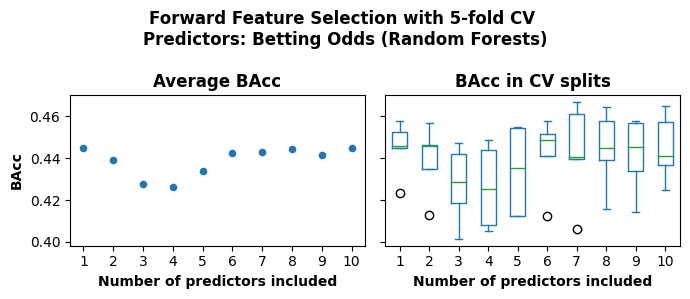

k = 10, avg. BAcc = 0.445 [Best]
(Number of predictors at best score)


In [192]:
# | label: fig-sfs-18
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_betting_rf, "Predictors: Betting Odds (Random Forests)"
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [193]:
(
    ml.sfs_list_features(sfs_res_match_betting_rf)
    .head(20)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

### All Variables as Predictors

#### Logistic Regression {.unnumbered}

In [194]:
# Do SFS or take results from cache
def fun_sfs_res_match_all():
    np.random.seed(250)
    estimator = LogisticRegression(
        solver="newton-cg", multi_class="multinomial"
    )
    X, y = match_train.make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification", 10).fit(X, y)


file = "saved-output/sfs_res_match_all.pickle"
sfs_res_match_all = my.cached_results(file, fun_sfs_res_match_all)

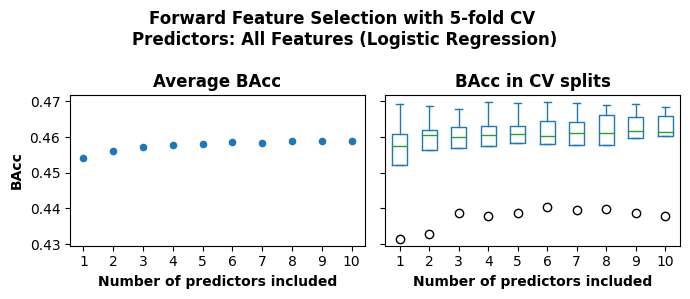

k = 9, avg. BAcc = 0.459 [Best]
(Number of predictors at best score)


In [195]:
# | label: fig-sfs-19
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_all, "Predictors: All Features (Logistic Regression)"
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [196]:
(
    ml.sfs_list_features(sfs_res_match_all)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

#### Random Forests {.unnumbered}

<details class="with-border"><summary>Details: Feature importances</summary>

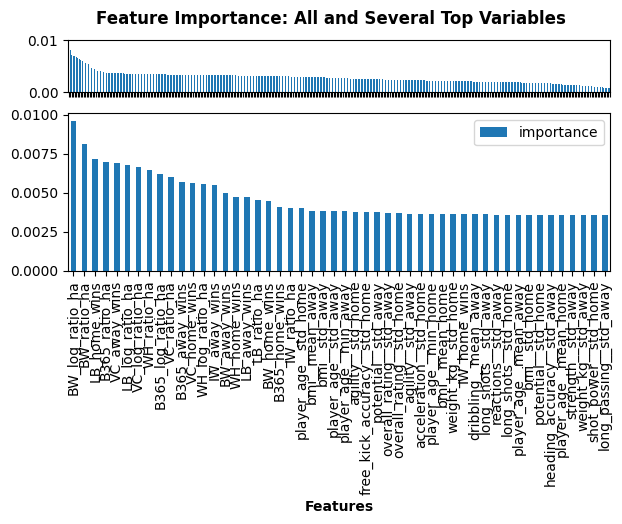

In [197]:
def fun_rf_match_all():
    np.random.seed(250)
    rf = RandomForestClassifier(n_jobs=-1)
    X, y = match_train.make_dummies(exclude=match_target)
    return rf.fit(X, y)


file = "saved-output/rf_match_all.pickle"
rf_match_all = my.cached_results(file, fun_rf_match_all)

rf_match_all_importances = ml.get_rf_importances(rf_match_all)

ml.plot_importances(rf_match_all_importances, n=50);

In [198]:
(
    rf_match_all_importances.nlargest(25, "importance")
    .style.format(precision=4)
    .bar()
)

</details>

In [199]:
# Do SFS or take results from cache
def fun_sfs_res_match_all_rf():
    np.random.seed(250)
    estimator = RandomForestClassifier()
    # fmt: off
    subset = [
        match_target, 'BW_log_ratio_ha', 'BW_ratio_ha', 'LB_home_wins', 
        'B365_ratio_ha', 'VC_away_wins', 'LB_log_ratio_ha', 'VC_log_ratio_ha',
        'WH_ratio_ha', 'B365_log_ratio_ha', 'VC_ratio_ha',
        'B365_away_wins', 'VC_home_wins', 'WH_log_ratio_ha',
        'IW_away_wins', 'BW_away_wins', 'WH_home_wins', 'LB_away_wins',
        'LB_ratio_ha', 'BW_home_wins', 'B365_home_wins', 'IW_ratio_ha',
        'player_age__std_home', 'bmi__mean_away', 'bmi__std_away',
        'player_age__std_away', 'player_age__min_away',
        'agility__std_home', 'free_kick_accuracy__std_home',
        'potential__std_away', 'overall_rating__std_away',
        'overall_rating__std_home', 'agility__std_away',
        'acceleration__std_home', 'player_age__min_home', 'bmi__mean_home',
        'weight_kg__std_home', 'IW_home_wins', 'dribbling__mean_away',
        'long_shots__std_away', 'reactions__std_away',
        'long_shots__std_home', 'player_age__mean_away', 'bmi__std_home',
        'potential__std_home', 'heading_accuracy__std_away',
        'player_age__mean_home', 'strength__std_away',
        'weight_kg__std_away', 'shot_power__std_home',
        'long_passing__std_away'
    ]
    # fmt: on
    X, y = match_train[subset].make_dummies(exclude=match_target)
    return ml.sfs(estimator, "classification", 10).fit(X, y)


file = "saved-output/sfs_res_match_all_rf.pickle"
sfs_res_match_all_rf = my.cached_results(file, fun_sfs_res_match_all_rf)

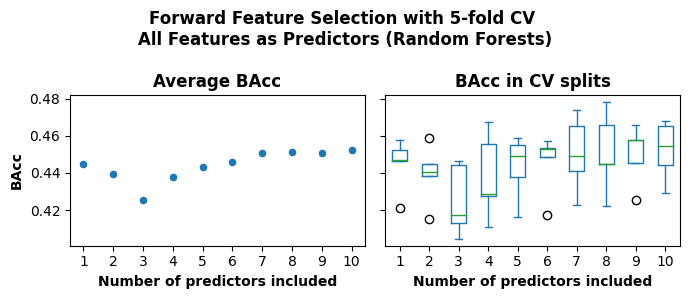

k = 10, avg. BAcc = 0.452 [Best]
(Number of predictors at best score)


In [200]:
# | label: fig-sfs-20
# | fig-cap: SFS results.
ml.sfs_plot_results(
    sfs_res_match_all_rf, "All Features as Predictors (Random Forests)"
);

<details class="with-border"><summary>Details: Numeric values of BAcc</summary>

In [201]:
(
    ml.sfs_list_features(sfs_res_match_all_rf)
    .head(20)
    .style.format(precision=3)
    .highlight_max(subset=["BAcc"])
)

</details>

### Final Models {#sec-final-models-classification}

This subsection summarizes the results from the subsections above and evaluates the performance on whole training and test sets.


: **Classification** model selection results: selected models for each feature type and algorithm. {#tbl-classification-performance}

Features type  |    Method  | Number of<br>features selected | Training CV<br>**BAcc** | Selected as<br>final model | Notes
-----          | -----                 | :---:               | :---: | :---: | -------
Team-related   |  Logistic regression  | k = 9               | 0.347 | No    |
&nbsp;         |  Random forest        | k = 3               | 0.350 | No³   |
Player-related |  Logistic regression  | k = 9               | 0.451 | Yes   | Included¹: all<br>Max. allowed²: 30<br>With k = 28, BAcc: 0.454.
&nbsp;         |  Random forest        | k = 7               | 0.430 | No    | Included¹: 21<br>Max. allowed²: 10<br>With k = 10, BAcc: 0.431.
Betting odds   |  Logistic regression  | k = 1               | 0.454 | Yes   |
&nbsp;         |  Random forest        | k = 1               | 0.445 | No    | Included¹: all<br>Max. allowed²: 10
All Variables  |  Logistic regression  | k = 4               | 0.458 | No⁴   | Included¹: all<br>Max. allowed²: 10
&nbsp;         |  Random forest        | k = 7               | 0.451 | No    | Included¹: 50<br>Max. allowed²: 10

¹ – Number of features included in SFS selection.   
² – Maximum allowed number of features to be selected.   
³ – This model was a candidate to become the final model but it was rejected due to low performance.  
⁴ – This model was a candidate to become the final model but it shares the same variable as betting odds based model and with 3 additional variables the performance increased only slightly. So model was rejected due to possible overfitting in preference to less complex model with 1 variable.
<br>

In [202]:
# | label: tbl-classification-performance-final
# | tbl-cap: Final evaluation of selected models for match outcome prediction.

np.random.seed(250)

# -----------------------------------------------------------------------

subset_1 = [
    match_target,
    "dribbling__mean_away",
    "overall_rating__mean_home",
    "overall_rating__mean_away",
    "stamina__max_away",
    "gk_positioning__std_home",
    "long_shots__max_away",
    "weight_kg__std_home",
    "jumping__min_away",
    "strength__std_away",
]
X_train_1, y_train_1 = match_train[subset_1].make_dummies(exclude=match_target)
X_test_1, y_test_1 = match_test[subset_1].make_dummies(exclude=match_target)

model_match_player = LogisticRegression(
    solver="newton-cg", multi_class="multinomial"
)
model_match_player.fit(X_train_1, y_train_1)

y_pred_train_1 = model_match_player.predict(X_train_1)
y_pred_test_1 = model_match_player.predict(X_test_1)

# -----------------------------------------------------------------------

subset_2 = [match_target, "BW_away_wins"]
X_train_2, y_train_2 = match_train[subset_2].make_dummies(exclude=match_target)
X_test_2, y_test_2 = match_test[subset_2].make_dummies(exclude=match_target)

model_match_betting = LogisticRegression(
    solver="newton-cg", multi_class="multinomial"
)
model_match_betting.fit(X_train_2, y_train_2)

y_pred_train_2 = model_match_betting.predict(X_train_2)
y_pred_test_2 = model_match_betting.predict(X_test_2)

# -----------------------------------------------------------------------

pd.concat(
    [
        ml.get_classification_performance(
            y_train_1, y_pred_train_1, "Train (player-related variables)"
        ),
        ml.get_classification_performance(
            y_test_1, y_pred_test_1, "Test (player-related variables)"
        ),
        ml.get_classification_performance(
            y_train_2, y_pred_train_2, "Train (betting odds based prediction)"
        ),
        ml.get_classification_performance(
            y_test_2, y_pred_test_2, "Test (betting odds based prediction)"
        ),
    ]
).index_start_at(1)

set      n  Accuracy  BAcc  BAcc_01  \
1       Train (player-related variables)  12634      0.53  0.45     0.17   
2        Test (player-related variables)   2575      0.50  0.42     0.14   
3  Train (betting odds based prediction)  12634      0.53  0.45     0.18   
4   Test (betting odds based prediction)   2575      0.52  0.45     0.18   

   f1_macro  f1_weighted  Kappa  
1      0.39         0.45   0.21  
2      0.37         0.42   0.17  
3      0.39         0.45   0.22  
4      0.39         0.45   0.21

In [203]:
print("Classification Report\nTest set (player-related variables)\n")
print(ml.print_classification_report(y_test_1, y_pred_test_1, "test"))

Classification Report
Test set (player-related variables)

    set     n  Accuracy  BAcc  BAcc_01  f1_macro  f1_weighted  Kappa
0  test  2575      0.50  0.42     0.14      0.37         0.42   0.17

              precision    recall  f1-score   support

   Away Wins       0.49      0.45      0.47       790
        Draw       1.00      0.00      0.00       641
   Home Wins       0.51      0.83      0.63      1144

    accuracy                           0.50      2575
   macro avg       0.67      0.42      0.37      2575
weighted avg       0.63      0.50      0.42      2575


Confusion matrix (rows - true, columns - predicted):
[[352   0 438]
 [168   1 472]
 [199   0 945]]
None


In [204]:
print("Classification Report\nTest set (betting odds based prediction)\n")
ml.print_classification_report(y_test_2, y_pred_test_2, "test")

Classification Report
Test set (betting odds based prediction)

    set     n  Accuracy  BAcc  BAcc_01  f1_macro  f1_weighted  Kappa
0  test  2575      0.52  0.45     0.18      0.39         0.45   0.21

              precision    recall  f1-score   support

   Away Wins       0.48      0.56      0.52       790
        Draw       0.00      0.00      0.00       641
   Home Wins       0.54      0.79      0.64      1144

    accuracy                           0.52      2575
   macro avg       0.34      0.45      0.39      2575
weighted avg       0.39      0.52      0.45      2575


Confusion matrix (rows - true, columns - predicted):
[[446   0 344]
 [231   0 410]
 [244   0 900]]


# Summary {#sec-summary}

In this project, the European Football database, which includes data from seasons 2008/2009 to 2015/2016 was analyzed. Nine main questions in the "[Analysis]" section were answered. At the beginning of each main subsection, the most important findings were summarized.
The game includes a lot of randomness but in some situations **data-based approach can give additional valuable information** about the European Football game.

## Things to Improve

- Some pre-precessing steps were performed but data from those steps were not included in the final analysis. These pre-processing steps could be removed from the analysis.
- Some pre-processing steps should be explained in more detail in a written form.
- I preferred `.eval()` over `.assign()` were possible and used `.assign()` elsewhere. Some users may find this as inconsistent coding style.
- Some tables have names that are technical (`n_goals`) rather that natural for humans (e.g., "Number of goals").
- Variable names in the last part (e.g., `y_train_1`, `y_pred_train_1`) could have been more human-friendly.
- Parameter tuning may improve RF performance.
- Other types of machine learning algorithms (e.g., SVM, xgBoost) may capture the rends better and lead to better performance. This should be tested.
- Some parts of this database (e.g., tables with player data) could be investigated in more detail to get even more insights.
- Some plots (e.g., heat maps or cluster maps) are very large in order not to loose variable names. But these plots may not fin on the screen. So to fit then onto a screen, the user should make browser window narrower but as tall as it was before. On the other hand, some HTML output (profiling report) can be effectively studied only on wide screens.
